# Intro

<span style="font-family:Arial; font-size:20px; color:dark;">This **notebook consists** of the analysis of <span style="color:darkblue">**LinkedIn Content (Posts and Metrics), Visitors and Followers**.</span> Please use the **Table of Content below to navigate**</span>

**Analysed Data spans three periods:**

**For "Content":**
- the historical data of 365 days, from February 12, 2024, until February 10, 2025 - that is **'2024_baseline'** *cohort* in the analysis.
- data in the posting campaign, from March 20, 2025, until April 20, 2025, that is **'2025_campaign'** *cohort* in the analysis.
- data time span compared to the time span in '2025_campaign', that is '2024_same_period' for 20 March 2024 - 20 April 2024

**For Visitors and Followers:**
- the historical data of 365 days, from April 14, 2024, until April 13, 2025 - that is **'2024_baseline'** *cohort* in the analysis.
- data in the posting campaign, from March 20, 2025, until April 20, 2025, that is **'2025_campaign'** *cohort* in the analysis.
- data time span compared to the time span in '2025_campaign', that'2024_same_period' for is 20 March 2024 - 20 April 2024

**DATA**
Files (are not disclosed in the repository):
- content_1year_anonym.xlsx
- content_1month_anonym.xlsx
- visitors_1year.xlsx
- followers_1year.xlsx
  
**Data in files used in this notebook were** <span style=" color:red;">**anonymised**</span> to achieve a certain level of confidentiality when uploading into the repository:
- The data was anonymized in the "All posts" sheets in the following columns: 'Post title', 'Post link', 'Author'.
- The 'Post title' was replaced with 'post_id' by adding a column with it.
- Then the names of the people who posted the post were replaced with the column'employee_id'. In the final dataset, the post title, post link and author were omitted.
- The anonymization process was done in a jupyter notebook format and presented without disclosing the sensitive data in this repository with the file anonymisation_data.ipynb given.

# Table of Content

- [Intro](#intro)
- [Data Limitations and Interpretations](#data-limitations-and-interpretations)
- [What was done](#what-was-done)
  - [import libraries](#import-libraries)
  - [Posts and Metriks](#posts-and-metriks)
  - [reading files for the year](#reading-files-for-the-year)
  - [basic descriptive stats for year metrics](#basic-descriptive-stats-for-year-metrics)
  - [basic descriptive stats for year posts](#basic-descriptive-stats-for-year-posts)
  - [Main findings from read data for the time year span](#main-findings-from-read-data-for-the-time-year-span)
  - [reading files for the month span campaign in 2025](#reading-files-for-the-month-span-campaign-in-2025)
  - [basic descriptive stats for Campaign months metrics](#basic-descriptive-stats-for-campaign-months-metrics)
  - [basic descriptive stats for Campaign months posts](#basic-descriptive-stats-for-campaign-months-posts)
  - [Main findings from read data for the time month span](#main-findings-from-read-data-for-the-time-month-span)
  - [data preparation for further analysis](#data-preparation-for-further-analysis)
  - [conversion data types](#conversion-data-types)
  - [fill NaNs](#fill-nans)
  - [save to](#save-to)
- [analysis](#analysis)
  - [uniqness of the data measured in columns date and created date](#uniqness-of-the-data-measured-in-columns-date-and-created-date)
  - [analysis of metrics](#analysis-of-metrics)
  - [adding columns cohort and date](#adding-columns-cohort-and-date)
  - [save to](#save-to-1)
  - [barplot boxplot outliers in impressions clicks reactions](#barplot-boxplot-outliers-in-impressions-clicks-reactions)
  - [detect outliers](#detect-outliers)
  - [graphs of metric dynamics with a trend line in comparison between cohorts](#graphs-of-metric-dynamics-with-a-trend-line-in-comparison-between-cohorts)
    - [impressions](#impressions)
    - [clicks](#clicks)
    - [reactions](#reactions)
  - [Grouping and calculating cohort averages](#grouping-and-calculating-cohort-averages)
  - [basic statistic distributions in engagement rate](#basic-statistic-distributions-in-engagement-rate)
    - [boxplot](#boxplot)
    - [violin](#violin)
    - [hystograms](#hystograms)
  - [Statistical Test](#statistical-test)
  - [results](#results)
  - [The percentage growth for each metric between 2024 Same Period and 2025 Campaign and between 2024 Baseline and 2025 Campaign](#the-percentage-growth-for-each-metric-between-2024-same-period-and-2025-campaign-and-between-2024-baseline-and-2025-campaign)
  - [On what days was there a peak of interest?](#on-what-days-was-there-a-peak-of-interest)
    - [in cohort 2025_campaign](#in-cohort-2025_campaign)
    - [in cohort 2024_baseline](#in-cohort-2024_baseline)
  - [CTR by cohort](#ctr-by-cohort)
  - [intermediate result](#intermediate-result)
  - [Was the CTR higher at the beginning of the campaign than at the end?](#was-the-ctr-higher-at-the-beginning-of-the-campaign-than-at-the-end)
  - [moving average of Engagement Rate](#moving-average-of-engagement-rate)
  - [moving average of CTR](#moving-average-of-ctr)
  - [days with the highest CTR](#days-with-the-highest-ctr)
  - [save to](#save-to-2)
  - [analysis of posts](#analysis-of-posts)
  - [Top 5 posts with the highest CTR](#top-5-posts-with-the-highest-ctr)
  - [summary of average post performance by cohort](#summary-of-average-post-performance-by-cohort)
  - [Analysis by weekdays](#analysis-by-weekdays)
  - [comparison of average post performance over the past year](#comparison-of-average-post-performance-over-the-past-year)
  - [result](#result)
  - [comparison of average post performance over the 2025_campaign](#comparison-of-average-post-performance-over-the-2025_campaign)
  - [Statistical Test](#statistical-test-1)
  - [save to](#save-to-3)
- [Visitors](#visitors)
  - [read files](#read-files)
  - [data preparation](#data-preparation-1)
  - [conversion data types](#conversion-data-types-1)
  - [analysis](#analysis-1)
  - [aggregate analysis + traffic graph](#aggregate-analysis--traffic-graph)
  - [adding cohorts 2025_campaign and 2024_baseline](#adding-cohorts-2025_campaign-and-2024_baseline)
  - [intermediate result](#intermediate-result-1)
  - [Traffic Peaks and Corresponding Posts via Visitors](#traffic-peaks-and-corresponding-posts-via-visitors)
  - [result by Visitors](#result-by-visitors)
  - [save to](#save-to-4)
- [Followers](#followers)
  - [read files](#read-files-1)
  - [data preparation](#data-preparation-2)
  - [data types conversion](#data-types-conversion)
  - [analysis](#analysis-2)
  - [basic information location job funsction seniority industry company size](#basic-information-location-job-funsction-seniority-industry-company-size)
  - [visualisation](#visualisation)
  - [Share of followers by country](#share-of-followers-by-country)
  - [Share of followers by job function](#share-of-followers-by-job-function)
  - [Share of followers by seniority](#share-of-followers-by-seniority)
  - [Share of followers by industries](#share-of-followers-by-industries)
  - [Share of followers by Company size](#share-of-followers-by-company-size)
  - [basic descriptive calculations of followers numbers](#basic-descriptive-calculations-of-followers-numbers)
  - [campaign summary](#campaign-summary)
  - [campaign growth](#campaign-growth)
  - [What days were the peak followers growth?](#what-days-were-the-peak-followers-growth)
  - [organic growth or build a moving average for each type](#organic-growth-or-build-a-moving-average-for-each-type)
  - [conclusion](#conclusion)
  - [save to](#save-to-5)
- [Conclusion on followers and visitors data](#conclusion-on-followers-and-visitors-data)
- [Overall conclusion and recomendation](#overall-conclusion-and-recomendation)

# Data Limitations and Interpretations

During the analysis, several structural features in the format of the data provided by LinkedIn were identified that limit the accuracy of interpretations:

**1. Metrics by day ≠ metrics by post**
- The sheet with metrics (Metrics, Visitor metrics, Followers) contains aggregated data by date.
- The sheet with posts (All posts) contains summary metrics for each post, but without time distribution (for example, clicks or engagement by day).

**2. Post creation date ≠ publication date**
- The Created date column reflects the date of manual or scheduled post creation, but:
- it does not always correspond to the actual publication date;
- LinkedIn does not provide a separate column with the actual publication date.

**3. No exact connection between followers/views and posts**
- Followers, traffic, and views metrics do not contain parameters that allow them to be directly linked to a specific post.
- The only way to correlate this data is to analyze the temporal proximity between post dates and metric peaks (e.g. followers, views).

# What was done
- **Descriptive analysis** of year-over-year performance and comparison with the 2025 advertising campaign and comparable targeting period in the previous year.
  Data used: sheet Metrics from LinkedIn downloadable excel file (initial data is cumulated day by day without link to posts)
- **Outliers analysis** of metrics through the whole time span 
- **Statistical analysis** that reveiled statistical difference between 2025_campaign and the previous non-structured period of publishing posts.
- **Descriptive analysis** of year-over-year performance and comparison with the 2025 advertising campaign and comparable targeting period in the previous year.
  Data used: All posts sheet from LinkedIn downloadable excel file (initial data is cumulated with the link to posts).
- **Statistical analysis** attempting to reveil statistical difference between tree chosen days of publishing in 2025_campaign. Result: negative, since we cannot perform a statistically significant analysis with the quantitative data we have.
- **Despite the limitations** described above, using the logic of analyzing the nearest dates and moving averages, it was possible to identify indirect connections between content and metric dynamics.
The method can be reused over a longer or more active period to clarify the relationship between content and audience response.
- **Followers and Visitors data** were transformed to descriptive **graphs** with sorted figures and given shares of followers by countries, industries, company sizes, follower's job function and seniority.
- As a **result** we showed best performed dates and posts in connection to **user behavior**.
- **Conclusions** were drawn and **recommendations** were given for further publication of posts, A/B testing and data collection, predictive analysis **(see Overall conclusion and recomendation).**


# import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from scipy.stats import kruskal, mannwhitneyu
from scipy.stats import f_oneway

# Posts and Metriks

## reading files for the year

In [3]:
file_path_year = r"D:\content_1year_anonym.xlsx" # input path here
file_path_month = r"D:\month_content_20March_18Apr_2025_anonym.xlsx" # input path here

In [4]:
# read file content_1year.xlsx
metrics_df_year = pd.read_excel(file_path_year, sheet_name="Metrics")
posts_df_year = pd.read_excel(file_path_year, sheet_name="All posts")

In [5]:
# Lower case in column names
metrics_df_year.columns = metrics_df_year.columns.str.lower()
posts_df_year.columns = posts_df_year.columns.str.lower()

Let's create **basic function** in order to run datasets and check for:
- basic info
- dublicates
- aggregated numbers (count, mean, std, min, max, quartiles)

In [6]:
def basic_func(data):
        display(data.head(2))
        display(data.info())
        display(data.describe().T)
        #data.describe().T.to_excel("describe_summary.xlsx", sheet_name="Summary")
        print('Number of obvious duplicates in the table', data.duplicated().sum())
        print('Dataset size:', data.shape)

### basic descriptive stats for year metrics

In [7]:
basic_func(metrics_df_year)

,date,impressions (organic),impressions (sponsored),impressions (total),unique impressions (organic),clicks (organic),clicks (sponsored),clicks (total),reactions (organic),reactions (sponsored),reactions (total),comments (organic),comments (sponsored),comments (total),reposts (organic),reposts (sponsored),reposts (total),engagement rate (organic),engagement rate (sponsored),engagement rate (total)
0,02/12/2024,50,2017,2067,7,0,34,34,0,0,0,0,0,0,0,0,0,0.000000,0.016857,0.016449
1,02/13/2024,105,1606,1711,73,0,21,21,6,1,7,1,0,1,0,0,0,0.066667,0.013076,0.016365


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          365 non-null    object 
 1   impressions (organic)         365 non-null    int64  
 2   impressions (sponsored)       365 non-null    int64  
 3   impressions (total)           365 non-null    int64  
 4   unique impressions (organic)  365 non-null    int64  
 5   clicks (organic)              365 non-null    int64  
 6   clicks (sponsored)            365 non-null    int64  
 7   clicks (total)                365 non-null    int64  
 8   reactions (organic)           365 non-null    int64  
 9   reactions (sponsored)         365 non-null    int64  
 10  reactions (total)             365 non-null    int64  
 11  comments (organic)            365 non-null    int64  
 12  comments (sponsored)          365 non-null    int64  
 13  comme

None

,count,mean,std,min,25%,50%,75%,max
impressions (organic),365.0,23.556164,53.718182,0.0,1.0,6.0,19.00,459.000000
impressions (sponsored),365.0,13.408219,150.067258,0.0,0.0,0.0,0.00,2017.000000
impressions (total),365.0,36.964384,163.273085,0.0,1.0,6.0,19.00,2067.000000
unique impressions (organic),365.0,11.953425,27.799528,0.0,1.0,3.0,9.00,285.000000
clicks (organic),365.0,0.827397,2.592321,0.0,0.0,0.0,0.00,27.000000
clicks (sponsored),365.0,0.189041,2.211332,0.0,0.0,0.0,0.00,34.000000
clicks (total),365.0,1.016438,3.383826,0.0,0.0,0.0,0.00,34.000000
reactions (organic),365.0,0.800000,2.949390,0.0,0.0,0.0,0.00,36.000000
reactions (sponsored),365.0,0.005479,0.073922,0.0,0.0,0.0,0.00,1.000000
reactions (total),365.0,0.805479,2.954410,0.0,0.0,0.0,0.00,36.000000


Number of obvious duplicates in the table 0
Dataset size: (365, 20)


**Let's calculate coefficient of variation (CV).**

- CV < 1 — the metric is considered stable
- CV ≈ 1–2 — average variability
- CV > 2 — high instability (data “jumps”)

In [8]:
# make sure that only numeric columns are involved
numeric_df_year = metrics_df_year.select_dtypes(include='number')
#numeric_df_year.head(1)

In [9]:

# Calculating statistics: mean, standard deviation and CV (coefficient of variation)
stats_df_year = pd.DataFrame({
    "mean": numeric_df_year.mean(),
    "std": numeric_df_year.std(),
})
stats_df_year["CV"] = stats_df_year["std"] / stats_df_year["mean"]

# Table output
print(stats_df_year)

                                   mean         std         CV
impressions (organic)         23.556164   53.718182   2.280430
impressions (sponsored)       13.408219  150.067258  11.192184
impressions (total)           36.964384  163.273085   4.417038
unique impressions (organic)  11.953425   27.799528   2.325654
clicks (organic)               0.827397    2.592321   3.133103
clicks (sponsored)             0.189041    2.211332  11.697626
clicks (total)                 1.016438    3.383826   3.329101
reactions (organic)            0.800000    2.949390   3.686737
reactions (sponsored)          0.005479    0.073922  13.490687
reactions (total)              0.805479    2.954410   3.667891
comments (organic)             0.079452    0.585296   7.366654
comments (sponsored)           0.000000    0.000000        NaN
comments (total)               0.079452    0.585296   7.366654
reposts (organic)              0.057534    0.286087   4.972458
reposts (sponsored)            0.000000    0.000000    

### basic descriptive stats for year posts

In [10]:
basic_func(posts_df_year)

,post_id,employee_id,post type,campaign name,created date,campaign start date,campaign end date,audience,impressions,views,offsite views,clicks,click through rate (ctr),likes,comments,reposts,follows,engagement rate,content type
0,1,1,Organic,NaN,01/31/2025,NaN,NaN,All followers,281,NaN,NaN,2,0.007117,4,1,0,NaN,0.024911,NaN
1,2,1,Organic,NaN,01/29/2025,NaN,NaN,All followers,91,NaN,NaN,3,0.032967,7,0,0,NaN,0.109890,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   post_id                   30 non-null     int64  
 1   employee_id               30 non-null     int64  
 2   post type                 30 non-null     object 
 3   campaign name             0 non-null      float64
 4   created date              30 non-null     object 
 5   campaign start date       0 non-null      float64
 6   campaign end date         0 non-null      float64
 7   audience                  30 non-null     object 
 8   impressions               30 non-null     int64  
 9   views                     1 non-null      float64
 10  offsite views             0 non-null      float64
 11  clicks                    30 non-null     int64  
 12  click through rate (ctr)  30 non-null     float64
 13  likes                     30 non-null     int64  
 14  comments    

None

,count,mean,std,min,25%,50%,75%,max
post_id,30.0,15.500000,8.803408,1.000000,8.250000,15.500000,22.750000,30.000000
employee_id,30.0,1.200000,0.484234,1.000000,1.000000,1.000000,1.000000,3.000000
campaign name,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign start date,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign end date,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
impressions,30.0,264.766667,194.939192,91.000000,138.250000,202.000000,284.000000,849.000000
views,1.0,409.000000,NaN,409.000000,409.000000,409.000000,409.000000,409.000000
offsite views,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clicks,30.0,9.566667,10.947156,0.000000,2.000000,4.500000,12.750000,46.000000
click through rate (ctr),30.0,0.031505,0.023205,0.000000,0.012294,0.024455,0.047279,0.080645


Number of obvious duplicates in the table 0
Dataset size: (30, 19)


**Let's calculate coefficient of variation (CV).**

- CV < 1 — the metric is considered stable
- CV ≈ 1–2 — average variability
- CV > 2 — high instability (data “jumps”)

In [11]:
# make sure that only numeric columns are involved
numeric_df_posts = posts_df_year.select_dtypes(include='number')

# drop columns with NaNs
numeric_df_posts = numeric_df_posts.dropna(axis=1, how='any')

numeric_df_posts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   post_id                   30 non-null     int64  
 1   employee_id               30 non-null     int64  
 2   impressions               30 non-null     int64  
 3   clicks                    30 non-null     int64  
 4   click through rate (ctr)  30 non-null     float64
 5   likes                     30 non-null     int64  
 6   comments                  30 non-null     int64  
 7   reposts                   30 non-null     int64  
 8   engagement rate           30 non-null     float64
dtypes: float64(2), int64(7)
memory usage: 2.2 KB


In [12]:
# Calculating statistics: mean, standard deviation and CV (coefficient of variation)
stats_df_posts = pd.DataFrame({
    "mean": numeric_df_posts.mean(),
    "std": numeric_df_posts.std(),
})
stats_df_posts["CV"] = stats_df_posts["std"] / stats_df_posts["mean"]

# Table output
print(stats_df_posts)

                                mean         std        CV
post_id                    15.500000    8.803408  0.567962
employee_id                 1.200000    0.484234  0.403528
impressions               264.766667  194.939192  0.736268
clicks                      9.566667   10.947156  1.144302
click through rate (ctr)    0.031505    0.023205  0.736550
likes                       8.333333    9.668054  1.160166
comments                    0.800000    2.187740  2.734675
reposts                     0.733333    0.739680  1.008654
engagement rate             0.066442    0.030840  0.464173


## Main findings from read data for the time year span.

- The sheets with **metrics** do not contain null data rows (NaN) and duplicated rows.
- The sheets with **all posts** contain null data rows (we see NaNs) and no duplicated rows

**Overview of descriptive statistics for LinkedIn's annual** <span style=" color:red;">**metrics:**</span>
- Impressions (organic): Very high spread: values can be zero or in the hundreds.
- Impressions (sponsored): An extremely unstable metric, with rare but powerful spikes.
- Impressions (total): General instability remains - the maximum affects CV.
- Unique impressions (org.): Likewise, there is a wide range.
- Clicks (organic): Very low values with rare peaks.
- Clicks (sponsored): Instability is above 1000%.
- Clicks (total): Distribution with tails.
- Reactions (organic): Median value is 0, average is low, outliers and jumps.
- Reactions (sponsored): Almost always 0, sometimes 1 - the data is sporadic.
- Reactions (total): Repeats organic matter.
- Comments (organic):Comments are rare.
- Comments (sponsored): No activity.
- Comments (total): No activity.
- Reposts (organic): Very unstable metric.
- Reposts (sponsored): No activity.
- Reposts (total): Very unstable metric.
- Engagement rate (organic): Usually low, but there are outliers (up to 100%).
- Engagement rate (sponsored): Almost zero activity with rare bursts.
- Engagement rate (total): Usually low, but there are outliers (up to 100%).

**Conclusion**:
- Metrics with the greatest instability (CV > 5): Impressions (sponsored), Clicks (sponsored), Reactions (sponsored); Comments, Reposts (especially organic); Engagement rate (sponsored) — almost always 0, but with sharp outliers. These metrics are difficult to use as a basis for forecasting or planning without smoothing or aggregation.
- Metrics with stable indicators: Impressions (organic), Unique impressions (organic) — although unstable, are more often present. Engagement rate (organic) — within the norm (CV ~ 2.5), an important metric for assessing the dynamics of engagement.
- Sponsored campaigns are rarely included, but they bring a powerful effect - you can analyze them separately.
- Engagement is mainly due to organic reach.
- Comments and reposts are rare actions, it is better to consider them in aggregate with other engagement metrics.
  
**Overview of descriptive statistics for LinkedIn's annual** <span style=" color:red;">**posts:**</span>
- Total amount of  posts: 30
- employee_id ranges from 1 to 3, but in 75% of cases it is employee 1
- Impressions: Wide range, 25% of posts < 140 impressions, but there are very successful ones with > 800
- Views: Only 1 post - Not enough data for analysis
- Clicks: Very uneven - some posts without clicks, some with > 30
- CTR: The median is 2.4%, which is within the LinkedIn average.
- Engagement Rate: Most posts provide stable engagement of ~6–8%
- Likes: Wide range — some posts have no likes, but there are viral ones with 40+
- Comments: 75% of posts have no comments at all
- Reposts: modest activity, most posts are reposted once or not reposted at all

**Conclusion:**
- The main engagement is likes. Comments and reposts are rare. Good indicators in isolated cases.
- Some posts show a spike in clicks (and CTR), but the average is moderate. The views metric doesn't give an indication of the overall visibility of posts.
- 'Campaign name' / 'start date' / 'end date', 'offsite views', 'follows' — all values are empty (NaN). It may be worth removing these fields from the analysis or marking them as unused if there are no sponsored campaigns in the future.
- One employee published almost all posts, that shows a centralized approach.
- Impressions, Clicks and Likes are the three main metrics with the largest spread.
- Engagement rate fluctuates within the normal range (5-8% most often).
- Comments and reposts are rare and can be used as indicators of exceptional posts.


## reading files for the month span campaign in 2025

In [13]:
# read file content_1month.xlsx
metrics_df_month = pd.read_excel(file_path_month, sheet_name="Metrics")
posts_df_month = pd.read_excel(file_path_month, sheet_name="All posts")

In [14]:
# Lower case in column names
metrics_df_month.columns = metrics_df_month.columns.str.lower()
posts_df_month.columns = posts_df_month.columns.str.lower()

### basic descriptive stats for Campaign month's metrics

In [15]:
basic_func(metrics_df_month)

,date,impressions (organic),impressions (sponsored),impressions (total),unique impressions (organic),clicks (organic),clicks (sponsored),clicks (total),reactions (organic),reactions (sponsored),reactions (total),comments (organic),comments (sponsored),comments (total),reposts (organic),reposts (sponsored),reposts (total),engagement rate (organic),engagement rate (sponsored),engagement rate (total)
0,03/20/2025,74,0,74,30,3,0,3,8,0,8,0,0,0,0,0,0,0.148649,0,0.148649
1,03/21/2025,11,0,11,9,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          30 non-null     object 
 1   impressions (organic)         30 non-null     int64  
 2   impressions (sponsored)       30 non-null     int64  
 3   impressions (total)           30 non-null     int64  
 4   unique impressions (organic)  30 non-null     int64  
 5   clicks (organic)              30 non-null     int64  
 6   clicks (sponsored)            30 non-null     int64  
 7   clicks (total)                30 non-null     int64  
 8   reactions (organic)           30 non-null     int64  
 9   reactions (sponsored)         30 non-null     int64  
 10  reactions (total)             30 non-null     int64  
 11  comments (organic)            30 non-null     int64  
 12  comments (sponsored)          30 non-null     int64  
 13  comment

None

,count,mean,std,min,25%,50%,75%,max
impressions (organic),30.0,66.566667,52.890051,5.0,19.250000,66.000000,90.250000,229.000000
impressions (sponsored),30.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
impressions (total),30.0,66.566667,52.890051,5.0,19.250000,66.000000,90.250000,229.000000
unique impressions (organic),30.0,27.133333,21.327873,3.0,9.750000,19.000000,38.750000,73.000000
clicks (organic),30.0,6.033333,9.087632,0.0,0.250000,3.000000,6.000000,44.000000
clicks (sponsored),30.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
clicks (total),30.0,6.033333,9.087632,0.0,0.250000,3.000000,6.000000,44.000000
reactions (organic),30.0,3.100000,3.467584,0.0,0.000000,1.000000,6.500000,10.000000
reactions (sponsored),30.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
reactions (total),30.0,3.100000,3.467584,0.0,0.000000,1.000000,6.500000,10.000000


Number of obvious duplicates in the table 0
Dataset size: (30, 20)


**Let's calculate coefficient of variation (CV).**

- CV < 1 — the metric is considered stable
- CV ≈ 1–2 — average variability
- CV > 2 — high instability (data “jumps”)

In [16]:
# make sure that only numeric columns are involved
numeric_df_month = metrics_df_month.select_dtypes(include='number')
#numeric_df_year.head(1)

In [17]:
# Calculating statistics: mean, standard deviation and CV (coefficient of variation)
stats_df_month = pd.DataFrame({
    "mean": numeric_df_month.mean(),
    "std": numeric_df_month.std(),
})
stats_df_month["CV"] = stats_df_month["std"] / stats_df_month["mean"]

# Table output
print(stats_df_month)

                                   mean        std        CV
impressions (organic)         66.566667  52.890051  0.794543
impressions (sponsored)        0.000000   0.000000       NaN
impressions (total)           66.566667  52.890051  0.794543
unique impressions (organic)  27.133333  21.327873  0.786040
clicks (organic)               6.033333   9.087632  1.506237
clicks (sponsored)             0.000000   0.000000       NaN
clicks (total)                 6.033333   9.087632  1.506237
reactions (organic)            3.100000   3.467584  1.118575
reactions (sponsored)          0.000000   0.000000       NaN
reactions (total)              3.100000   3.467584  1.118575
comments (organic)             0.433333   0.897634  2.071463
comments (sponsored)           0.000000   0.000000       NaN
comments (total)               0.433333   0.897634  2.071463
reposts (organic)              0.100000   0.305129  3.051286
reposts (sponsored)            0.000000   0.000000       NaN
reposts (total)         

### basic descriptive stats for Campaign month's posts

In [18]:
basic_func(posts_df_month)

,post_id,employee_id,post type,campaign name,created date,campaign start date,campaign end date,audience,impressions,views,offsite views,clicks,click through rate (ctr),likes,comments,reposts,follows,engagement rate,content type
0,31,1,Organic,NaN,04/14/2025,NaN,NaN,All followers,93,NaN,NaN,45,0.483871,7,0,0,NaN,0.55914,NaN
1,32,1,Organic,NaN,04/10/2025,NaN,NaN,All followers,64,NaN,NaN,4,0.062500,6,0,0,NaN,0.15625,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   post_id                   14 non-null     int64  
 1   employee_id               14 non-null     int64  
 2   post type                 14 non-null     object 
 3   campaign name             0 non-null      float64
 4   created date              14 non-null     object 
 5   campaign start date       0 non-null      float64
 6   campaign end date         0 non-null      float64
 7   audience                  14 non-null     object 
 8   impressions               14 non-null     int64  
 9   views                     0 non-null      float64
 10  offsite views             0 non-null      float64
 11  clicks                    14 non-null     int64  
 12  click through rate (ctr)  14 non-null     float64
 13  likes                     14 non-null     int64  
 14  comments    

None

,count,mean,std,min,25%,50%,75%,max
post_id,14.0,37.500000,4.183300,31.000000,34.250000,37.500000,40.750000,44.000000
employee_id,14.0,1.214286,0.801784,1.000000,1.000000,1.000000,1.000000,4.000000
campaign name,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign start date,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign end date,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
impressions,14.0,131.357143,54.836270,44.000000,81.000000,149.500000,166.500000,219.000000
views,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
offsite views,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clicks,14.0,13.071429,15.588281,0.000000,3.250000,8.000000,10.750000,45.000000
click through rate (ctr),14.0,0.100694,0.135550,0.000000,0.026136,0.048256,0.071038,0.483871


Number of obvious duplicates in the table 0
Dataset size: (14, 19)


In [19]:
# make sure that only numeric columns are involved
numeric_df_posts_01 = posts_df_month.select_dtypes(include='number')

# drop columns with NaNs
numeric_df_posts_01 = numeric_df_posts_01.dropna(axis=1, how='any')

numeric_df_posts_01.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   post_id                   14 non-null     int64  
 1   employee_id               14 non-null     int64  
 2   impressions               14 non-null     int64  
 3   clicks                    14 non-null     int64  
 4   click through rate (ctr)  14 non-null     float64
 5   likes                     14 non-null     int64  
 6   comments                  14 non-null     int64  
 7   reposts                   14 non-null     int64  
 8   engagement rate           14 non-null     float64
dtypes: float64(2), int64(7)
memory usage: 1.1 KB


In [20]:
# Calculating statistics: mean, standard deviation and CV (coefficient of variation)
stats_df_posts_01 = pd.DataFrame({
    "mean": numeric_df_posts_01.mean(),
    "std": numeric_df_posts_01.std(),
})
stats_df_posts_01["CV"] = stats_df_posts_01["std"] / stats_df_posts_01["mean"]

# Table output
print(stats_df_posts_01)

                                mean        std        CV
post_id                    37.500000   4.183300  0.111555
employee_id                 1.214286   0.801784  0.660292
impressions               131.357143  54.836270  0.417459
clicks                     13.071429  15.588281  1.192546
click through rate (ctr)    0.100694   0.135550  1.346162
likes                       6.571429   2.277458  0.346570
comments                    0.928571   1.491735  1.606484
reposts                     0.142857   0.534522  3.741657
engagement rate             0.161769   0.141378  0.873944


## Main findings from read data for the time month span.

- The sheets with **metrics** do not contain null data (NaN) rows and duplicated rows.
- The sheets with **all posts** contain null data rows (we see NaNs) and no duplicated rows
- wrong data types presence

**Overview of descriptive statistics for LinkedIn's month** <span style=" color:red;">**metrics:**</span>
- Number of days: 30 (campaign lasted a month)
- Sponsored content was not used - all sponsored values = 0
- No duplicates in the data
- Engagement was only organic

- Engagement is good, but unstable, since the average engagement rate at 10.2% is higher than the LinkedIn average (usually ~2–5%). But CV> 1 indicates unpredictability: some posts "shoot", others don't
- Highly unstable metrics: clicks, comments, reposts, engagement rate — an indicator that users do not always react the same way. These metrics require contextual analysis: post topics, publication time, visuals.
- Empty sponsored metrics — can be hidden from visualizations
- Reposts and comments metrics are best viewed as binary (was / was not), since quantitative interpretation is of little use.

**Conclusion**
- Perhaps we need to focus on optimizing the topics and post formats that gave the highest engagement rate
- Build metric distributions and identify best permorming posts
- Calculate the medians - it is more resistant to outliers
- Visualize the spread using barplot, boxplot or violin
  
**Overview of descriptive statistics for LinkedIn's month** <span style=" color:red;">**posts:**</span>
- 12 posts per month → active and regular publication (3 posts per week on average)
- No duplicates
- Only organic posts, no politics or sponsored content.
- Some fields (views, off-site views, subscriptions, content type) are completely empty.
- Impressions are stable — the campaign provided systematic coverage.
- Publications gain coverage from 90+ to almost 200 — a good result without failures.
- Very strong individual posts: clicks and CTR have high instability (CV> 1) — this means that some posts provided significantly higher engagement.
- One post showed a CTR of 24%, which is higher than LinkedIn industry standards (~2–5%).
- Comments and reposts are rare: almost always — 0 or 1 comment / repost. Comments are more frequent, but still irregular.
- Engagement Rate is a strong point: average ER = 13.1%, which is an excellent indicator.
- CV = 0.63 - moderate variability, the metric is suitable for comparisons between posts.

**Conclusion**
- Identify posts with high CTR and engagement rate — what was special about them?
- Continue engaging the audience in comments (through questions, invitations to dialogue, etc.)
- In the future, collect data of the best posts — by topic, structure, etc.



# data preparation fro further analysis

## conversion data types

In [21]:
#Date conversion
metrics_df_year['date'] = pd.to_datetime(metrics_df_year['date'])
posts_df_year['created date'] = pd.to_datetime(posts_df_year['created date'])
posts_df_year['campaign start date'] = pd.to_datetime(posts_df_year['campaign start date'])
posts_df_year['campaign end date'] = pd.to_datetime(posts_df_year['campaign end date'])

metrics_df_month['date'] = pd.to_datetime(metrics_df_month['date'])
posts_df_month['created date'] = pd.to_datetime(posts_df_month['created date'])
posts_df_month['campaign start date'] = pd.to_datetime(posts_df_month['campaign start date'])
posts_df_month['campaign end date'] = pd.to_datetime(posts_df_month['campaign end date'])


In [22]:
display(metrics_df_year['date'].dtype)
display(posts_df_year[['created date', 'campaign start date', 'campaign end date']].dtypes)

dtype('<M8[ns]')

created date           datetime64[ns]
campaign start date    datetime64[ns]
campaign end date      datetime64[ns]
dtype: object

In [23]:
display(metrics_df_month['date'].dtype)
display(posts_df_month[['created date', 'campaign start date', 'campaign end date']].dtypes)

dtype('<M8[ns]')

created date           datetime64[ns]
campaign start date    datetime64[ns]
campaign end date      datetime64[ns]
dtype: object

## fill NaNs

Let's drop those columns where data were not filled almost at all, those are: 'campaign start date', 'campaign end date', 'campaign name','offsite views','follows'. For the column 'content type' let's fill in with the word 'text', because  most of posts were in text format and LinkedIn stats did not filled it in.

In [24]:
# first we fill in the column 'content type'
posts_df_year['content type'] = posts_df_year['content type'].fillna('text')

#second: drop empty columns
posts_df_year = posts_df_year.dropna(axis=1, how='any')

posts_df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   post_id                   30 non-null     int64         
 1   employee_id               30 non-null     int64         
 2   post type                 30 non-null     object        
 3   created date              30 non-null     datetime64[ns]
 4   audience                  30 non-null     object        
 5   impressions               30 non-null     int64         
 6   clicks                    30 non-null     int64         
 7   click through rate (ctr)  30 non-null     float64       
 8   likes                     30 non-null     int64         
 9   comments                  30 non-null     int64         
 10  reposts                   30 non-null     int64         
 11  engagement rate           30 non-null     float64       
 12  content type            

Below the code gives you an opportunity to fill in the columns the values in case you need them, uncomment them then:

In [25]:
# posts_df_year['campaign start date'] = posts_df_year['campaign start date'].fillna('No campaign')
# posts_df_year['campaign end date'] = posts_df_year['campaign end date'].fillna('No campaign')
# posts_df_year['campaign name'] = posts_df_year['campaign name'].fillna('No campaign')
# posts_df_year['views'] = posts_df_year['views'].fillna(0).astype(float)
# posts_df_year['offsite views'] = posts_df_year['offsite views'].fillna(0).astype(float)
# posts_df_year['follows'] = posts_df_year['follows'].fillna(0).astype(float)
# posts_df_year['content type'] = posts_df_year['content type'].fillna('text')


In [26]:
#display(posts_df_year[['campaign name', 'campaign start date', 'campaign end date','views','offsite views','follows','content type']].dtypes)

**Now let's process posts_df_month.**

Let's drop those columns where data were not filled almost at all, those are: 'campaign start date', 'campaign end date', 'campaign name','offsite views','follows'. For the column 'content type' let's fill in with the word 'text', because  most of posts were in text format and LinkedIn stats did not filled it in.

In [27]:
# first we fill in the column 'content type'
posts_df_month['content type'] = posts_df_month['content type'].fillna('text')

#second: drop empty columns
posts_df_month = posts_df_month.dropna(axis=1, how='any')

posts_df_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   post_id                   14 non-null     int64         
 1   employee_id               14 non-null     int64         
 2   post type                 14 non-null     object        
 3   created date              14 non-null     datetime64[ns]
 4   audience                  14 non-null     object        
 5   impressions               14 non-null     int64         
 6   clicks                    14 non-null     int64         
 7   click through rate (ctr)  14 non-null     float64       
 8   likes                     14 non-null     int64         
 9   comments                  14 non-null     int64         
 10  reposts                   14 non-null     int64         
 11  engagement rate           14 non-null     float64       
 12  content type            

Below the code gives you an opportunity to fill in the columns the values in case you need them, uncomment them then:

In [28]:
# posts_df_month['campaign start date'] = posts_df_month['campaign start date'].fillna('No campaign')
# posts_df_month['campaign end date'] = posts_df_month['campaign end date'].fillna('No campaign')
# posts_df_month['campaign name'] = posts_df_month['campaign name'].fillna('No campaign')
# posts_df_month['views'] = posts_df_month['views'].fillna(0).astype(float)
# posts_df_month['offsite views'] = posts_df_month['offsite views'].fillna(0).astype(float)
# posts_df_month['follows'] = posts_df_month['follows'].fillna(0).astype(float)
# posts_df_month['content type'] = posts_df_month['content type'].fillna('text')

# save to

**uncomment when needed**

In [29]:
# # Save to Excel 
# with pd.ExcelWriter("first_descriptive_analysis.xlsx") as writer:
#     stats_df_year.to_excel(writer, sheet_name='basic_stats_metric_year', index=False)
#     stats_df_posts.to_excel(writer, sheet_name='basic_stats_post_year', index=False)
#     stats_df_month.to_excel(writer, sheet_name='basic_stats_metric_month', index=False)
#     stats_df_posts_01.to_excel(writer, sheet_name='basic_stats_post_month', index=False)

# analysis

### uniqness of the data measured in columns 'date' and 'created date'

Let's first check the uniqueness of the dates in the dataset

In [30]:
# apply the method of comparing the length and number of unique
total_metrics_year = len(metrics_df_year)
unique_metrics_year = metrics_df_year['date'].nunique()
print(f"Total records: {total_metrics_year}, unique dates: {unique_metrics_year}")
print("All dates are unique in metrics_df_year:", total_metrics_year == unique_metrics_year)

Total records: 365, unique dates: 365
All dates are unique in metrics_df_year: True


In [31]:
# apply the method of comparing the length and number of unique
total_metrics_month = len(metrics_df_month)
unique_metrics_month = metrics_df_month['date'].nunique()
print(f"Total records: {total_metrics_month}, unique dates: {unique_metrics_month}")
print("All dates are unique in metrics_df_month:", total_metrics_month == unique_metrics_month)

Total records: 30, unique dates: 30
All dates are unique in metrics_df_month: True


In [32]:
# apply the method of comparing the length and number of unique
total_posts_year = len(posts_df_year)
unique_posts_year = posts_df_year['created date'].nunique()
print(f"Total records: {total_posts_year}, unique dates: {unique_posts_year}")
print("All dates are unique in posts_df_year:", total_posts_year == unique_posts_year)

Total records: 30, unique dates: 28
All dates are unique in posts_df_year: False


In [33]:
# apply the method of comparing the length and number of unique
total_posts_month = len(posts_df_month)
unique_posts_month = posts_df_month['created date'].nunique()
print(f"Total records: {total_posts_month}, unique dates: {unique_posts_month}")
print("All dates are unique in posts_df_month:", total_posts_month == unique_posts_month)

Total records: 14, unique dates: 11
All dates are unique in posts_df_month: False


<b>We see that in the sheets of metrics data were gathered step by step, date by date with no duplicates in column 'date', but in the sheet with posts there could be a situation when posts were created several times per one date, and in the column 'created date' there are duplictes, that could cause difficulties in analysis. We know exactly the dates of posts publeshed only in planned campaing of 2025.<b>

## analysis of metrics

Let's add column with cohort:
- '2024_baseline' for the previous year without campaign - the historical data of 365 days, from February 12, 2024, until February 10, 2025
- '2025_campaign' data in the posting campaign, from March 20, 2025, until April 20, 2025

### adding columns cohort and date


Lets' prepare the data in dataframes with posts: we need to add the column 'date' to further analysis when datasets metrics and posts compared in between in order to reveil best performing posts

In post dataset we see the column created date, this column does not correspond with the dates on which posts were published.

In [34]:
posts_df_year['date'] = pd.to_datetime(posts_df_year['created date'])

print('List of columns for posts_df_year')
print(posts_df_year.columns.tolist())

List of columns for posts_df_year
['post_id', 'employee_id', 'post type', 'created date', 'audience', 'impressions', 'clicks', 'click through rate (ctr)', 'likes', 'comments', 'reposts', 'engagement rate', 'content type', 'date']


**We also know the shedule of campaign in 2025. Let's add values in it correctly.**

In [35]:
schedule = {
    31: '2025-04-18',
    32: '2025-04-16',
    33: '2025-04-15',
    34: '2025-04-11',
    35: '2025-04-09',
    36: '2025-04-08',
    37: '2025-04-04',
    38: '2025-04-02',
    39: '2025-04-01',
    40: '2025-03-28',
    41: '2025-03-27',
    42: '2025-03-26',
    43: '2025-03-25',
    44: '2025-03-20',
}

# Create a date column, map it to a dictionary, and immediately convert it to datetime
posts_df_month_upd = posts_df_month
posts_df_month_upd['date'] = pd.to_datetime(posts_df_month['post_id'].map(schedule))
posts_df_month_upd['date'] = pd.to_datetime(
    posts_df_month_upd['post_id'].map(schedule),
    format='%Y-%m-%d'
)
posts_df_month_upd['weekday'] = posts_df_month_upd['date'].dt.day_name()
posts_df_month_upd['post_id'] = posts_df_month_upd['post_id'].astype(int)

print(posts_df_month_upd.head(2))

   post_id  employee_id post type created date       audience  impressions  \
0       31            1   Organic   2025-04-14  All followers           93   
1       32            1   Organic   2025-04-10  All followers           64   

   clicks  click through rate (ctr)  likes  comments  reposts  \
0      45                  0.483871      7         0        0   
1       4                  0.062500      6         0        0   

   engagement rate content type       date    weekday  
0          0.55914         text 2025-04-18     Friday  
1          0.15625         text 2025-04-16  Wednesday  


In [36]:
# add cohort
metrics_df_year['cohort'] = '2024_baseline'
metrics_df_month['cohort'] = '2025_campaign'

posts_df_year['cohort'] = '2024_baseline'
posts_df_month_upd['cohort'] = '2025_campaign'

In [37]:
# Merging datasets
combined_metrics_df = pd.concat([metrics_df_year, metrics_df_month], ignore_index=True)
combined_metrics_df = combined_metrics_df.sort_values(by='date')

print("Combined dataframe:")
display(combined_metrics_df.head(2))

Combined dataframe:


,date,impressions (organic),impressions (sponsored),impressions (total),unique impressions (organic),clicks (organic),clicks (sponsored),clicks (total),reactions (organic),reactions (sponsored),...,comments (organic),comments (sponsored),comments (total),reposts (organic),reposts (sponsored),reposts (total),engagement rate (organic),engagement rate (sponsored),engagement rate (total),cohort
0,2024-02-12,50,2017,2067,7,0,34,34,0,0,...,0,0,0,0,0,0,0.000000,0.016857,0.016449,2024_baseline
1,2024-02-13,105,1606,1711,73,0,21,21,6,1,...,1,0,1,0,0,0,0.066667,0.013076,0.016365,2024_baseline


In [38]:
# Merging datasets
combined_posts_df = pd.concat([posts_df_year, posts_df_month_upd], ignore_index=True)
combined_posts_df = combined_posts_df.sort_values(by='created date')

print("Combined dataframe:")
display(combined_posts_df.head(2))
#display(combined_posts_df.tail(2))

Combined dataframe:


,post_id,employee_id,post type,created date,audience,impressions,clicks,click through rate (ctr),likes,comments,reposts,engagement rate,content type,date,cohort,weekday
29,30,2,Organic,2024-02-19,All followers,181,4,0.022099,11,0,2,0.093923,text,2024-02-19,2024_baseline,NaN
28,29,2,Organic,2024-02-22,All followers,139,1,0.007194,5,0,1,0.050360,text,2024-02-22,2024_baseline,NaN


# save to 

**uncomment when needed**

In [39]:
# # Save to Excel 
# with pd.ExcelWriter("combined_df.xlsx") as writer:
#     combined_metrics_df.to_excel(writer, sheet_name='All Combined Metrics', index=False)
#     combined_posts_df.to_excel(writer, sheet_name='All Combined Posts')

In [40]:
# # Save to Excel 
# with pd.ExcelWriter("combined_metrics.xlsx") as writer:
#     combined_metrics_df.to_excel(writer, sheet_name='All Combined Metrics', index=False)
   
# with pd.ExcelWriter("combined_posts.xlsx") as writer:
#     combined_posts_df.to_excel(writer, sheet_name='All Combined Posts', index=False)

## barplot, boxplot, outliers in impressions, clicks, reactions

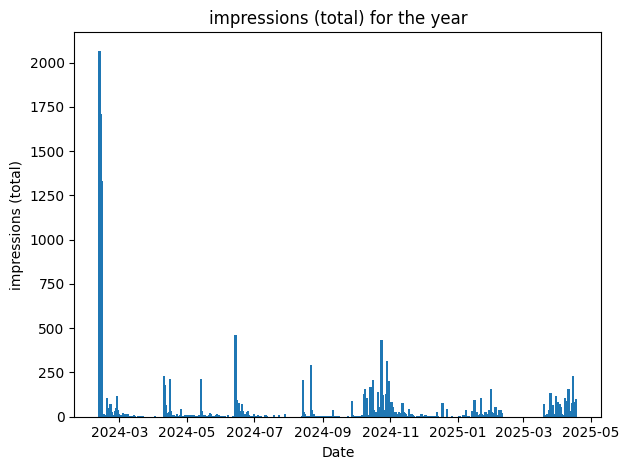

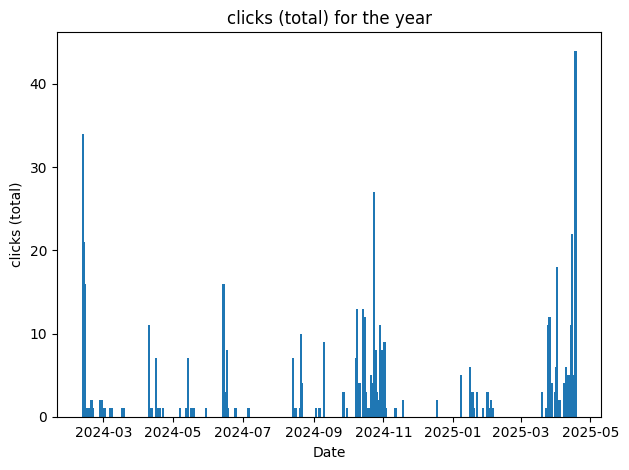

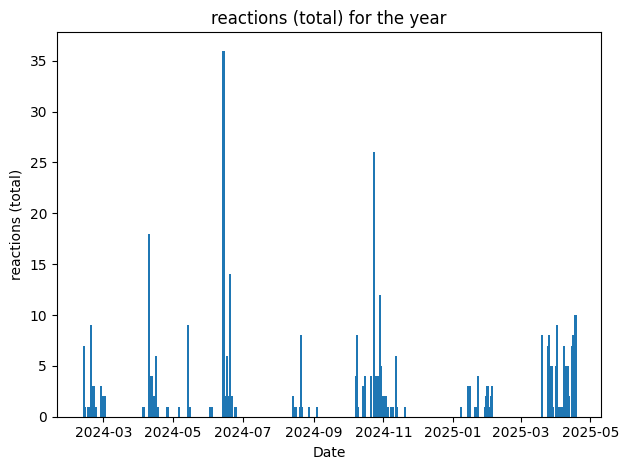

In [41]:
# Metrics to analyze
metrics = ['impressions (total)', 'clicks (total)', 'reactions (total)']

# Plot bar charts for each metric over the year
for metric in metrics:
    plt.figure()
    plt.bar(combined_metrics_df['date'], combined_metrics_df[metric], width=2)
    plt.title(f'{metric} for the year')
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

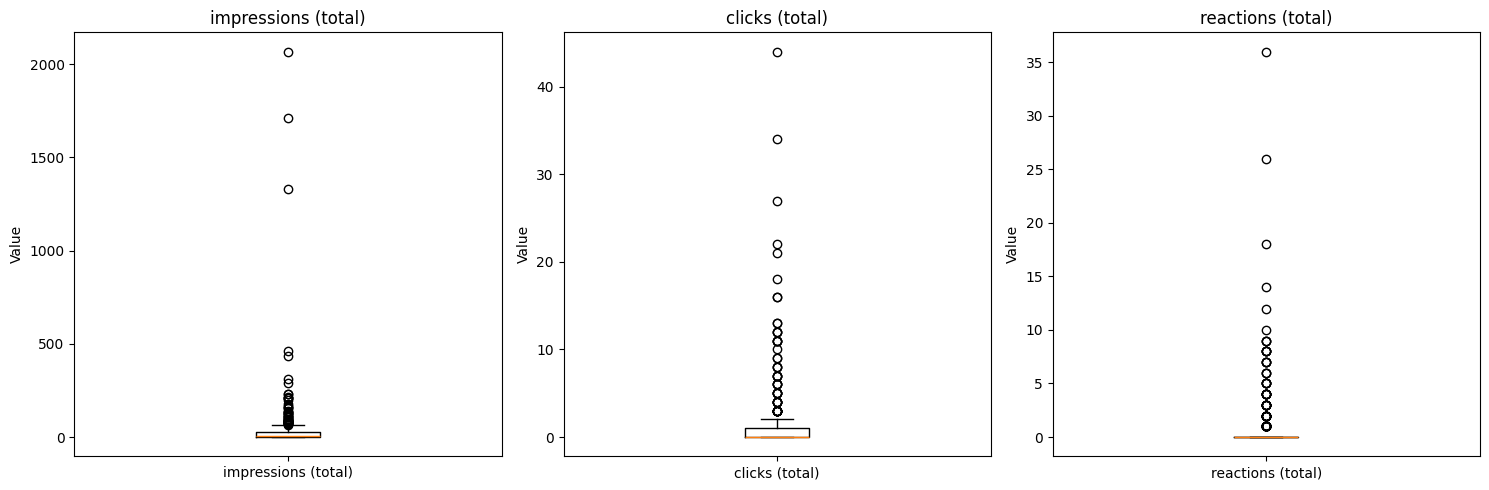

In [42]:
# Plot boxplot to highlight outliers
metrics = ['impressions (total)', 'clicks (total)', 'reactions (total)']

# we create one axis for each metric, sharey=False gives each its own scale
fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(15, 5), sharey=False)

for ax, metric in zip(axes, metrics):
    data = combined_metrics_df[metric].dropna()
    ax.boxplot(data, tick_labels=[metric])
    ax.set_title(metric)
    ax.set_ylabel('Value')

plt.tight_layout()
plt.savefig("Boxplot for impressions (total), clicks (total), reactions (total).png")

plt.show()


## detect outliers

In [43]:
# Detect outliers via IQR
outlier_frames = []
for metric in metrics:
    series = combined_metrics_df[metric]
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    threshold = Q3 + 1.5 * IQR
    out = combined_metrics_df[series > threshold][['date', metric]].copy()
    out['metric'] = metric
    out['value'] = out[metric]
    outlier_frames.append(out[['date', 'metric', 'value']])

outliers_df = pd.concat(outlier_frames)
display(outliers_df)

,date,metric,value
0,2024-02-12,impressions (total),2067
1,2024-02-13,impressions (total),1711
2,2024-02-14,impressions (total),1329
7,2024-02-19,impressions (total),105
10,2024-02-22,impressions (total),71
...,...,...,...
387,2025-04-11,reactions (total),5
388,2025-04-12,reactions (total),2
391,2025-04-15,reactions (total),7
392,2025-04-16,reactions (total),8


In [44]:
# Create a dictionary where the key is the name of the metric and the value is a DataFrame with its outliers
outlier_dfs = {}

for metric in metrics:
    series = combined_metrics_df[metric].dropna()
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    threshold = Q3 + 1.5 * IQR

    # select the outlier rows and rename the metric column to "value" for consistency
    df_out = (combined_metrics_df
              .loc[series > threshold, ['date', metric]]
              .copy()
             )
    df_out = df_out.rename(columns={metric: 'value'})
    outlier_dfs[metric] = df_out

# Example output:
# for metric, df in outlier_dfs.items():
#     print(f"\nEmissions for metrics «{metric}»:")
#     display(df)

In [45]:
display(outlier_dfs['impressions (total)'].sort_values(by='value', ascending=False).head(10))
display(outlier_dfs['impressions (total)'].shape)

,date,value
0,2024-02-12,2067
1,2024-02-13,1711
2,2024-02-14,1329
123,2024-06-14,459
255,2024-10-24,435
260,2024-10-29,313
191,2024-08-21,292
58,2024-04-10,229
391,2025-04-15,229
92,2024-05-14,213


(52, 2)

In [46]:
display(outlier_dfs['clicks (total)'].sort_values(by='value', ascending=False).head(10))
display(outlier_dfs['clicks (total)'].shape)

,date,value
394,2025-04-18,44
0,2024-02-12,34
255,2024-10-24,27
391,2025-04-15,22
1,2024-02-13,21
378,2025-04-02,18
2,2024-02-14,16
123,2024-06-14,16
240,2024-10-09,13
245,2024-10-14,13


(53, 2)

In [47]:
display(outlier_dfs['reactions (total)'].sort_values(by='value', ascending=False).head(10))
display(outlier_dfs['reactions (total)'].shape)

,date,value
123,2024-06-14,36
255,2024-10-24,26
58,2024-04-10,18
129,2024-06-20,14
260,2024-10-29,12
394,2025-04-18,10
378,2025-04-02,9
7,2024-02-19,9
92,2024-05-14,9
392,2025-04-16,8


(98, 2)

In [48]:
# Merge outliers with posts to identify the corresponding post content
df_outliers_posts = pd.merge(outliers_df, combined_posts_df, on='date', how='left')

# Display the table with dates, metric spikes, and post details
print('Outliers and related posts')
display(df_outliers_posts)

Outliers and related posts


,date,metric,value,post_id,employee_id,post type,created date,audience,impressions,clicks,click through rate (ctr),likes,comments,reposts,engagement rate,content type,cohort,weekday
0,2024-02-12,impressions (total),2067,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-13,impressions (total),1711,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-14,impressions (total),1329,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-19,impressions (total),105,30.0,2.0,Organic,2024-02-19,All followers,181.0,4.0,0.022099,11.0,0.0,2.0,0.093923,text,2024_baseline,NaN
4,2024-02-22,impressions (total),71,29.0,2.0,Organic,2024-02-22,All followers,139.0,1.0,0.007194,5.0,0.0,1.0,0.050360,text,2024_baseline,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2025-04-11,reactions (total),5,34.0,1.0,Organic,2025-04-10,All followers,139.0,10.0,0.071942,5.0,2.0,2.0,0.136691,text,2025_campaign,Friday
203,2025-04-12,reactions (total),2,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,2025-04-15,reactions (total),7,33.0,1.0,Organic,2025-04-15,All followers,160.0,8.0,0.050000,8.0,2.0,0.0,0.112500,text,2025_campaign,Tuesday
205,2025-04-16,reactions (total),8,32.0,1.0,Organic,2025-04-10,All followers,64.0,4.0,0.062500,6.0,0.0,0.0,0.156250,text,2025_campaign,Wednesday


**Outlier analysis showed us that our data lacked information, especially where there were the highest outliers in the impressions parameter. For example, on dates 2024-02-12, 2024-02-13, 2024-02-14, when outliers were abnormally high, respectively: 2067, 1711, 1329. We tried to find the nearest dates and posts that could cause anomalies, but we did not find any in the data or during a visual inspection of the LinkedIn post feed, because LinkedIn shows both limited analytics of posts up to a year and limitedly shows the posts themselves within a year, so in the future it is important to periodically download analytics from LinkedIn.**

In [49]:
df_outliers_posts_upd = df_outliers_posts
# List all columns except 'weekday'
cols = [c for c in df_outliers_posts_upd.columns if c != 'weekday']

# delete rows where there is NaN in any of these columns
df_outliers_posts_upd = df_outliers_posts_upd.dropna(subset=cols, how='any')
# output
display(df_outliers_posts_upd)

,date,metric,value,post_id,employee_id,post type,created date,audience,impressions,clicks,click through rate (ctr),likes,comments,reposts,engagement rate,content type,cohort,weekday
3,2024-02-19,impressions (total),105,30.0,2.0,Organic,2024-02-19,All followers,181.0,4.0,0.022099,11.0,0.0,2.0,0.093923,text,2024_baseline,NaN
4,2024-02-22,impressions (total),71,29.0,2.0,Organic,2024-02-22,All followers,139.0,1.0,0.007194,5.0,0.0,1.0,0.050360,text,2024_baseline,NaN
5,2024-02-28,impressions (total),119,28.0,1.0,Organic,2024-02-28,All followers,173.0,2.0,0.011561,6.0,0.0,0.0,0.046243,text,2024_baseline,NaN
6,2024-04-10,impressions (total),229,27.0,1.0,Organic,2024-04-10,All followers,596.0,13.0,0.021812,28.0,11.0,1.0,0.088926,text,2024_baseline,NaN
9,2024-04-16,impressions (total),211,26.0,1.0,Organic,2024-04-16,All followers,216.0,9.0,0.041667,6.0,0.0,2.0,0.078704,text,2024_baseline,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2025-04-09,reactions (total),5,35.0,1.0,Organic,2025-04-08,All followers,219.0,8.0,0.036530,10.0,0.0,0.0,0.082192,text,2025_campaign,Wednesday
202,2025-04-11,reactions (total),5,34.0,1.0,Organic,2025-04-10,All followers,139.0,10.0,0.071942,5.0,2.0,2.0,0.136691,text,2025_campaign,Friday
204,2025-04-15,reactions (total),7,33.0,1.0,Organic,2025-04-15,All followers,160.0,8.0,0.050000,8.0,2.0,0.0,0.112500,text,2025_campaign,Tuesday
205,2025-04-16,reactions (total),8,32.0,1.0,Organic,2025-04-10,All followers,64.0,4.0,0.062500,6.0,0.0,0.0,0.156250,text,2025_campaign,Wednesday


In [50]:
# get the list of post_id with outliers:
#post_id_list = df_outliers_posts_upd['post_id'].tolist()
#print(post_id_list)
# unique ID:
unique_post_ids = df_outliers_posts_upd['post_id'].unique().tolist()
unique_post_ids_sorted = sorted(unique_post_ids)
count_uni_id = df_outliers_posts_upd['post_id'].nunique()
print("Number of unique post_id with outliers:", count_uni_id)
print(unique_post_ids_sorted)

Number of unique post_id with outliers: 42
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0]


**We see that all posts contain outliers in metrics.**

## graphs of metric dynamics with a trend line in comparison between cohorts

**for metrics 'impressions (total)', 'clicks (total)', 'reactions (total)', 'comments (total)', 'reposts (total)', 'engagement rate (total)'**

### impressions

Сохранено: Impressions_total_2024_baseline.png


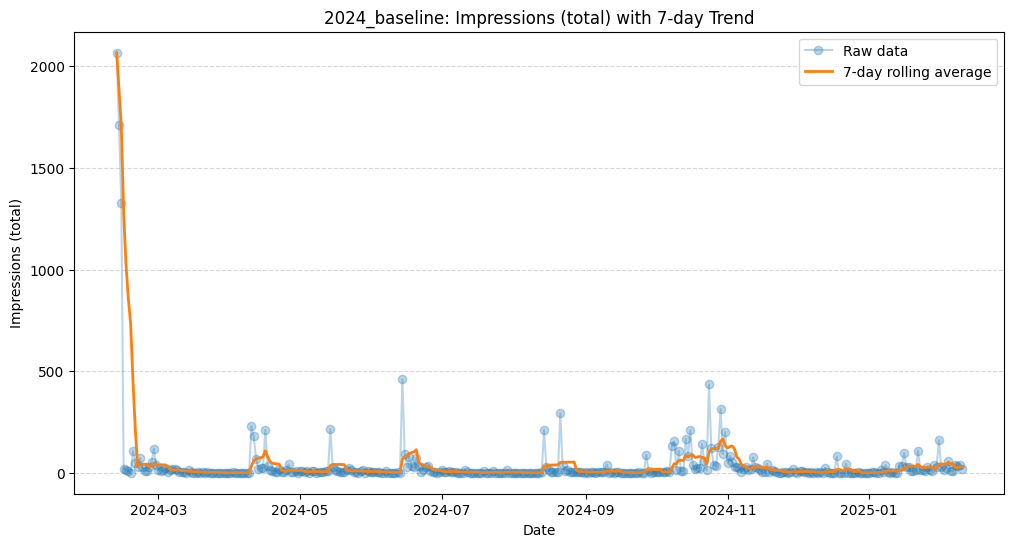

Сохранено: Impressions_total_2025_campaign.png


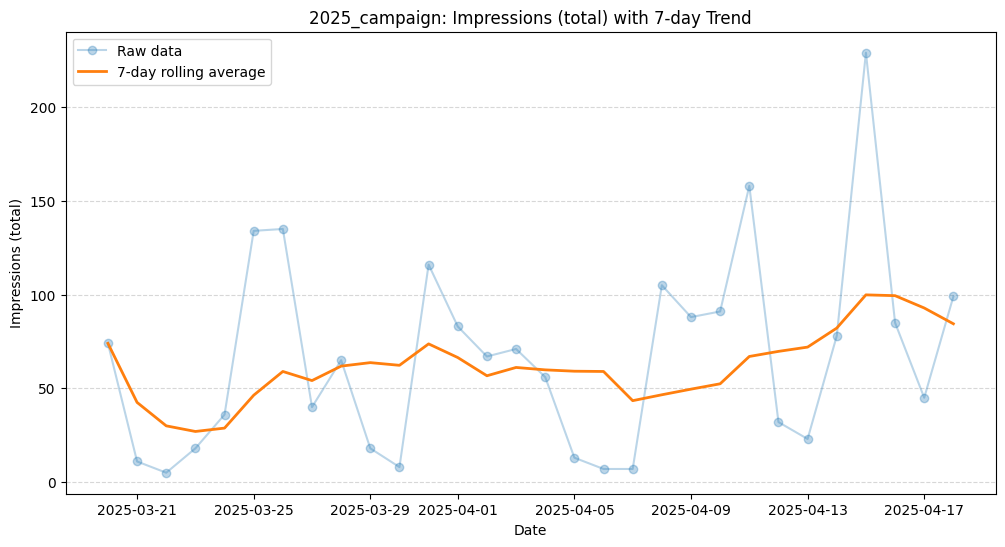

In [51]:
# List of cohorts for individual graphs
cohorts_to_plot = ['2024_baseline', '2025_campaign']

for cohort in cohorts_to_plot:
    df_im = combined_metrics_df[combined_metrics_df['cohort'] == cohort].sort_values('date')
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # raw data
    ax.plot(df_im['date'], df_im['impressions (total)'],
            marker='o', linestyle='-', alpha=0.3, label='Raw data')
    
    # 7-day moving average
    trend = df_im.set_index('date')['impressions (total)'].rolling(window=7, min_periods=1).mean()
    ax.plot(trend.index, trend.values,
            linewidth=2, label='7-day rolling average')
    
    ax.set_title(f"{cohort}: Impressions (total) with 7-day Trend")
    ax.set_xlabel('Date')
    ax.set_ylabel('Impressions (total)')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.legend()
    
    # form file name
    safe_cohort_impressions = cohort.replace(' ', '_').replace('/', '_')
    filename_impressions = f"Impressions_total_{safe_cohort_impressions}.png"
    
    # save figure 
    fig.savefig(filename_impressions)
    print(f"Сохранено: {filename_impressions}")
    
    plt.show()
    plt.close(fig)  # free memory

**let's plot a graph without outliers the nature of those we couldn't explain with anomaly values**

Сохранено: Impressions_total_outliers_dropped_2024_baseline.png


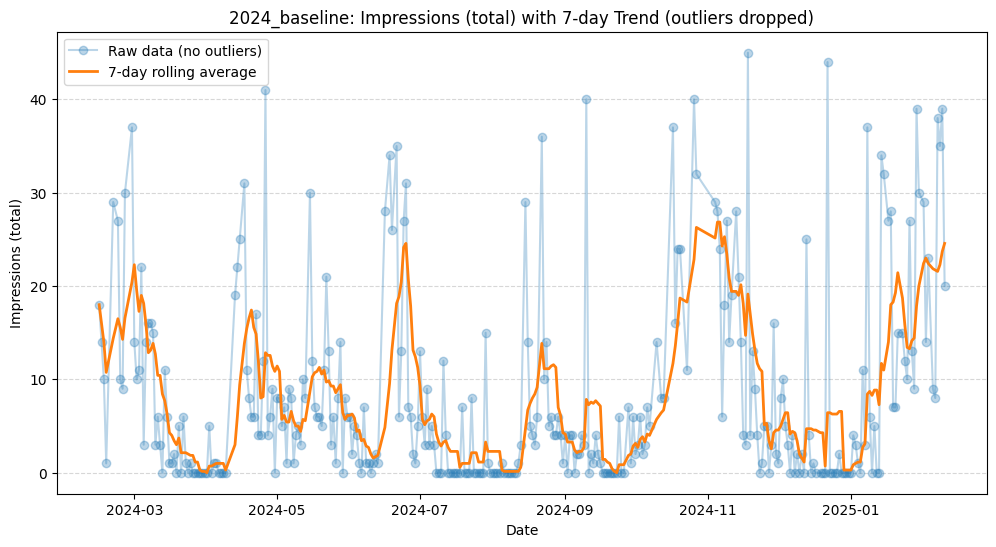

Сохранено: Impressions_total_outliers_dropped_2025_campaign.png


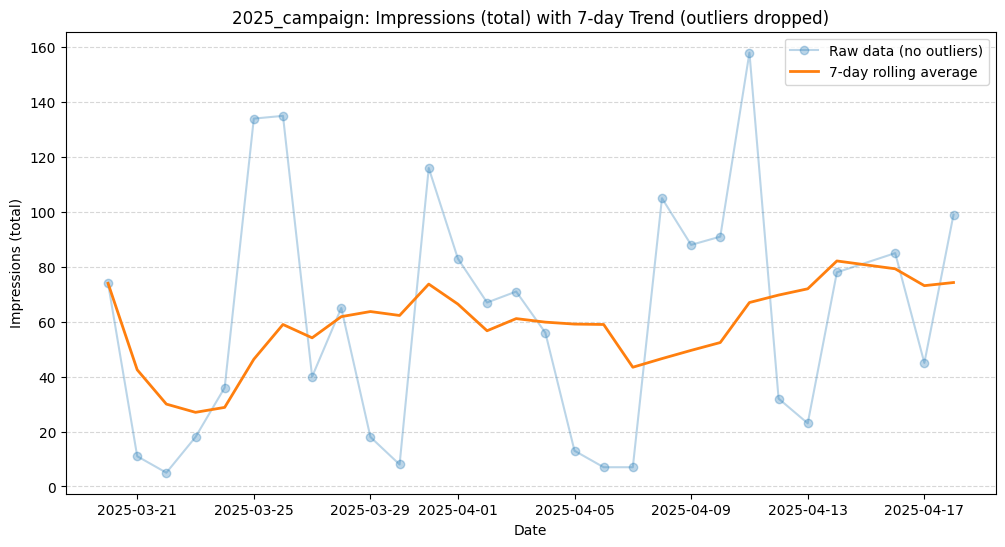

In [52]:
# plot a graph without outliers
for cohort in cohorts_to_plot:
    # we select data by cohort and sort
    df_im = combined_metrics_df[combined_metrics_df['cohort'] == cohort].sort_values('date')
    
    # calculate the outlier boundary for impressions by IQR
    series = df_im['impressions (total)'].dropna()
    Q1, Q3 = series.quantile(0.25), series.quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    
    # cut off outliers
    df_filtered = df_im[ df_im['impressions (total)'] <= upper ]
    
    # plot graph based on the filtered data
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # raw (but already without anomalies) points
    ax.plot(df_filtered['date'], df_filtered['impressions (total)'],
            marker='o', linestyle='-', alpha=0.3, label='Raw data (no outliers)')
    
    # 7-day moving average of the same points
    trend = (
        df_filtered
        .set_index('date')['impressions (total)']
        .rolling(window=7, min_periods=1)
        .mean()
    )
    ax.plot(trend.index, trend.values,
            linewidth=2, label='7-day rolling average')
    
    ax.set_title(f"{cohort}: Impressions (total) with 7-day Trend (outliers dropped)")
    ax.set_xlabel('Date')
    ax.set_ylabel('Impressions (total)')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.legend()
    
    # form file name
    safe_cohort_impressions_dropped = cohort.replace(' ', '_').replace('/', '_')
    filename_impressions_dropped = f"Impressions_total_outliers_dropped_{safe_cohort_impressions_dropped}.png"
    
    # save figure 
    fig.savefig(filename_impressions_dropped)
    print(f"Сохранено: {filename_impressions_dropped}")
    
    plt.show()
    plt.close(fig)  # free memory

- **2024_baseline: long-term low activity and rare peaks are visible, the 7-day moving average is around 20-50 impressions, only occasionally jumping higher.**
- **2025_campaign: after the launch, the campaign reached a level of ~30-100 impressions per day, with a trend towards gradual growth towards the end of the period.**

### clicks

Сохранено: Clicks_total_2024_baseline.png


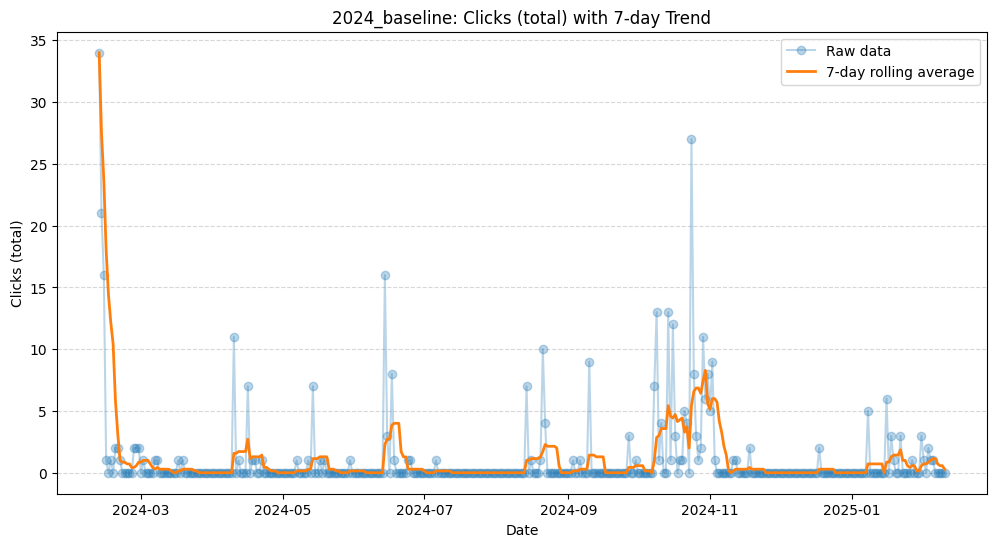

Сохранено: Clicks_total_2025_campaign.png


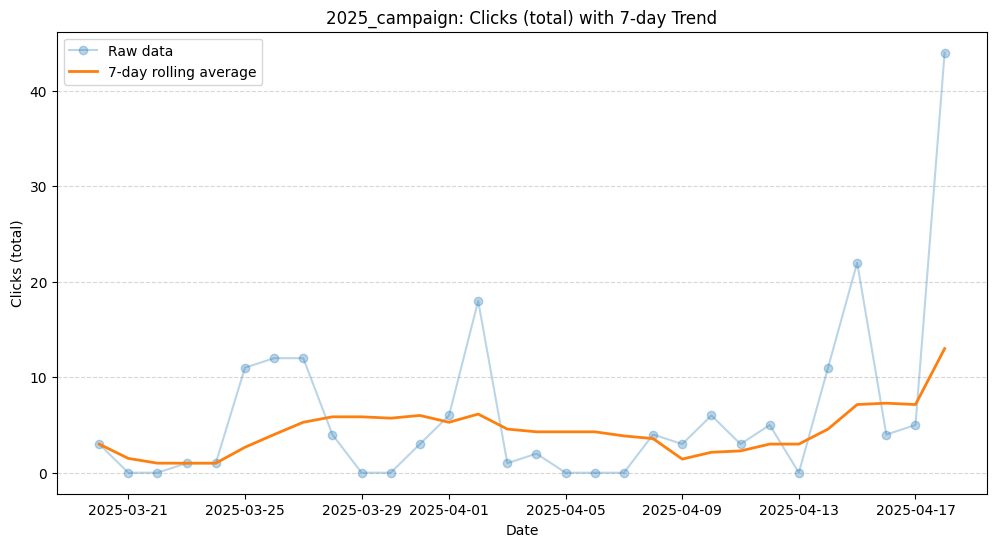

In [53]:
for cohort in cohorts_to_plot:
    df_cl = combined_metrics_df[combined_metrics_df['cohort'] == cohort].sort_values('date')
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # raw data
    ax.plot(df_cl['date'], df_cl['clicks (total)'],
            marker='o', linestyle='-', alpha=0.3, label='Raw data')
    
    # 7-day moving average
    trend = df_cl.set_index('date')['clicks (total)'].rolling(window=7, min_periods=1).mean()
    ax.plot(trend.index, trend.values,
            linewidth=2, label='7-day rolling average')
    
    ax.set_title(f"{cohort}: Clicks (total) with 7-day Trend")
    ax.set_xlabel('Date')
    ax.set_ylabel('Clicks (total)')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.legend()
    
    
    # form file name
    safe_cohort_clicks = cohort.replace(' ', '_').replace('/', '_')
    filename_clicks = f"Clicks_total_{safe_cohort_clicks}.png"
    
    # save figure 
    fig.savefig(filename_clicks)
    print(f"Сохранено: {filename_clicks}")
    
    plt.show()
    plt.close(fig)  # free memory

Сохранено: Clicks_total_outliers_dropped_2024_baseline.png


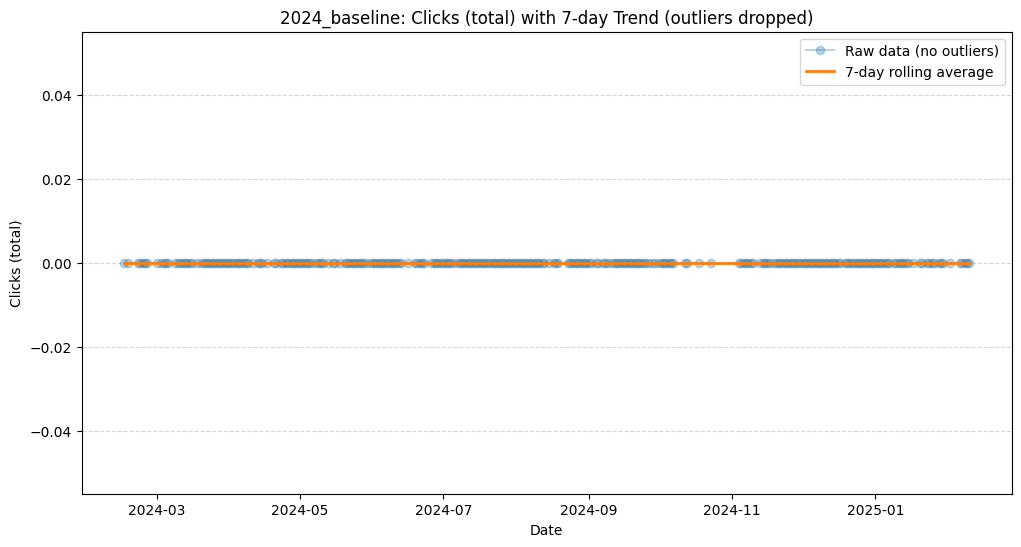

Сохранено: Clicks_total_outliers_dropped_2025_campaign.png


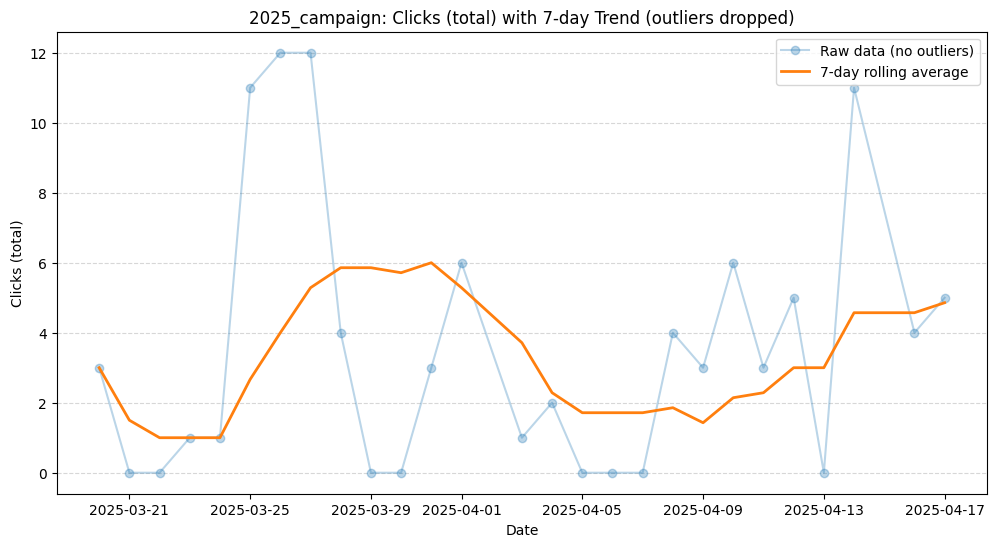

In [54]:
# plot a graph without outliers
for cohort in cohorts_to_plot:
    # we select data by cohort and sort
    df_cl = combined_metrics_df[combined_metrics_df['cohort'] == cohort].sort_values('date')
    
    # calculate the outlier boundary for impressions by IQR
    series = df_cl['clicks (total)'].dropna()
    Q1, Q3 = series.quantile(0.25), series.quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    
    # cut off outliers
    df_filtered = df_cl[ df_cl['clicks (total)'] <= upper ]
    
    # plot graph based on the filtered data
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # raw (but already without anomalies) points
    ax.plot(df_filtered['date'], df_filtered['clicks (total)'],
            marker='o', linestyle='-', alpha=0.3, label='Raw data (no outliers)')
    
    # 7-day moving average of the same points
    trend = (
        df_filtered
        .set_index('date')['clicks (total)']
        .rolling(window=7, min_periods=1)
        .mean()
    )
    ax.plot(trend.index, trend.values,
            linewidth=2, label='7-day rolling average')
    
    ax.set_title(f"{cohort}: Clicks (total) with 7-day Trend (outliers dropped)")
    ax.set_xlabel('Date')
    ax.set_ylabel('Clicks (total)')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.legend()
    
    # form file name
    safe_cohort_clicks_dropped = cohort.replace(' ', '_').replace('/', '_')
    filename_clicks_dropped = f"Clicks_total_outliers_dropped_{safe_cohort_clicks_dropped}.png"
    
    # save figure 
    fig.savefig(filename_clicks_dropped)
    print(f"Сохранено: {filename_clicks_dropped}")
    
    plt.show()
    plt.close(fig)  # free memory

- **2024_baseline: most days - zero or single clicks, rare spikes up to 5-10 and single peaks up to ~27 clicks, moving average is around 0-3 clicks/day.**
- **2025_campaign: trend line is consistently higher - on average 2-6 clicks per day, with a gradual increase towards the end (~7-13), and the spikes themselves reach 10-45 clicks on some days.**

**Thus, the 2025 campaign provided a steady increase in clicks compared to the scattered clicks for the whole of 2024.**

### reactions

Сохранено: reactions_total_2024_baseline.png


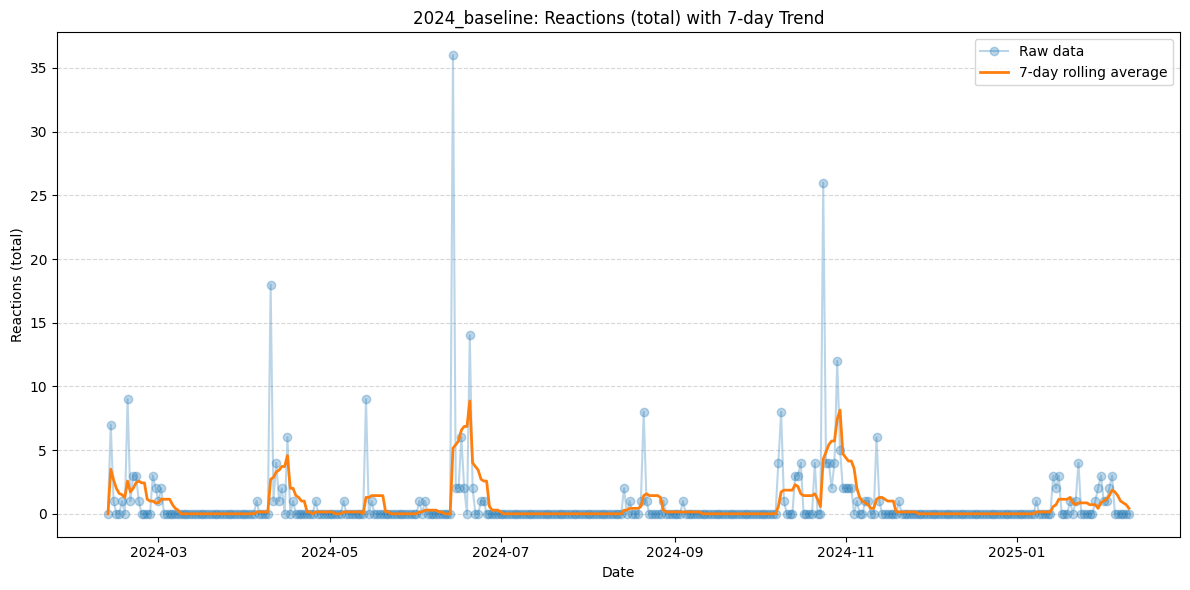

Сохранено: reactions_total_2025_campaign.png


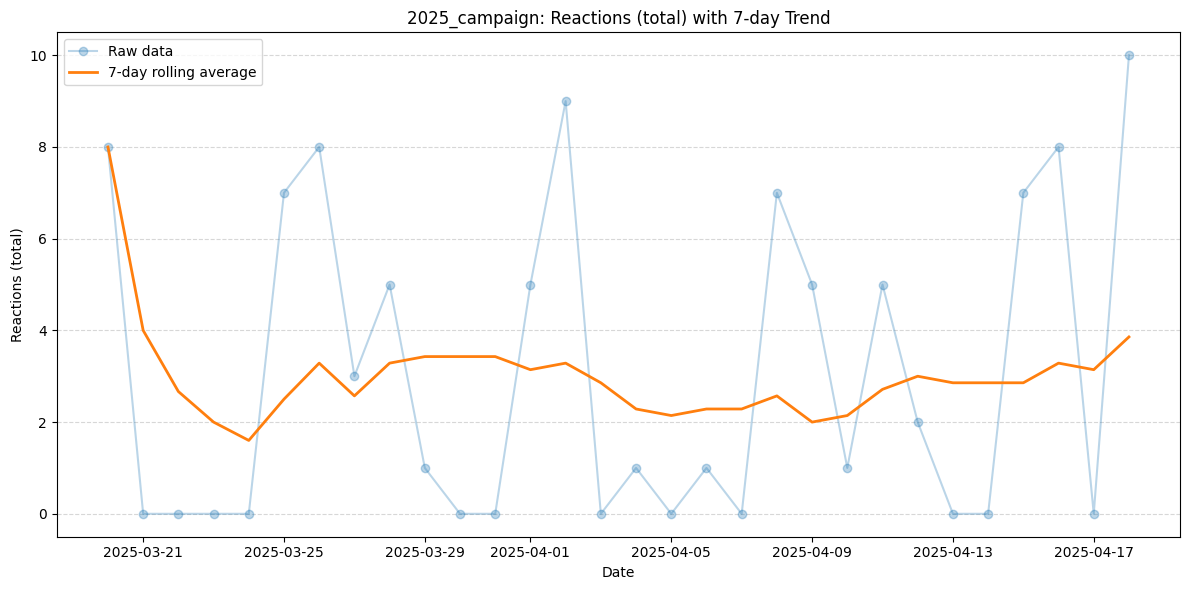

In [55]:
for cohort in cohorts_to_plot:
    df_reactions = combined_metrics_df[combined_metrics_df['cohort'] == cohort].sort_values('date')
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # raw data
    ax.plot(
        df_reactions['date'],
        df_reactions['reactions (total)'],
        marker='o', linestyle='-', alpha=0.3,
        label='Raw data'
    )
    
    # 7-day moving average
    trend = df_reactions.set_index('date')['reactions (total)'].rolling(window=7, min_periods=1).mean()
    ax.plot(
        trend.index, trend.values,
        linewidth=2,
        label='7-day rolling average'
    )
    
    ax.set_title(f"{cohort}: Reactions (total) with 7-day Trend")
    ax.set_xlabel('Date')
    ax.set_ylabel('Reactions (total)')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.legend()
    
    plt.tight_layout()
    
    # form file name
    safe_cohort = cohort.replace(' ', '_').replace('/', '_')
    filename = f"reactions_total_{safe_cohort}.png"
    
    # save figure 
    fig.savefig(filename)
    print(f"Сохранено: {filename}")
    
    plt.show()
    plt.close(fig)  # free memory

- **2024_baseline:** low activity for almost the entire year (most days = 0 reactions), with rare spikes up to ~18 and a trend of ~0–2 reactions on average per week.
- **2025_campaign:** a noticeable upward shift — an average of 2–3 reactions/day, with a periodic wave of up to 3–4 and isolated peaks of up to 9–10 reactions.

**The 2025 campaign gave a steady increase not only in impressions and clicks, but also in interactions in the form of reactions — a trend of an average of several reactions per day instead of almost zero in 2024.**

**So, the very fact of a post appearing in the feed provokes reactions from the public. Considering the behavior of the graphs, it is difficult to talk about any specific factor other than the fact of the post itself.**

**We can then look at which posts in particular cause the greatest number of reactions, without discarding outliers, but relying on them as indicators of the highest interest.**

## Grouping and calculating cohort averages

**For better understanding of the metric's behaviour let's see averages and medians**

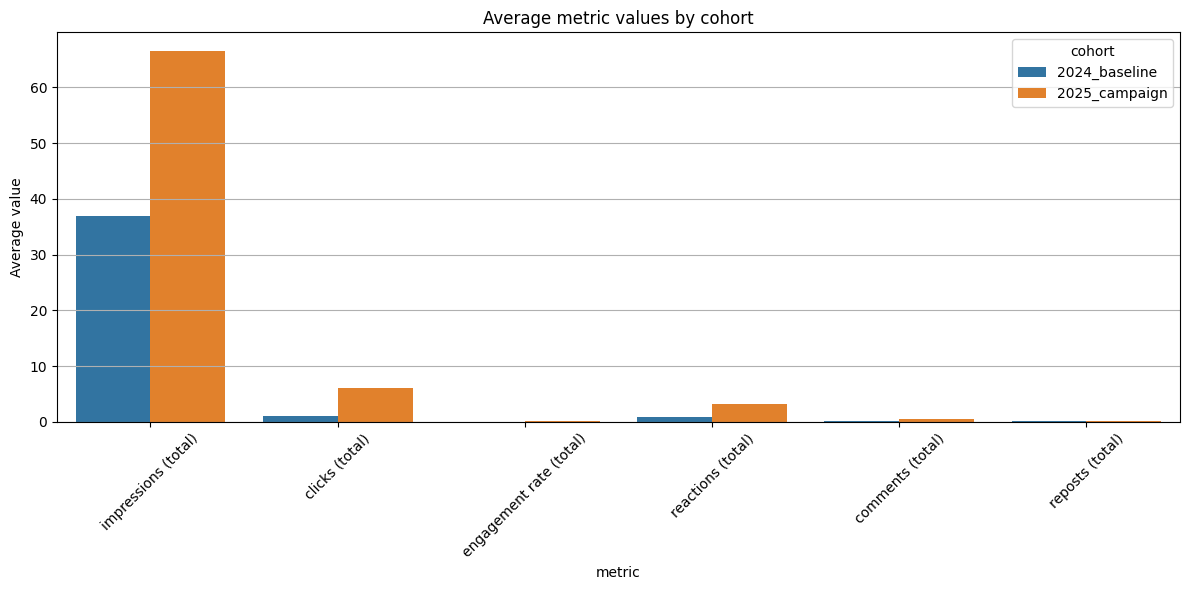

In [56]:
# Grouping and calculating cohort averages
metrics_to_compare = [
    'impressions (total)',
    'clicks (total)',
    'engagement rate (total)',
    'reactions (total)',
    'comments (total)',
    'reposts (total)'
]

cohort_summary = combined_metrics_df.groupby('cohort')[metrics_to_compare].mean().reset_index()

# Visualization - Comparison of average values
plt.figure(figsize=(12, 6))
cohort_summary_melted = cohort_summary.melt(id_vars='cohort', var_name='metric', value_name='average')

sns.barplot(data=cohort_summary_melted, x='metric', y='average', hue='cohort')
plt.title("Average metric values by cohort")
plt.xticks(rotation=45)
plt.ylabel("Average value")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<span style="color:dark">**Metrics seem better in 2025_campaign cohort**, but the amount of data for a year and the **amount of data** for several weeks are very **different**, so average values can be more attractive. let's select a **comparable period** of one month in 2024 and show the metrics. </span>

<span style="color:dark">It turns out that we **need to add another cohort**, for example **14 March 2024 - 14 April 2024** and compare it with our current campaign and name it **'2024_same_period'**:</span>

### new cohort '2024_same_period':

In [57]:
# Selection of the period 03/14/2024 - 04/14/2024 from the annual data frame
mask_same_period_2024 = (combined_metrics_df['date'] >= '2024-03-14') & (combined_metrics_df['date'] <= '2024-04-14')
metrics_df_same_period_2024 = combined_metrics_df[mask_same_period_2024].copy()
metrics_df_same_period_2024['cohort'] = '2024_same_period'

# Combining all three cohorts 
# Remove duplicate rows from original metrics_df_year
metrics_df_year_filtered = combined_metrics_df[~mask_same_period_2024]
metrics_df_year_filtered.loc[:, 'cohort'] = '2024_baseline'

# Combining all three cohorts
combined_all = pd.concat([
    metrics_df_year_filtered,
    metrics_df_same_period_2024,
    metrics_df_month  # already tagged '2025_campaign'
], ignore_index=True)


In [58]:
 # Save to Excel 
with pd.ExcelWriter("combined_all_cohorts.xlsx") as writer:
     combined_all.to_excel(writer, sheet_name='all_cohorts', index=False)

In [59]:
# Comparison of average metrics across cohort
metrics_to_compare = [
    'impressions (total)',
    'clicks (total)',
    'engagement rate (total)',
    'reactions (total)',
    'comments (total)',
    'reposts (total)'
]

cohort_summary_all = combined_all.groupby('cohort')[metrics_to_compare].mean().reset_index()
print('Comparison of average metrics across cohorts:')
cohort_summary_all

Comparison of average metrics across cohorts:


,cohort,impressions (total),clicks (total),engagement rate (total),reactions (total),comments (total),reposts (total)
0,2024_baseline,41.129477,1.482094,0.042447,0.991736,0.085399,0.063361
1,2024_same_period,17.468750,0.437500,0.075134,0.843750,0.343750,0.031250
2,2025_campaign,66.566667,6.033333,0.124029,3.100000,0.433333,0.100000


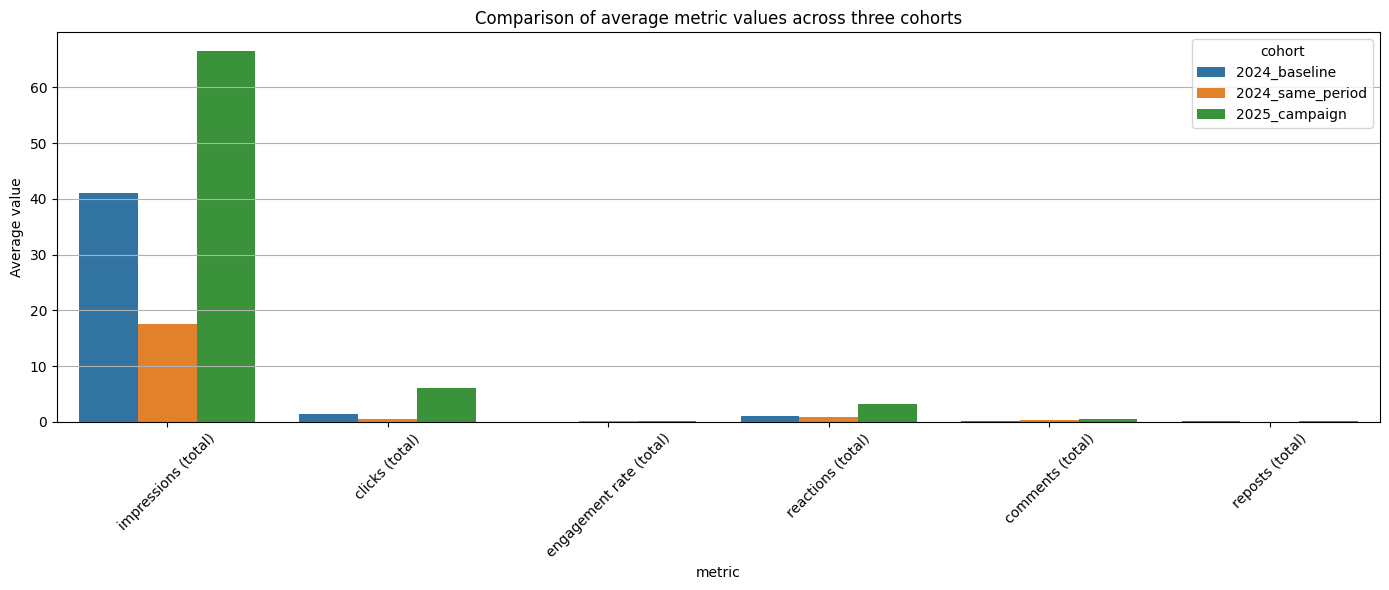

In [60]:
# Visualization of comparison of all cohorts
plt.figure(figsize=(14, 6))
summary_melted = cohort_summary_all.melt(id_vars='cohort', var_name='metric', value_name='average')

sns.barplot(data=summary_melted, x='metric', y='average', hue='cohort')
plt.title("Comparison of average metric values across three cohorts")
plt.xticks(rotation=45)
plt.ylabel("Average value")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("Comparison of average metric values across three cohorts.png")
plt.show()

**Let's also look at the median values, so that the median gets a more "honest" estimate of the data center, especially in non-standard sets of metrics like ours.**

In [61]:
# Comparison of median metrics across cohort
metrics_to_compare = [
    'impressions (total)',
    'clicks (total)',
    'engagement rate (total)',
    'reactions (total)',
    'comments (total)',
    'reposts (total)'
]

cohort_median_summary_all = combined_all.groupby('cohort')[metrics_to_compare].median().reset_index()
print('Comparison of Median metrics across cohorts:')
cohort_median_summary_all

Comparison of Median metrics across cohorts:


,cohort,impressions (total),clicks (total),engagement rate (total),reactions (total),comments (total),reposts (total)
0,2024_baseline,7.0,0.0,0.000000,0.0,0.0,0.0
1,2024_same_period,1.0,0.0,0.000000,0.0,0.0,0.0
2,2025_campaign,66.0,3.0,0.107326,1.0,0.0,0.0


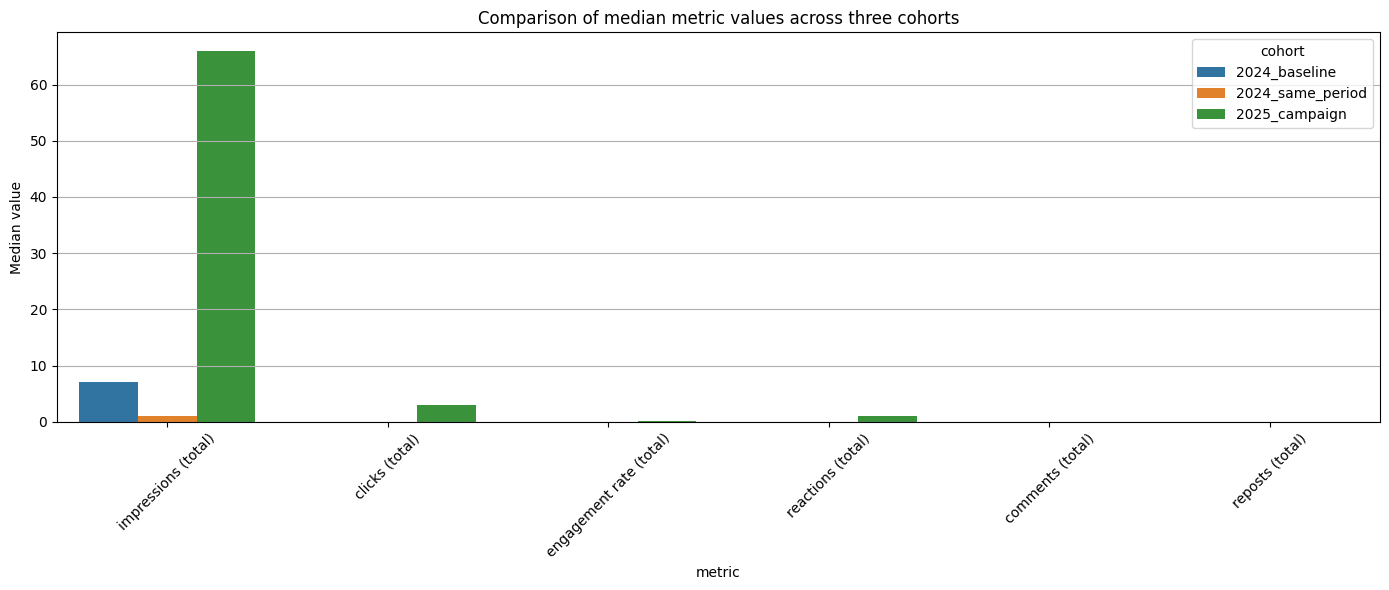

In [62]:
# Visualization of comparison of all cohorts for medians
plt.figure(figsize=(14, 6))
summary_median_melted = cohort_median_summary_all.melt(id_vars='cohort', var_name='metric', value_name='median')

sns.barplot(data=summary_median_melted, x='metric', y='median', hue='cohort')
plt.title("Comparison of median metric values across three cohorts")
plt.xticks(rotation=45)
plt.ylabel("Median value")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("Comparison of median metric values across three cohorts.png")
plt.show()

**We see that the averages and medians is higher in the 2025 campaign, so this may indicate that**
- The "typical" post works better. Since we published systematically (3 posts per week, fixed time/days), we "cut off" low-performing cases (no "idle" content) and create a habit in the audience.
- Less scatter, fewer "bad" posts. The structure of the campaign reduces the number of failed posts, so the "middle" (median) is higher.
- Outliers (very successful posts) also have less influence here than the average, but the overall level of successful publications is higher.

**So the median gives us a more honest picture of typical results and helps us ensure that a structured campaign is actually improving the bottom shelf of our posts, rather than just creating a few viral posts.**

## basic statistic distributions in engagement rate

### boxplot

- Additional visualizations to confirm the findings
- Boxplots for three cohorts - will show how the spread changes and where exactly 25-75% of cases are concentrated.

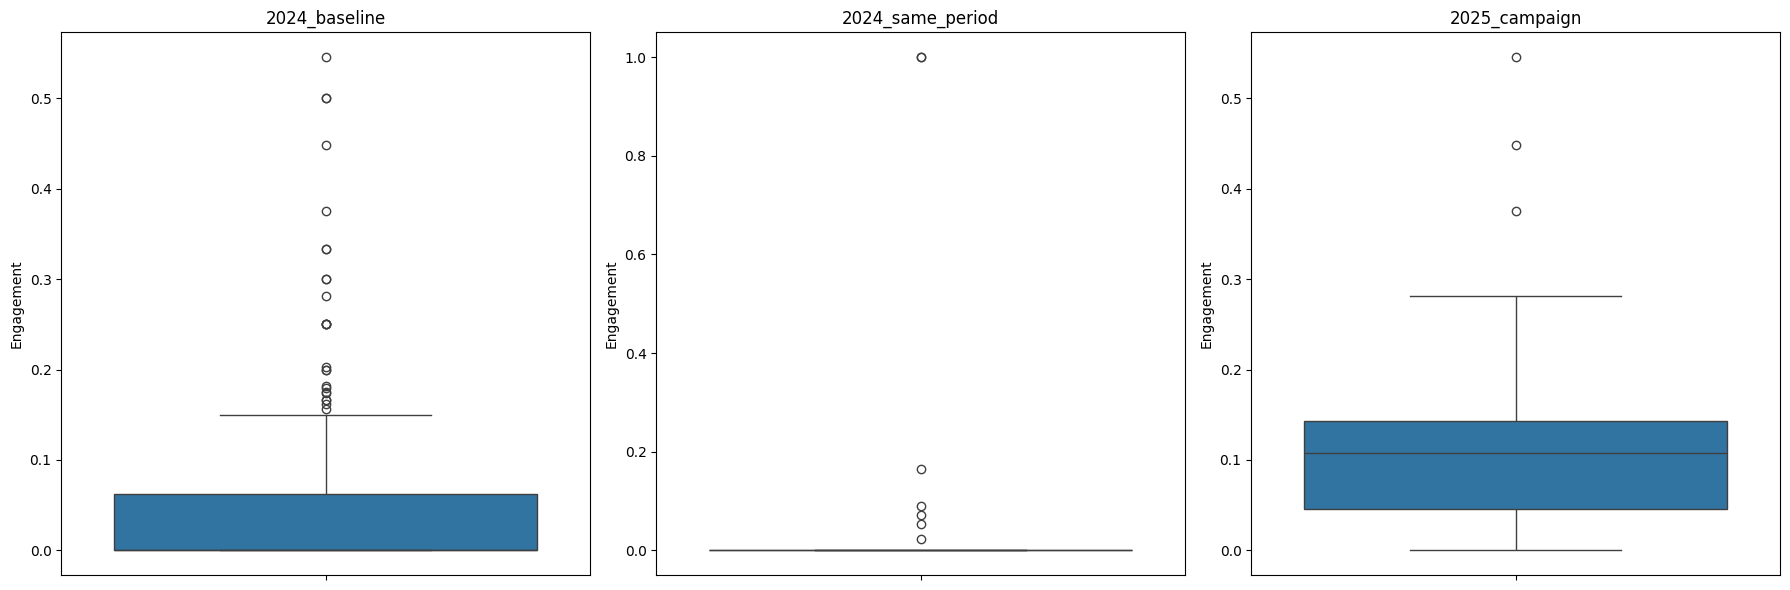

In [63]:
# cohorts list 
cohorts = combined_all['cohort'].unique()

# create one axis for each cohort, sharey=False gives different scale
fig, axes = plt.subplots(
    nrows=1,
    ncols=len(cohorts),
    figsize=(6 * len(cohorts), 6),
    sharey=False
)

for ax, cohort in zip(axes, cohorts):
    # filter data by cohort
    df_engagement = combined_all[combined_all['cohort'] == cohort]
    
    # draw a boxplot only for the Y variable
    sns.boxplot(
        data=df_engagement,
        y='engagement rate (total)',
        ax=ax
    )
    ax.set_title(cohort)
    ax.set_xlabel('')             
    ax.set_ylabel('Engagement')

plt.tight_layout()
plt.savefig("Comparison of engagement distributions across cohorts.png")
plt.show()

**Boxplot shows:**
- 2024_same_period is a virtually "flat" box at zero: the sample from March-April 2024 showed that 75% of posts received no engagement, and individual "outliers" (7 posts) are at a very low level (< 4.3%).
- 2024_baseline is better for the year, but still more than half of the posts are zero, and only the upper quartile approaches ~5%.
- 2025_campaign shows a steady shift: not just a couple of "hype" posts, but an elevated level of the "middle" and median, which is visible on the boxplot - the box and median are high.

**Thus, it was the structured campaign of 2025 that gave a steady rise in the "bottom shelf" and "middle" compared to the same period in 2024 and the year as a whole.**

### violin

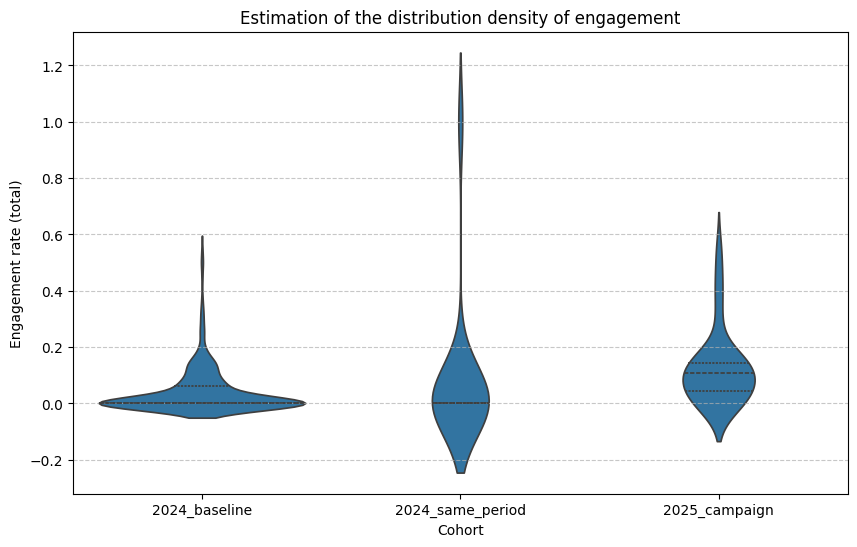

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(
    data=combined_all,
    x='cohort',
    y='engagement rate (total)',
    inner="quartile",
    ax=ax
)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)  # horizontal grid
ax.set_title("Estimation of the distribution density of engagement")
ax.set_ylabel("Engagement rate (total)")
ax.set_xlabel("Cohort")
plt.savefig("Estimation of the distribution density of engagement.png")
plt.show()

**Interpretation of the plot**
- Baseline 2024 has a nearly full "violin" at the bottom (around zero) and very narrow above 0.05 → most posts have either 0 or little engagement.
- Same_period 2024 has a "flat" "violin" with almost no width above 0 → almost no engagement.
- 2025_campaign has a "violin" that narrows toward the bottom but widens significantly in the 0.05–0.15 range and even has a small "hype hump" around 0.3 → showing that most posts have had a normal level of engagement (Q1–Q3 are shifted upwards), while some have very high engagement.

**Thus, the violin plot simultaneously provides an idea of the density, dispersion, and multimodality of the data, which helps to better understand how exactly engagement rates are distributed within each cohort.**

### hystograms

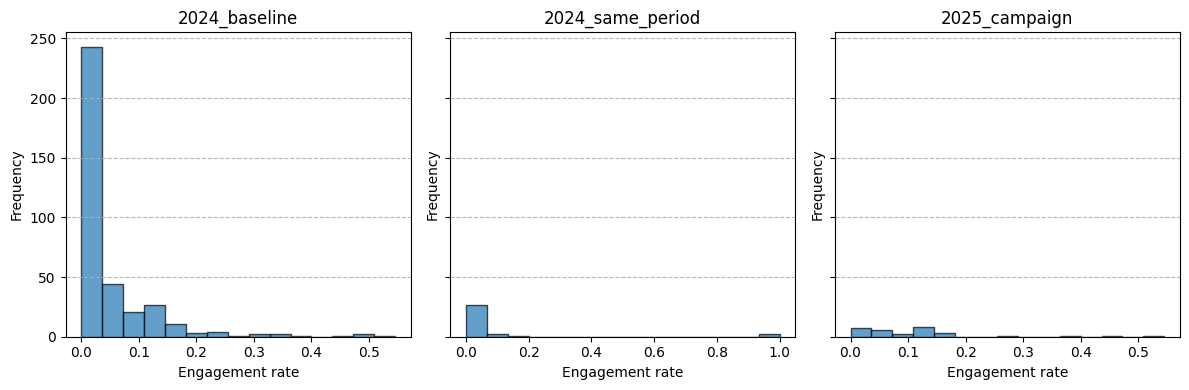

In [65]:
cohorts = combined_all['cohort'].unique()
n = len(cohorts)

fig, axes = plt.subplots(1, n, figsize=(4*n, 4), sharey=True)
for ax, cohort in zip(axes, cohorts):
    data = combined_all.loc[combined_all['cohort']==cohort, 'engagement rate (total)']
    ax.hist(data, bins=15, edgecolor='black', alpha=0.7)
    ax.set_title(cohort)
    ax.set_xlabel("Engagement rate")
    ax.set_ylabel("Frequency")
    ax.grid(axis='y', linestyle='--', alpha=0.9)

plt.tight_layout()
plt.savefig("Barplot Engagement rate through periods.png")
plt.show()

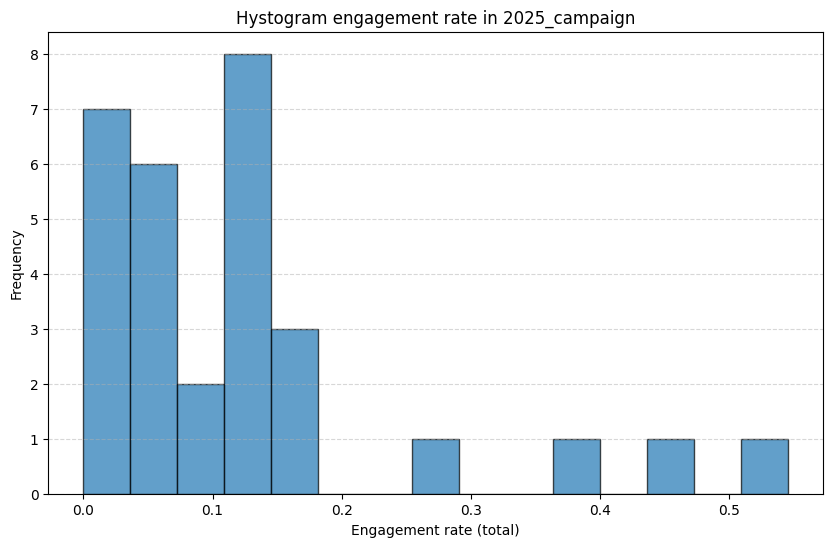

In [66]:

plt.figure(figsize=(10,6))
# cohort 2025_campaign
data = combined_all.query("cohort=='2025_campaign'")["engagement rate (total)"]

# build hystogram
plt.hist(data, bins=15, edgecolor='black', alpha=0.7)
plt.title("Hystogram engagement rate in 2025_campaign")
plt.xlabel("Engagement rate (total)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig("Hystogram engagement rate in 2025_campaign.png")
plt.show()

**Result:**
- Lots of "zero" posts in 2024
- In baseline, almost every second post does not receive any interactions (Q1=0 and median=0).
- In March–April 2024 ("same_period"), it is even worse: three quarters of posts are zero.
- Density normalization in the 2025 campaign. In the 2025 campaign, the histogram is "smeared" to the right: the peak bins are not at zero, but in the range of 5%–15% engagement. This reflects the structured approach: there are almost no "zero" posts, and most of them produce "typical" 5%–15%.

**Skewing and tails**
- All three distributions are right-sided (more dots at the bottom, a long sparse "tail" to the right).
- However, the baseline has a much longer tail and a "sharper" peak at zero, while the 2025 campaign has a shorter tail and a peak shifted to the right.

**Stability vs. dispersion**
- In 2024, the dispersion of the "middle" is small (IQR≈0.05) and almost everything at the bottom → the results are unpredictable: either zero or rare isolated bursts.
- In 2025, the dispersion of the "middle" increased (IQR≈0.097), but due to the entire range raising up: most publications consistently provide noticeable engagement.

**Conclusion:**
- the histograms even more clearly emphasize that the 2025 campaign did not just pull out the average indicators due to a couple of successes, but shifted the very "core" of the distribution to the right - a constant growth of the "bottom shelf" and the "middle" of the number of interactions.

## Statistical Test

**Visual plots (boxplot, violinplot, histograms) showed that the engagement distributions are not normal (many "zero" values and a long "right tail").**

After our initial exploratory analysis—using histograms, boxplots, and violin plots—we observed that the **engagement rate (total)** distribution:

- Has a large mass of zeros (many posts with no engagement),  
- Is heavily right-skewed (a long tail of high‐engagement outliers),  
- Displays clear asymmetry and non-uniform spread across value ranges.

While those visualizations make non-normality apparent, a **Q–Q plot** provides a formal, quantile-based check by comparing our sample quantiles against the expected quantiles of a normal distribution.  
Lets' finally check data for normality by Q-Q plot:

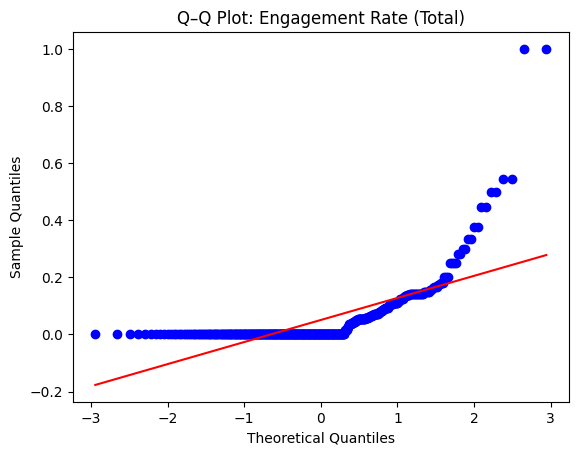

In [67]:
# create Q–Q plot with SciPy

metric = combined_all['engagement rate (total)'].dropna()


plt.figure()
stats.probplot(metric, dist="norm", plot=plt)
plt.title("Q–Q Plot: Engagement Rate (Total)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.savefig("Q–Q Plot: Engagement Rate (Total).png")
plt.show()

**In Q–Q plot we see:**
- A horizontal cluster at zero (flat portion near the left),
- Progressive upward divergence in the right tail,which confirms significant deviations from normality.
  
**Since the distributions are most likely not normal, we use nonparametric tests instead of ANOVA:**
- ANOVA requires that the distributions in the groups are approximately normal and that the variances are equal.
- In our data we see a strong skew and many "zero" values: these conditions are violated.
- The Kruskal–Wallis H-test compares not the values themselves, but their ranks, and tests the **null hypothesis** that all groups are drawn from the same distribution (the medians are the same).

- If p < α (usually 0.05) - reject the null hypothesis: at least two groups differ.
- If p ≥ α - there is no reason to believe that the medians (distributions) in the groups differ.

In [68]:
metric = 'engagement rate (total)'
groups = {
    name: grp[metric].dropna().values
    for name, grp in combined_all.groupby('cohort')
}

# Kruskal–Wallis H-test
h_stat, h_p = kruskal(
    groups['2024_baseline'],
    groups['2024_same_period'],
    groups['2025_campaign']
)
print(f"Kruskal–Wallis H = {h_stat:.3f}, p = {h_p:.4f}")


Kruskal–Wallis H = 31.826, p = 0.0000


**In our case, H≈37.8 and p<0.001, that is, the distributions of the three cohorts are not the same. We reject the null hypothesis of equality of distributions in all three groups (at the level of α=0.05), which means there are statistically significant differences in engagement rate between the cohorts.**

**Let's check which pairs are different.**
- The U statistic is calculated as the number of "permutations" of ranks between two groups. The smaller U, the more one group tends to give higher values ​​than the other.
- p-raw - The usual p-value of this U test, without taking into account that we are making several comparisons at once. Shows how likely the results would have occurred by chance if the groups were actually the same.

In [69]:
# Paired Mann–Whitney U and collecting p‑values
pairs = [
    ('2025_campaign','2024_baseline'),
    ('2025_campaign','2024_same_period'),
    ('2024_same_period','2024_baseline')
]
results = []
p_vals = []

for g1, g2 in pairs:
    u_stat, p_val = mannwhitneyu(groups[g1], groups[g2], alternative='two-sided')
    n1, n2 = len(groups[g1]), len(groups[g2])
    r = 1 - (2 * u_stat) / (n1 * n2)  # rank-biserial effect size
    results.append({
        'comparison': f"{g1} vs {g2}",
        'U_stat': int(u_stat),
        'p_raw': p_val,
        'r_rank_biserial': round(r, 3)
    })
    p_vals.append(p_val)

print(results)

[{'comparison': '2025_campaign vs 2024_baseline', 'U_stat': 8254, 'p_raw': np.float64(9.555250996113242e-08), 'r_rank_biserial': np.float64(-0.516)}, {'comparison': '2025_campaign vs 2024_same_period', 'U_stat': 771, 'p_raw': np.float64(1.38873192253783e-05), 'r_rank_biserial': np.float64(-0.606)}, {'comparison': '2024_same_period vs 2024_baseline', 'U_stat': 5073, 'p_raw': np.float64(0.16152207012435382), 'r_rank_biserial': np.float64(0.127)}]


In [70]:
# Convert dict to DataFrame
df_results = pd.DataFrame(results)

# split the line “comparison” (“2025_campaign vs 2024_baseline”) into two columns
df_results[['Cohort1', 'Cohort2']] = df_results['comparison'] \
    .str.split(' vs ', expand=True)

# rename and select the required columns
df_results = df_results[[
    'Cohort1',
    'Cohort2',
    'U_stat',
    'p_raw',           # raw p
    'r_rank_biserial'  # effect-size
]]
df_results = df_results.rename(columns={'p_raw': 'p_value'})

print(df_results)

            Cohort1           Cohort2  U_stat       p_value  r_rank_biserial
0     2025_campaign     2024_baseline    8254  9.555251e-08           -0.516
1     2025_campaign  2024_same_period     771  1.388732e-05           -0.606
2  2024_same_period     2024_baseline    5073  1.615221e-01            0.127


**let's apply the Bonferroni correction:**

- In post-hoc comparison of three groups, we have 3 pairs - we perform 3 separate tests.
- Each test gives a chance of type I (false positive) error at the level of α=0.05.
- Three tests → the probability of at least one false positive is higher than 5%.

Bonferroni correction:
- p_corr = min ( 𝑝_raw × number of tests, 1.0).
- Now the significance threshold really remains 0.05 for the entire series of tests.

Significant?
- True, if p_corr < 0.05 → the pair is statistically different.
- False, if p_corr ≥ 0.05 → there is no reason to talk about a difference.

Effect-size: rank biserial coefficient r
- p-value tells whether there is a difference, but not how big it is. This is where r_rank_biserial comes in:
- formula: r=1−(2U/n1*n2) – where n1 and n2 are sizes of the groups being compared.

- |r| ≈ 0.1 – very small effect
- |r| ≈ 0.3 – medium
- |r| ≈ 0.5 – large
- |r| > 0.8 – very large

In [71]:
# Bonferroni correction

# Get a list of raw p-values from results
p_vals = [res['p_raw'] for res in results]

# Number of tests
m = len(p_vals)

# Bonferroni correction
for i, res in enumerate(results):
    p_corr = min(res['p_raw'] * m, 1.0)
    res['p_corrected'] = round(p_corr, 4)
    res['significant'] = res['p_corrected'] < 0.05

# results
df_res = pd.DataFrame(results)[[
    'comparison', 'U_stat', 'p_raw', 'p_corrected', 'significant', 'r_rank_biserial'
]]
print("\nPairwise Mann–Whitney U results (Bonferroni correction):")
print(df_res.to_string(index=False))


Pairwise Mann–Whitney U results (Bonferroni correction):
                       comparison  U_stat        p_raw  p_corrected  significant  r_rank_biserial
   2025_campaign vs 2024_baseline    8254 9.555251e-08       0.0000         True           -0.516
2025_campaign vs 2024_same_period     771 1.388732e-05       0.0000         True           -0.606
2024_same_period vs 2024_baseline    5073 1.615221e-01       0.4846        False            0.127


## results

**Results:**

**2025_campaign vs 2024_baseline**
- p_corr = 0.0000 (< 0.05) - statistically significant difference.
- r ≈ –0.52 - medium-large effect: engagement in the 2025 campaign is significantly higher than in 2024 overall.

**2025_campaign vs 2024_same_period**
- p_corr = 0.0000 - also significant.
- r ≈ -0.61 - the effect is even larger: comparing a specific month of 2024 against a structured campaign also strongly favors 2025.

**2024_same_period vs 2024_baseline**
- p_corr = 0.4846 - no difference between March–April 2024 and the rest of the months of 2024.
- r ≈ 0.08 - a small effect, essentially no meaningful difference.

**Conclusions:**
- The overall Kruskal–Wallis test (H ≈ 37.8, p < 0.001) showed that at least two cohorts differ.
- Paired tests clarified: it is the 2025 campaign that stands out statistically and practically — its “typical” and “lower” engagement levels are significantly higher than any 2024 data.
- March-April 2024 is no different from the 2024 annual background, meaning the seasonal effect is insignificant this month without a systematic strategy.

**Thus, the statistics confirm that the structured approach (3 posts per week on schedule) gave a significant and sustainable increase in engagement compared to the usual practice in 2024.**

## The percentage growth for each metric between 2024 Same Period and 2025 Campaign, and between 2024 Baseline and 2025 Campaign

In [72]:
# Set index by 'Cohort' for easy comparison
summary = cohort_summary_all.set_index('cohort')

# Metrics to compare
metrics = metrics_to_compare

# Calculating growth between 2024 Same Period and 2025 Campaign
growth_same_period = ((summary.loc['2025_campaign', metrics] - summary.loc['2024_same_period', metrics]) 
                      / summary.loc['2024_same_period', metrics]) * 100

# Calculating growth between 2024 Baseline and 2025 Campaign
growth_baseline = ((summary.loc['2025_campaign', metrics] - summary.loc['2024_baseline', metrics]) 
                   / summary.loc['2024_baseline', metrics]) * 100


In [73]:
# Create a results table
growth_df_cohorts = pd.DataFrame({
    'Growth vs 2024 Same Period (%)': growth_same_period.round(2),
    'Growth vs 2024 Baseline (%)': growth_baseline.round(2)
})

# Displaying the result
print("Percentage growth of indicators:")
display(growth_df_cohorts)

Percentage growth of indicators:


,Growth vs 2024 Same Period (%),Growth vs 2024 Baseline (%)
impressions (total),281.06,61.85
clicks (total),1279.05,307.08
engagement rate (total),65.08,192.19
reactions (total),267.41,212.58
comments (total),26.06,407.42
reposts (total),220.00,57.83


<span style="color:dark">**Reach and clicks** increased by 2-6 times</span>

It means that the structured camopaign brings more engagement that not structered posting especially when at the same time span at last it was only 1 post and in 2025 there are 12 posts.

## On what days was there a peak of interest?

Let's reveil 5 top days by engagement rate in two cohorts: '2024_baseline' and '2025_campaign'

#### in cohort '2025_campaign'

In [74]:
combined_all.head(2)

,date,impressions (organic),impressions (sponsored),impressions (total),unique impressions (organic),clicks (organic),clicks (sponsored),clicks (total),reactions (organic),reactions (sponsored),...,comments (organic),comments (sponsored),comments (total),reposts (organic),reposts (sponsored),reposts (total),engagement rate (organic),engagement rate (sponsored),engagement rate (total),cohort
0,2024-02-12,50,2017,2067,7,0,34,34,0,0,...,0,0,0,0,0,0,0.000000,0.016857,0.016449,2024_baseline
1,2024-02-13,105,1606,1711,73,0,21,21,6,1,...,1,0,1,0,0,0,0.066667,0.013076,0.016365,2024_baseline


In [75]:
top_days_campaign = combined_all[combined_all['cohort'] == '2025_campaign'].nlargest(5, 'engagement rate (total)')
top_days_campaign

,date,impressions (organic),impressions (sponsored),impressions (total),unique impressions (organic),clicks (organic),clicks (sponsored),clicks (total),reactions (organic),reactions (sponsored),...,comments (organic),comments (sponsored),comments (total),reposts (organic),reposts (sponsored),reposts (total),engagement rate (organic),engagement rate (sponsored),engagement rate (total),cohort
424,2025-04-18,99,0,99,55,44,0,44,10,0,...,0,0,0,0,0,0,0.545455,0.0,0.545455,2025_campaign
408,2025-04-02,67,0,67,36,18,0,18,9,0,...,3,0,3,0,0,0,0.447761,0.0,0.447761,2025_campaign
402,2025-03-27,40,0,40,19,12,0,12,3,0,...,0,0,0,0,0,0,0.375000,0.0,0.375000,2025_campaign
418,2025-04-12,32,0,32,19,5,0,5,2,0,...,1,0,1,1,0,1,0.281250,0.0,0.281250,2025_campaign
407,2025-04-01,83,0,83,39,6,0,6,5,0,...,2,0,2,0,0,0,0.156627,0.0,0.156627,2025_campaign


#### in cohort '2024_baseline'

In [76]:
top_days_baseline = combined_all[combined_all['cohort'] == '2024_baseline'].nlargest(5, 'engagement rate (total)')
top_days_baseline

,date,impressions (organic),impressions (sponsored),impressions (total),unique impressions (organic),clicks (organic),clicks (sponsored),clicks (total),reactions (organic),reactions (sponsored),...,comments (organic),comments (sponsored),comments (total),reposts (organic),reposts (sponsored),reposts (total),engagement rate (organic),engagement rate (sponsored),engagement rate (total),cohort
362,2025-04-18,99,0,99,55,44,0,44,10,0,...,0,0,0,0,0,0,0.545455,0.0,0.545455,2024_baseline
79,2024-06-02,2,0,2,2,0,0,0,1,0,...,0,0,0,0,0,0,0.500000,0.0,0.500000,2024_baseline
175,2024-09-06,2,0,2,2,1,0,1,0,0,...,0,0,0,0,0,0,0.500000,0.0,0.500000,2024_baseline
346,2025-04-02,67,0,67,36,18,0,18,9,0,...,3,0,3,0,0,0,0.447761,0.0,0.447761,2024_baseline
340,2025-03-27,40,0,40,19,12,0,12,3,0,...,0,0,0,0,0,0,0.375000,0.0,0.375000,2024_baseline


**The revealed dates** could help in identification the posts that were successfull. As we have in combined dataset metrics gathered day by day and not sticked to the certain posts, we need to find the nearest dates of published posts, that lead us to success.

## CTR by cohort

In [77]:
combined_all['CTR'] = (combined_all['clicks (total)'] / combined_all['impressions (total)']) * 100
combined_all.head(2)

,date,impressions (organic),impressions (sponsored),impressions (total),unique impressions (organic),clicks (organic),clicks (sponsored),clicks (total),reactions (organic),reactions (sponsored),...,comments (sponsored),comments (total),reposts (organic),reposts (sponsored),reposts (total),engagement rate (organic),engagement rate (sponsored),engagement rate (total),cohort,CTR
0,2024-02-12,50,2017,2067,7,0,34,34,0,0,...,0,0,0,0,0,0.000000,0.016857,0.016449,2024_baseline,1.644896
1,2024-02-13,105,1606,1711,73,0,21,21,6,1,...,0,1,0,0,0,0.066667,0.013076,0.016365,2024_baseline,1.227352


In [78]:
# group by cohort and calculate the average CTR
ctr_by_cohort = combined_all.groupby('cohort')['CTR'].mean().reset_index()
#
ctr_by_cohort


,cohort,CTR
0,2024_baseline,2.771872
1,2024_same_period,inf
2,2025_campaign,7.420217


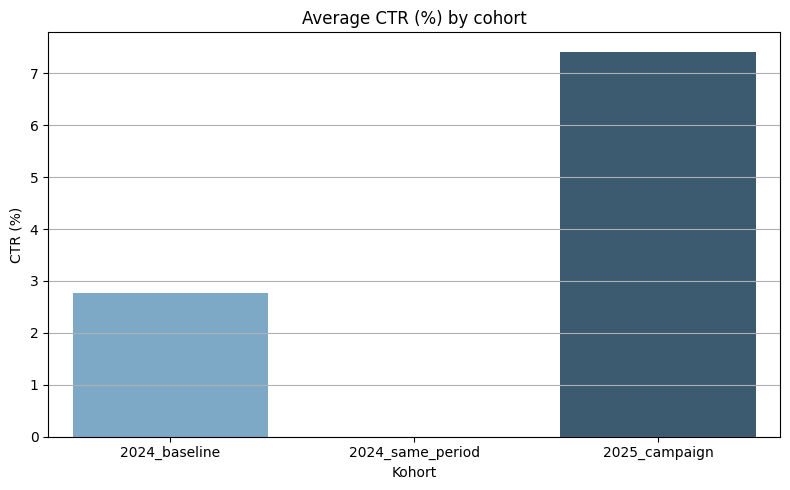

In [79]:
# Visualisation
plt.figure(figsize=(8, 5))
sns.barplot(data=ctr_by_cohort, x='cohort', y='CTR', hue='cohort', palette='Blues_d', legend=False)
plt.title('Average CTR (%) by cohort')
plt.ylabel('CTR (%)')
plt.xlabel('Kohort')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("Average CTR (%) by cohort.png")
plt.show()

**CTR (%) = inf (infinity)** for cohort 2024_same_period, this means impressions were 0 but clicks were > 0, for instance CTR = (3 / 0) * 100 → ∞ (mathematically infinity)

This could be a data collection error (for example, impressions were not recorded, but clicks were). Or a post received clicks from an external source (for example, through a repost), and LinkedIn did not count impressions.

**To avoid distortion of statistics**, we will replace inf with 0, then remove such lines from the CTR analysis:

In [80]:
combined_all['CTR'] = combined_all['CTR'].replace([np.inf, -np.inf], 0)
combined_all_cleaned = combined_all[combined_all['impressions (total)'] > 0].copy()

In [81]:
combined_all_cleaned['CTR'] = (combined_all_cleaned['clicks (total)'] / combined_all_cleaned['impressions (total)']) * 100

# group by cohort
ctr_by_cohort_cleaned = combined_all_cleaned.groupby('cohort')['CTR'].mean().reset_index()
ctr_by_cohort_cleaned

,cohort,CTR
0,2024_baseline,2.771872
1,2024_same_period,6.250163
2,2025_campaign,7.420217


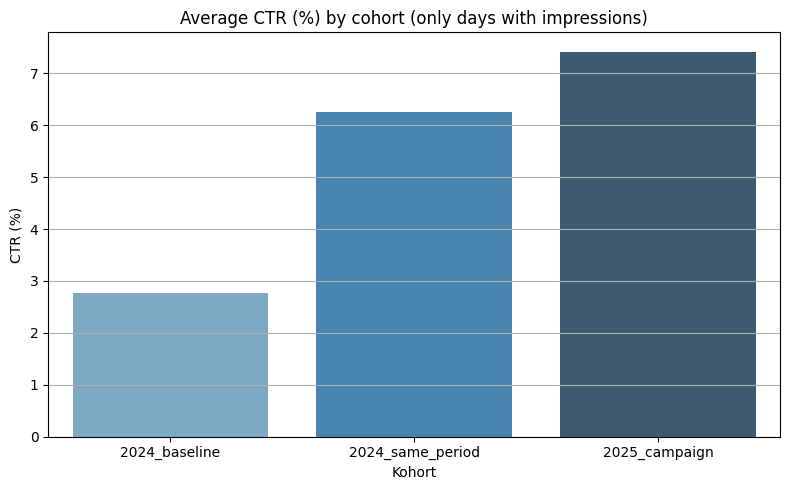

In [82]:
# Visualisation

plt.figure(figsize=(8, 5))
sns.barplot(data=ctr_by_cohort_cleaned, x='cohort', y='CTR', hue='cohort', palette='Blues_d', legend=False)
plt.title('Average CTR (%) by cohort (only days with impressions)')
plt.ylabel('CTR (%)')
plt.xlabel('Kohort')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("Average CTR (%) by cohort (only days with impressions).png")
plt.show()

## intermediate result

**Result:** In the same period in 2024, CTR = 6.25% higher than in our 2025 campaign, CTR = 5.09%

**What could this mean?** 
if higher CTR last year then the content in 2024 (same month) could be:
- More “native” (natural for the audience)
- Better targeted
- more concise, with clear call-to-action
- **in fact, last year in the same period there was only one post, which may distort the statistics**

**But in 2025:**
We have more engagement and more activity overall. 
- There were more posts and more frequent ones, and they are not necessarily all equal in effectiveness.
- The audience size increased, and this could reduce CTR due to “blurring” of attention

### Was the CTR higher at the beginning of the campaign than at the end?

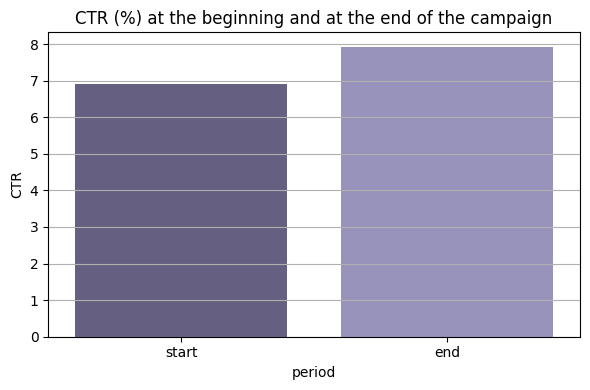

Average CTR at the beginning and at the end of the campaign:


,period,CTR
0,end,7.925212
1,start,6.915222


In [83]:
# Filter only campaign 2025 and impressions > 0
campaign_df = combined_all[(combined_all['cohort'] == '2025_campaign') & (combined_all['impressions (total)'] > 0)].copy()

# CTR Calculation
campaign_df['CTR'] = (campaign_df['clicks (total)'] / campaign_df['impressions (total)']) * 100

# Divide into the beginning and the end (in half)
campaign_df = campaign_df.sort_values(by='date')
half = len(campaign_df) // 2

campaign_df['period'] = ['start'] * half + ['end'] * (len(campaign_df) - half)

# average CTR for each half
ctr_by_half = campaign_df.groupby('period')['CTR'].mean().reset_index()

# Visualisation


plt.figure(figsize=(6, 4))
sns.barplot(data=ctr_by_half, x='period', y='CTR', hue='period', palette='Purples_d', legend=False, order=['start', 'end'])
plt.title('CTR (%) at the beginning and at the end of the campaign')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("CTR (%) at the beginning and at the end of the campaign.png")
plt.show()

# table output
print("Average CTR at the beginning and at the end of the campaign:")
display(ctr_by_half)

**CTR is higher in the second half**

Possible reasons:
- The audience responded actively
- Call-to-Action works


**Let's compare Engagement Rate (%) at the beginning and end**

Was there a loss of interest in the content as a whole, or was there just less clicking and engagement remained stable?

In [84]:
# Let's make sure the type is float
campaign_df['engagement rate (total)'] = campaign_df['engagement rate (total)'].astype(float)

# Group by periods (Start / End)
engagement_by_half = campaign_df.groupby('period')['engagement rate (total)'].mean().reset_index()

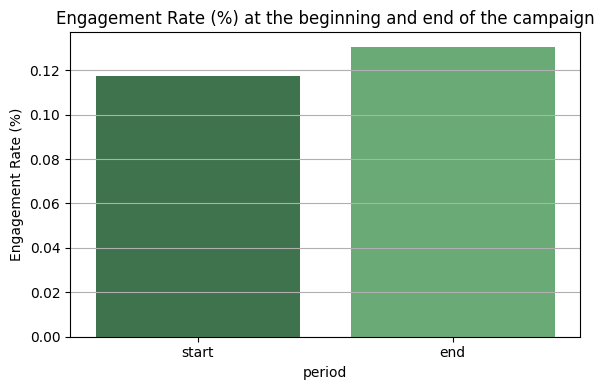

Average Engagement Rate at the beginning and end of the campaign:


,period,engagement rate (total)
0,end,0.130521
1,start,0.117537


In [85]:
# Visualisation
plt.figure(figsize=(6, 4))
sns.barplot(
    data=engagement_by_half,
    x='period',
    y='engagement rate (total)',
    hue='period',
    palette='Greens_d',
    legend=False,
    order=['start', 'end']
)
plt.title('Engagement Rate (%) at the beginning and end of the campaign')
plt.ylabel('Engagement Rate (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("Engagement Rate (%) at the beginning and end of the campaign.png")
plt.show()

# table output
print("Average Engagement Rate at the beginning and end of the campaign:")
display(engagement_by_half)

**Engagement is also rising:**

- The audience responded better
- The content became more interesting, engaging or relevant

**During the campaign analysis, we recorded an increase in both CTR and Engagement Rate in the second half of the period, which may indicate audience interest.**

### moving average of Engagement Rate

**To visualize CTR and engagement trends, we use a 3-day moving average. This window logically reflects our publishing frequency (3 times a week) and allows us to smooth out fluctuations between posts. This approach helps us highlight real changes in audience interest and content effectiveness without being distorted by individual spikes or dips.**

In [86]:
campaign_df.head(1)


,date,impressions (organic),impressions (sponsored),impressions (total),unique impressions (organic),clicks (organic),clicks (sponsored),clicks (total),reactions (organic),reactions (sponsored),...,comments (total),reposts (organic),reposts (sponsored),reposts (total),engagement rate (organic),engagement rate (sponsored),engagement rate (total),cohort,CTR,period
395,2025-03-20,74,0,74,30,3,0,3,8,0,...,0,0,0,0,0.148649,0.0,0.148649,2025_campaign,4.054054,start


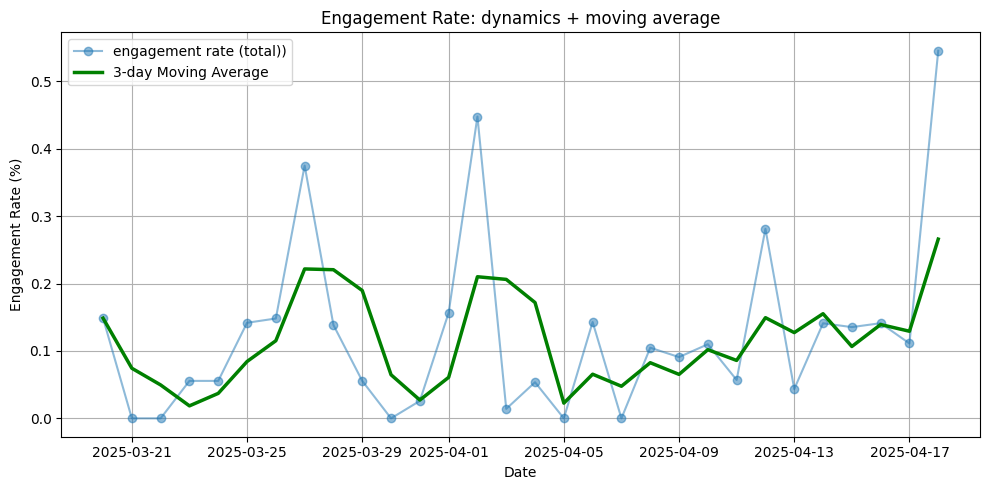

In [87]:
# Filter only campaign data
campaign_df = combined_all[combined_all['cohort'] == '2025_campaign'].copy()
campaign_df = campaign_df.sort_values(by='date')
campaign_df['engagement rate (total)'] = campaign_df['engagement rate (total)'].astype(float)

# 3 day moving average (window can be changed) 
campaign_df['engagement_ma_3day'] = campaign_df['engagement rate (total)'].rolling(window=3, min_periods=1).mean()

# Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(campaign_df['date'], campaign_df['engagement rate (total)'], label='engagement rate (total))', marker='o', alpha=0.5)
plt.plot(campaign_df['date'], campaign_df['engagement_ma_3day'], label='3-day Moving Average', linewidth=2.5, color='green')
plt.title("Engagement Rate: dynamics + moving average")
plt.xlabel("Date")
plt.ylabel("Engagement Rate (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Engagement Rate dynamics and moving average.png")
plt.show()

**3-day Moving Average shows the trend:**
- If the line is decreasing — engagement/CTR is really falling
- If it is growing — a positive trend, even if there were drawdowns on individual days
- If it fluctuates but remains stable — steady audience attention

**We posted Tuesdays, Wednesdays and Fridays**

Tha dates of posting were by weeks:
- 25-Mar-2025, 26-Mar-2025, 28-Mar-2025
- 1-Apr-2025, 2-Apr-2025, 4-Apr-2025
- 8-Apr-2025, 9-Apr-2025, 11-Apr-2025
- 15-Apr-2025, 16-Apr-2025, 18-Apr-2025
- 
**We see the trend as during the week engagement rate wer growing from post to post and after the end of week it droped. And after the 05th of April the line is steadily growing.**

**Mark successful days**

In [88]:
top_recent = campaign_df.tail(12).sort_values(by='engagement rate (total)', ascending=False)
top_recent_df = top_recent.reset_index()
top_recent_df = top_recent_df[['date', 'engagement rate (total)']]
top_recent_df
#display(top_recent[['date', 'engagement rate (total)']])

,date,engagement rate (total)
0,2025-04-18,0.545455
1,2025-04-12,0.281250
2,2025-04-16,0.141176
3,2025-04-14,0.141026
4,2025-04-15,0.135371
5,2025-04-17,0.111111
6,2025-04-10,0.109890
7,2025-04-08,0.104762
8,2025-04-09,0.090909
9,2025-04-11,0.056962


**The most successful day by 'engagement rate (total)' was on April 18, 2025.** This was post about 'Easter’s theme of renewal to urge you to review and refresh your legal documents'. The audience activated and  interacted with posts more actively, but we need to check if it indicates that the topic of the post is of interest to the audience, because the metrics given are calculated day by day. Maybe the previous post influenced current post metrics. We see also that on **12th April** there was also high engagement rate (total), but this day was empty in posting, **that indicates that metrics were followed by recent posts.**

**Despite the fluctuations, the dynamics of the last 10 days show a steady increase in engagement. This suggests that:**
- content has become more relevant,
- publications resonate better with the audience,
- successful formats can be scaled or adapted for the next campaign.

**Let's plot a moving average of CTR, just like we did with Engagement Rate. This will help us see how the clickability of content has changed over time, and whether it has trended up or down.**

### moving average of CTR

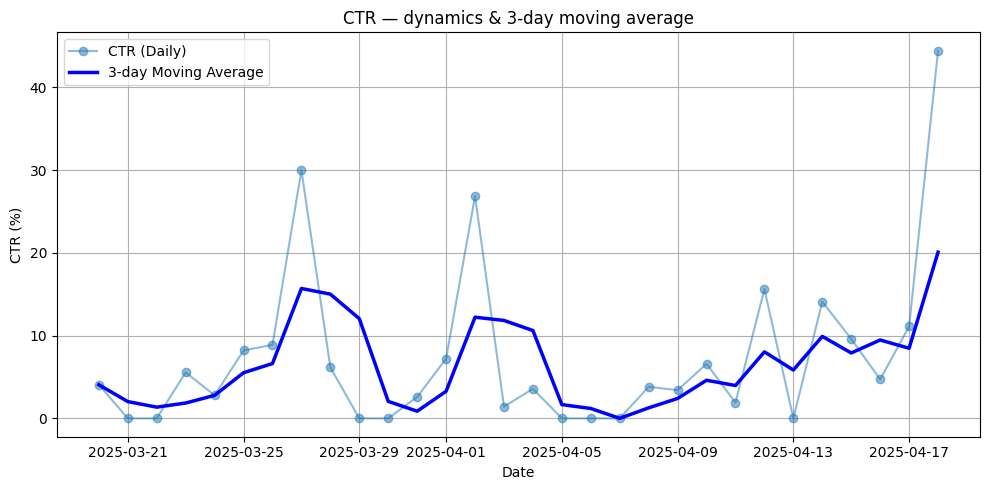

In [89]:
# Let's make sure that clicks and impressions > 0
campaign_df = combined_all[(combined_all['cohort'] == '2025_campaign') & (combined_all['impressions (total)'] > 0)].copy()
campaign_df = campaign_df.sort_values(by='date')

# Let's calculate CTR (%)
campaign_df['CTR'] = (campaign_df['clicks (total)'] / campaign_df['impressions (total)']) * 100

# Moving average (3 days)
campaign_df['CTR_ma_3day'] = campaign_df['CTR'].rolling(window=3, min_periods=1).mean()

# Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(campaign_df['date'], campaign_df['CTR'], label='CTR (Daily)', marker='o', alpha=0.5)
plt.plot(campaign_df['date'], campaign_df['CTR_ma_3day'], label='3-day Moving Average', linewidth=2.5, color='blue')
plt.title("CTR — dynamics & 3-day moving average")
plt.xlabel("Date")
plt.ylabel("CTR (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig("CTR_dynamics_moving_average.png")
plt.show()

**3-day Moving Average shows the trend:**
- If the line is decreasing — engagement/CTR is really falling
- If it is growing — a positive trend, even if there were drawdowns on individual days
- If it fluctuates but remains stable — steady audience attention

**We see the same kind of trend here as in the  Engagement Rate: dynamics + moving average**

**We posted Tuesdays, Wednesdays and Fridays**

Tha dates of posting were by weeks:
- 25-Mar-2025, 26-Mar-2025, 28-Mar-2025
- 1-Apr-2025, 2-Apr-2025, 4-Apr-2025
- 8-Apr-2025, 9-Apr-2025, 11-Apr-2025
- 15-Apr-2025, 16-Apr-2025, 18-Apr-2025 - at the current analysis was not taken into account

**We see the trend as during the week engagement rate wer growing from post to post and after the end of week it droped. And after the 05th of April the line more or less is steadily growing.**

**Let's see which posts had the highest CTR**

### days with the highest CTR

In [90]:
# Sort by CTR descending
top_ctr_days = campaign_df.sort_values(by='CTR', ascending=False).head(5)

# Displaying key columns
top_ctr_days_display = top_ctr_days[['date', 'CTR', 'impressions (total)', 'clicks (total)', 'engagement rate (total)']]

print("Top 5 days with the highest CTR:")
display(top_ctr_days_display)

Top 5 days with the highest CTR:


,date,CTR,impressions (total),clicks (total),engagement rate (total)
424,2025-04-18,44.444444,99,44,0.545455
402,2025-03-27,30.000000,40,12,0.375000
408,2025-04-02,26.865672,67,18,0.447761
418,2025-04-12,15.625000,32,5,0.281250
420,2025-04-14,14.102564,78,11,0.141026


**The 18th April is also the best permorming date by CTR**

# save to
**uncomment when needed**

In [91]:
# # Save to Excel 
# with pd.ExcelWriter("cohort_summary_metrics.xlsx") as writer:
#     cohort_summary_all.to_excel(writer, sheet_name='cohort_summary_averages', index=False)
#     cohort_median_summary_all.to_excel(writer, sheet_name='cohort_summary_medians', index=False)
#     growth_df_cohorts.to_excel(writer, sheet_name='growth_df', index=False)
#     top_ctr_days_display.to_excel(writer, sheet_name='top_ctr_days', index=False)
#     top_recent_df.to_excel(writer, sheet_name='top_engagement_day', index=False)
#     engagement_by_half.to_excel(writer, sheet_name='engagement_by_half', index=False) 
#     ctr_by_half.to_excel(writer, sheet_name='ctr_by_half', index=False) 
#     ctr_by_cohort.to_excel(writer, sheet_name='ctr_by_cohort_inf', index=False)
#     ctr_by_cohort_cleaned.to_excel(writer, sheet_name='ctr_by_cohort', index=False)
#     df_results.to_excel(writer, sheet_name='Kruskal–Wallis H-test', index=False)
#     df_res.to_excel(writer, sheet_name='Bonferroni_res', index=False)


## analysis of posts

### Top 5 posts with the highest CTR:

In [92]:
combined_posts_df.head(1)

,post_id,employee_id,post type,created date,audience,impressions,clicks,click through rate (ctr),likes,comments,reposts,engagement rate,content type,date,cohort,weekday
29,30,2,Organic,2024-02-19,All followers,181,4,0.022099,11,0,2,0.093923,text,2024-02-19,2024_baseline,NaN


In [93]:
# We remove lines without showings (so that there is no inf)
combined_posts_df = combined_posts_df[combined_posts_df['impressions'] > 0].copy()

# Calculate CTR
combined_posts_df['CTR%'] = (combined_posts_df['clicks'] / combined_posts_df['impressions']) * 100

# Sort by CTR
top_ctr_posts = combined_posts_df.sort_values(by='CTR%', ascending=False).head(5)
top_ctr_df = (
    top_ctr_posts
      [['created date', 'post_id', 'CTR%', 'impressions', 'clicks', 'cohort']]
      .reset_index(drop=True)
      .copy()
)

# table output
print("Top 5 posts with the highest CTR:")
top_ctr_df

Top 5 posts with the highest CTR:


,created date,post_id,CTR%,impressions,clicks,cohort
0,2025-04-14,31,48.387097,93,45,2025_campaign
1,2025-03-31,38,27.819549,133,37,2025_campaign
2,2025-03-25,42,21.693122,189,41,2025_campaign
3,2024-10-14,14,8.064516,124,10,2024_baseline
4,2025-01-16,4,7.317073,164,12,2024_baseline


**The highest CTR was recorded on the dates: March 25 and 31, 2025, April 14, 2025, January 16, 2025, and October 14, 2024.**

**These posts contained:**

| date        | specific topic| format    | CTA | 
|-------------|-------------|-------------|-------------|
|October 14, 2024|Results of NOMA seminar attendance|Text|no|
|January 16, 2025|Meet our people|VIDEO|no|
|March 25, 2025|Hot topic. Cookie Banners Under Fire|Text|Book your 15min consultation|
|March 31, 2025|Don’t Sign That Contract Yet.<..> Legal Gym|Text + Carousel|Book your 15min consultation|
|April 14, 2025|Easter is a time of renewal|Text + Carousel|Book your 15min consultation|

**which probably provided a high level of interest. It is recommended to re-test these approaches in the future.**

### summary of average post performance by cohort.

In [94]:
# Convert date strings to datetime format
# posts_df_month['created date'] = pd.to_datetime(posts_df_month['created date'])
# posts_df_year['created date'] = pd.to_datetime(posts_df_year['created date'])

# Define cohorts
mask_same_period = (posts_df_year['created date'] >= '2024-03-14') & (posts_df_year['created date'] <= '2024-04-14')
posts_same_period = posts_df_year[mask_same_period].copy()
posts_same_period['cohort'] = '2024_same_period'

posts_baseline = posts_df_year[~mask_same_period].copy()
posts_baseline['cohort'] = '2024_baseline'

posts_df_month['cohort'] = '2025_campaign'

# Combine all posts into one DataFrame
combined_posts = pd.concat([posts_baseline, posts_same_period, posts_df_month], ignore_index=True)

# Clean and calculate CTR
combined_posts = combined_posts[combined_posts['impressions'] > 0].copy()
combined_posts['CTR'] = (combined_posts['clicks'] / combined_posts['impressions']) * 100

# Summarize average CTR and engagement rate by cohort
summary = combined_posts.groupby('cohort')[['CTR', 'engagement rate']].mean().round(2)
summary_average_CTR_eng = summary.reset_index()
print(type(summary_average_CTR_eng))
display(summary_average_CTR_eng)

<class 'pandas.core.frame.DataFrame'>


,cohort,CTR,engagement rate
0,2024_baseline,3.18,0.07
1,2024_same_period,2.18,0.09
2,2025_campaign,10.07,0.16


- **CTR increased from ~2–3% to 7+%** Last year (baseline) CTR was 2-3%, and in the 2025 campaign it increased to 10.07%
- **Engagement Rate almost doubled** From 0.07 → 0.16 is an increase of ~130%, that is, almost 2 times, more precisely: (0.16 - 0.07) / 0.07 ≈ 128.5%)

### Analysis by weekdays

### comparison of average post performance over the past year:

- 2024 Baseline — all days of the week except spring
- 2024 Same Period — only the same period of the 2025 campaign

In [95]:
# Filter posts by cohort
posts_baseline = combined_posts[combined_posts['cohort'] == '2024_baseline'].copy()
posts_same_period = combined_posts[combined_posts['cohort'] == '2024_same_period'].copy()

# Add weekday to both
posts_baseline['weekday'] = posts_baseline['created date'].dt.day_name()
posts_same_period['weekday'] = posts_same_period['created date'].dt.day_name()

# Calculate average CTR and Engagement by weekday
baseline_weekday_perf = posts_baseline.groupby('weekday')[['CTR', 'engagement rate']].mean().round(2).reset_index()
same_period_weekday_perf = posts_same_period.groupby('weekday')[['CTR', 'engagement rate']].mean().round(2).reset_index()

# Order weekdays logically
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for df in [baseline_weekday_perf, same_period_weekday_perf]:
    df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)
    df.sort_values('weekday', inplace=True)

# Show both tables
print('baseline_weekday_perf')
display(baseline_weekday_perf)
print('same_period_weekday_perf')
display(same_period_weekday_perf)

baseline_weekday_perf_df = baseline_weekday_perf.reset_index()
same_period_weekday_perf_df = same_period_weekday_perf.reset_index()

baseline_weekday_perf


,weekday,CTR,engagement rate
1,Monday,3.91,0.08
3,Tuesday,3.04,0.07
4,Wednesday,3.56,0.07
2,Thursday,2.01,0.06
0,Friday,3.19,0.05


same_period_weekday_perf


,weekday,CTR,engagement rate
0,Wednesday,2.18,0.09


### result

**Mondays** had the highest CTR and engagement. **Thursdays** were the least effective. This may indicate that Monday is the best day to post content, especially with calls to action.

During the **same period last year** (20.03–18.04.2024), click-through rates and engagement were noticeably lower, even on the most active day, Wednesday. This **highlights** the effectiveness of the planned approach in 2025.

**The numbers were consistently lower than the campaign throughout the year**, highlighting that the **structured schedule and thoughtful content of the 2025 campaign** delivered significantly **better results** across all key metrics.

**Final conclusion:**
- The 2025 campaign showed a significant increase in efficiency (2-4x higher CTR, especially on Tuesdays).
- Tuesday is the strongest day, it is worth using it as a support day for key content.
- Regular publication schedule + thoughtful content → increase engagement and click-through rate.
- Compared to the irregular activity of 2024, the planned campaign provides clear and demonstrable advantages.

### comparison of average post performance over the 2025_campaign:

In [96]:
combined_posts.head(2)

,post_id,employee_id,post type,created date,audience,impressions,clicks,click through rate (ctr),likes,comments,reposts,engagement rate,content type,date,cohort,weekday,CTR
0,1,1,Organic,2025-01-31,All followers,281,2,0.007117,4,1,0,0.024911,text,2025-01-31,2024_baseline,NaN,0.711744
1,2,1,Organic,2025-01-29,All followers,91,3,0.032967,7,0,0,0.109890,text,2025-01-29,2024_baseline,NaN,3.296703


In [97]:

# Filter only 2025 campaign posts
campaign_posts = combined_posts[combined_posts['cohort'] == '2025_campaign'].copy()

# Group by weekday and calculate average CTR and Engagement rate
weekday_performance = campaign_posts.groupby('weekday')[['CTR', 'engagement rate']].mean().round(2).reset_index()

# Order weekdays logically
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_performance['weekday'] = pd.Categorical(weekday_performance['weekday'], categories=weekday_order, ordered=True)
weekday_performance = weekday_performance.sort_values('weekday')
weekday_performance_df = weekday_performance.reset_index()
weekday_performance_df

,index,weekday,CTR,engagement rate
0,2,Tuesday,3.77,0.10
1,3,Wednesday,14.85,0.21
2,1,Thursday,1.14,0.09
3,0,Friday,16.05,0.21


**On Wednesday and Friday, the click-through rate was higher; on these days, we posted more clickable formats (carousel, events, and announcements), and on Tuesday, just text, but with hot topics in our opinion.**

**Let's take a look at median and sample size:**

In [98]:
summary_posts_upd = (
    campaign_posts
    .groupby('weekday')['CTR']
    .agg(count='count', mean='mean', median='median', std='std')
    .round(2)
    .loc[lambda df: df.index.isin(weekday_order)]
    # теперь уже можно сортировать по порядку
    .sort_index(key=lambda idx: idx.map({d:i for i,d in enumerate(weekday_order)}))
)
summary_posts_upd_df = summary_posts_upd.reset_index()
print(summary_posts_upd_df)

     weekday  count   mean  median    std
0    Tuesday      4   3.77    4.14   1.44
1  Wednesday      4  14.85   13.97  11.75
2   Thursday      2   1.14    1.14   1.61
3     Friday      4  16.05    7.01  21.70


**The sample shows us that:**

**Tuesday**
– 4 posts, average CTR 3.77% with a median of 4.14% and σ≈1.44.
– Low spread and relatively small value — this means that the audience reacts stably on Tuesday, but does not “take off”.

**Wednesday**
– 4 posts, mean 14.85%, median 13.97%, σ≈11.75.
– High average, but also very large spread — both successes and failures are possible.

**Thursday**
– Only 2 posts, both with a CTR of 1.14% (σ≈1.61, since the sample is small).
– Such data is almost uninformative: one “bad” or “good” campaign is enough to significantly change the average.

**Friday**
– 4 posts, mean 16.05%, median 7.01%, σ≈21.70.
– Very high variability: there are extremely “good” (CTR>>10%) and very weak publications, so the average is high, and the median is much lower.

**Wednesday looks like the most “reliable” day:**
- High median (≈13.97%) suggests that exactly half of the posts give a CTR no lower than this level.
- Average (≈14.85%) almost coincides with the median and is not very “blurred” by outliers (σ≈11.75).
- While on Friday, although the average is higher (≈16.05%), the very large spread and low median (≈7.01%) mean that success there is irregular - a couple of very successful posts “shoot”, but the rest may be weak.

**Thus, Wednesday is the best candidate for sustainable CTR growth.**

<span style=" color:red;">**Now let's check the statistical significance of the differences between days.**</span>

## Statistical Test

**test the statistical significance of the difference in CTR between days using a one-way ANOVA:**
- If p < 0.05, this indicates statistically significant differences between at least two groups (days).
- If p ≥ 0.05, then with this sample size we cannot reject the null hypothesis of equality of average CTRs.

In [99]:
# Extract CTR series by days
tue = campaign_posts.loc[campaign_posts['weekday']=='Tuesday', 'CTR']
wed = campaign_posts.loc[campaign_posts['weekday']=='Wednesday', 'CTR']
thu = campaign_posts.loc[campaign_posts['weekday']=='Thursday', 'CTR']
fri = campaign_posts.loc[campaign_posts['weekday']=='Friday', 'CTR']

# Run a one-way ANOVA
F_stat, p_value = f_oneway(tue, wed, thu, fri)
print(f"F = {F_stat:.2f}, p = {p_value:.3f}")

F = 1.00, p = 0.431


- **With a p-value of 0.431 (p > 0.05), we cannot reject the null hypothesis that average CTRs are equal across days.**
- **With the available data volume, statistically significant differences between Tuesday, Wednesday, Thursday, and Friday were not found — Wednesday’s “victory” was only conditional at this stage of the analysis.**
-
- **let's remove Thursday from the sample and go back to ANOVA because it was not planned in our schedule and the client did it on his own, breaking the schedule:**

In [100]:
# Extract CTR for three days
tue = campaign_posts.loc[campaign_posts['weekday']=='Tuesday', 'CTR']
wed = campaign_posts.loc[campaign_posts['weekday']=='Wednesday', 'CTR']
fri = campaign_posts.loc[campaign_posts['weekday']=='Friday', 'CTR']

# Run ANOVA without the Thursday group
F_stat3, p_value3 = f_oneway(tue, wed, fri)
print(f"F (3 groups) = {F_stat3:.2f}, p = {p_value3:.3f}")

F (3 groups) = 0.90, p = 0.440


- **The result of ANOVA on three days (Tuesday, Wednesday, Friday) is F(2,11)=0.90, 𝑝=0.44. Since 𝑝>0.05, we do not find statistically significant differences in the average CTRs between these three days even after excluding Thursday.**
- **In practice, this means that there is no “clear victory” of Wednesday according to the current data. Although Wednesday looked better according to the point means and medians, these differences are not statistically confirmed.**
- **The small sample size (4 observations on Tuesday, Wednesday, and Friday) gives low power of the test. With such a group size (n≈4), even a fairly large effect is difficult to “catch” as significant.**

**The recommendation here is to increase the data volume: collect more posts for each of the three days (at least 8-10) to increase the sensitivity of the ANOVA. In fact, it is necessary to conduct the campaign for a longer period to evaluate the results and build up metrics and statistics.**

**Let's try to calculate η² (or ε²) for this ANOVA to see how big the difference really is (even if it is statistically "insignificant"):**

In [101]:
# parameters
k = 3                    # group's number
N = len(tue) + len(wed) + len(fri)

# Effect size by three-group ANOVA 
eta_sq3     = (F_stat3 * (k - 1)) / (F_stat3 * (k - 1) + (N - k))
epsilon_sq3 = (F_stat3 * (k - 1) - (k - 1)) / (F_stat3 * (k - 1) + (N - k))
epsilon_sq3 = max(epsilon_sq3, 0)

# output
print(f"ANOVA (3 groups): F = {F_stat3:.2f}, p = {p_value3:.3f}")
print(f"η² = {eta_sq3:.3f}")
print(f"ε² = {epsilon_sq3:.3f}")

ANOVA (3 groups): F = 0.90, p = 0.440
η² = 0.167
ε² = 0.000


- **η² ≈ 0.167 suggests that approximately 17% of the total CTR variability is explained by the difference between days of the week. For marketing data, this is already a noticeable share, although statistically (p = 0.44) it is not “breaking through” with such small groups.**
- **ε² ≈ 0 reflects that, taking into account the “number of groups” correction, the effect is not robust with the current sample size.**

**Conclusion**
- **Although the raw η² shows a significant effect (≈17%), p = 0.44 suggests that with your current sample size (n≈4–4–4) there is no statistically significant difference.**
- **The conservative ε² = 0 emphasizes that without more data we cannot confidently claim that the days are different.**
- **we need to gather data for approximately 3 month**

In [102]:
anova_results = pd.DataFrame({
    'Test': ['ANOVA Tue-Wed-Fri'],
    'F_statistic': [F_stat3],
    'p_value': [p_value3],
    'eta_squared': [eta_sq3],
    'epsilon_squared': [epsilon_sq3]
})

           n     median  CI_lower   CI_upper
weekday                                     
Tuesday    4   4.143763  1.796407   5.000000
Wednesday  4  13.971561  3.652968  27.819549
Friday     4   7.013271  1.785714  48.387097


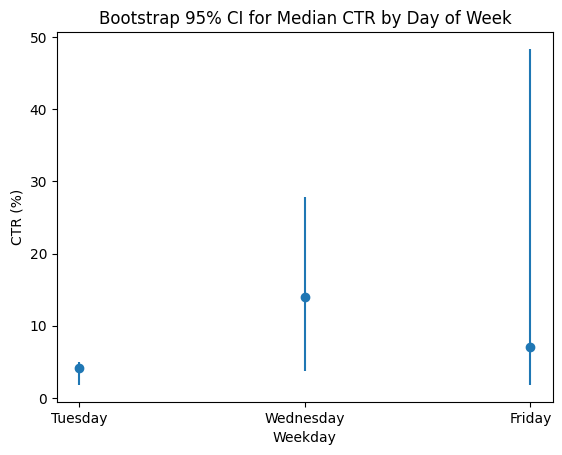

In [103]:
days = ['Tuesday', 'Wednesday', 'Friday']
n_boot = 10000
results = []

for day in days:
    # 
    data = campaign_posts.loc[campaign_posts['weekday'] == day, 'CTR'].dropna().values
    # Generating bootstrap samples by median
    boot_meds = np.array([
        np.median(np.random.choice(data, size=len(data), replace=True))
        for _ in range(n_boot)
    ])
    lower = np.percentile(boot_meds, 2.5)
    upper = np.percentile(boot_meds, 97.5)
    median = np.median(data)
    results.append({
        'weekday': day,
        'n': len(data),
        'median': median,
        'CI_lower': lower,
        'CI_upper': upper
    })

# Collecting in DataFrame
df_ci = pd.DataFrame(results).set_index('weekday')
print(df_ci)

# plot graph
plt.errorbar(
    df_ci.index,
    df_ci['median'],
    yerr=[df_ci['median'] - df_ci['CI_lower'], df_ci['CI_upper'] - df_ci['median']],
    fmt='o'
)
plt.title('Bootstrap 95% CI for Median CTR by Day of Week')
plt.xlabel('Weekday')
plt.ylabel('CTR (%)')
plt.savefig("Bootstrap 95% CI for Median CTR by Day of Week.png", dpi=300, bbox_inches="tight")
plt.show()

**Interpretation:**  
- **Tuesday** shows a narrow CI around a low median CTR (~1.8%–5.0%), indicating consistent—but modest—engagement.  
- **Wednesday** has the highest median (~14%), but a wide interval (≈3.7%–27.8%), reflecting high variability and few data points.  
- **Friday** lies between Tuesday and Wednesday, yet its CI is even wider (≈1.8%–48.4%), showing especially unstable performance.

Because these intervals overlap substantially, we cannot conclusively declare one weekday “best.” However, Tuesday’s tight interval suggests it may serve well as a control, while Wednesday and Friday warrant further investigation once more data are collected.

**Conclusion**
- **stat tests didn't show difference between weekdays**
- **we need to gather data for approximately 3 month**

# save to

**uncomment when needed**

In [104]:
# # Save to Excel 
# with pd.ExcelWriter("cohort_summary_all.xlsx") as writer:
#     combined_all.to_excel(writer, sheet_name='All Combined Metrics', index=False)
#     top_ctr_df.to_excel(writer, sheet_name='top_ctr_posts', index=False)
#     summary_average_CTR_eng.to_excel(writer, sheet_name='cohort_average_CTR_eng', index=False)
#     baseline_weekday_perf_df.to_excel(writer, sheet_name='baseline_weekday_perf_df', index=False)
#     same_period_weekday_perf_df.to_excel(writer, sheet_name='same_period_weekday_perf_df', index=False)
#     weekday_performance_df.to_excel(writer, sheet_name='campaign_weekday_perf_df', index=False)
#     summary_posts_upd_df.to_excel(writer, sheet_name='campaign_weekday_CTR_eng', index=False)
#     df_ci.to_excel(writer, sheet_name='df_ci', index=False)

# with pd.ExcelWriter("cohort_summary_all.xlsx", engine='openpyxl',
#                     mode='a',            # append mode
#                     if_sheet_exists='new'  # если лист с таким именем уже есть — создаст новый
#                     ) as writer:
#     anova_results.to_excel(
#         writer,
#         sheet_name='ANOVA Results',
#         index=False
#     )

# Visitors

**Visitor metrics:**
- Traffic metrics for unique visitors and page views over time. Mobile metrics include LinkedIn native apps and mobile web browsers.
- Unique visitors are calculated daily and are not de-duplicated over multiple days.

**Visitors Definition:** Individuals who visit your LinkedIn profile or company page, regardless of whether they interact or follow.

**Characteristics:**
- They might have clicked on your profile from search results, LinkedIn feed, external links, or posts.
- Visitors do not necessarily indicate long-term interest or engagement; they simply viewed your content.
- Can include anonymous views or visitors from outside LinkedIn.

**Usefulness:**
- Helps measure general visibility and discoverability of your page.
- Useful to assess traffic-driving efforts (content, events, external sources).

## read files

In [105]:
file_path_visitors = r"D:\visitors_1year_upto18Apr2025.xlsx" # input path here

In [106]:
# read file content_1year.xlsx
visitors_metrics = pd.read_excel(file_path_visitors, sheet_name="Visitor metrics")
visitors_location = pd.read_excel(file_path_visitors, sheet_name="Location")
visitors_job_function = pd.read_excel(file_path_visitors, sheet_name="Job function")
visitors_seniority = pd.read_excel(file_path_visitors, sheet_name="Seniority")
visitors_industry = pd.read_excel(file_path_visitors, sheet_name="Industry")
visitors_company_size = pd.read_excel(file_path_visitors, sheet_name="Company size")


In [107]:
# Lower case in column names
visitors_metrics.columns = visitors_metrics.columns.str.lower()

In [108]:

basic_func(visitors_metrics)

,date,overview page views (desktop),overview page views (mobile),overview page views (total),overview unique visitors (desktop),overview unique visitors (mobile),overview unique visitors (total),life page views (desktop),life page views (mobile),life page views (total),...,jobs page views (total),jobs unique visitors (desktop),jobs unique visitors (mobile),jobs unique visitors (total),total page views (desktop),total page views (mobile),total page views (total),total unique visitors (desktop),total unique visitors (mobile),total unique visitors (total)
0,04/19/2024,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,04/20/2024,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   date                                365 non-null    object
 1   overview page views (desktop)       365 non-null    int64 
 2   overview page views (mobile)        365 non-null    int64 
 3   overview page views (total)         365 non-null    int64 
 4   overview unique visitors (desktop)  365 non-null    int64 
 5   overview unique visitors (mobile)   365 non-null    int64 
 6   overview unique visitors (total)    365 non-null    int64 
 7   life page views (desktop)           365 non-null    int64 
 8   life page views (mobile)            365 non-null    int64 
 9   life page views (total)             365 non-null    int64 
 10  life unique visitors (desktop)      365 non-null    int64 
 11  life unique visitors (mobile)       365 non-null    int64 

None

,count,mean,std,min,25%,50%,75%,max
overview page views (desktop),365.0,0.342466,1.126835,0.0,0.0,0.0,0.0,11.0
overview page views (mobile),365.0,0.098630,0.446135,0.0,0.0,0.0,0.0,4.0
overview page views (total),365.0,0.441096,1.294519,0.0,0.0,0.0,0.0,11.0
overview unique visitors (desktop),365.0,0.183562,0.459040,0.0,0.0,0.0,0.0,2.0
overview unique visitors (mobile),365.0,0.068493,0.283656,0.0,0.0,0.0,0.0,2.0
overview unique visitors (total),365.0,0.252055,0.585566,0.0,0.0,0.0,0.0,4.0
life page views (desktop),365.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
life page views (mobile),365.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
life page views (total),365.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
life unique visitors (desktop),365.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


Number of obvious duplicates in the table 0
Dataset size: (365, 25)


In [109]:
print('visitors_location info')
visitors_location.info()
print('')
print('visitors_job_function info')
visitors_job_function.info()
print('')
print('visitors_seniority info')
visitors_seniority.info()
print('')
print('visitors_industry info')
visitors_industry.info()
print('')
print('visitors_company_size info')
visitors_company_size.info()

visitors_location info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Location     2 non-null      object
 1   Total views  2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 164.0+ bytes

visitors_job_function info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job function  3 non-null      object
 1   Total views   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes

visitors_seniority info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Seniority    3 non-null      object
 1   Total views  3 non-null      int64 
dtypes: int64(1), 

In [110]:
display(visitors_location)
print('')

display(visitors_job_function.sort_values(by='Total views', ascending=False))
print('')

display(visitors_seniority.sort_values(by='Total views', ascending=False))
print('')

display(visitors_industry.sort_values(by='Total views', ascending=False))
print('')
        
display(visitors_company_size.sort_values(by='Total views', ascending=False))

,Location,Total views
0,"Helsinki Metropolitan Area, Finland",154
1,"Lviv, Ukraine",9


,Job function,Total views
2,Entrepreneurship,24
0,Community and Social Services,8
1,Operations,7


,Seniority,Total views
1,Senior,48
2,Partner,37
0,Entry,25


,Industry,Total views
9,Legal Services,42
3,"Transportation, Logistics, Supply Chain and St...",34
4,Law Practice,18
0,Business Consulting and Services,17
7,IT Services and IT Consulting,17
6,Administration of Justice,14
5,Book and Periodical Publishing,14
2,Marketing Services,13
1,Business Content,12
8,International Trade and Development,12


,Company size,Total views
0,2-10,48
2,11-50,24
1,501-1000,10


# data preparation

## conversion data types

In [111]:
# Date conversion
visitors_metrics['date'] = pd.to_datetime(visitors_metrics['date'])
display(visitors_metrics['date'].dtype)

dtype('<M8[ns]')

# analysis

## aggregate analysis + traffic graph

In [112]:
# aggregated metrics
aggregated_metrics = {
    'Total Days': visitors_metrics['date'].nunique(),
    'Total Page Views': visitors_metrics['total page views (total)'].sum(),
    'Total Unique Visitors': visitors_metrics['total unique visitors (total)'].sum(),
    'Avg Page Views per Day': visitors_metrics['total page views (total)'].mean().round(2),
    'Avg Unique Visitors per Day': visitors_metrics['total unique visitors (total)'].mean().round(2),
    'Total Mobile Views': visitors_metrics['total page views (mobile)'].sum(),
    'Total Desktop Views': visitors_metrics['total page views (desktop)'].sum()
}
display(aggregated_metrics)

{'Total Days': 365,
 'Total Page Views': np.int64(227),
 'Total Unique Visitors': np.int64(97),
 'Avg Page Views per Day': np.float64(0.62),
 'Avg Unique Visitors per Day': np.float64(0.27),
 'Total Mobile Views': np.int64(67),
 'Total Desktop Views': np.int64(160)}

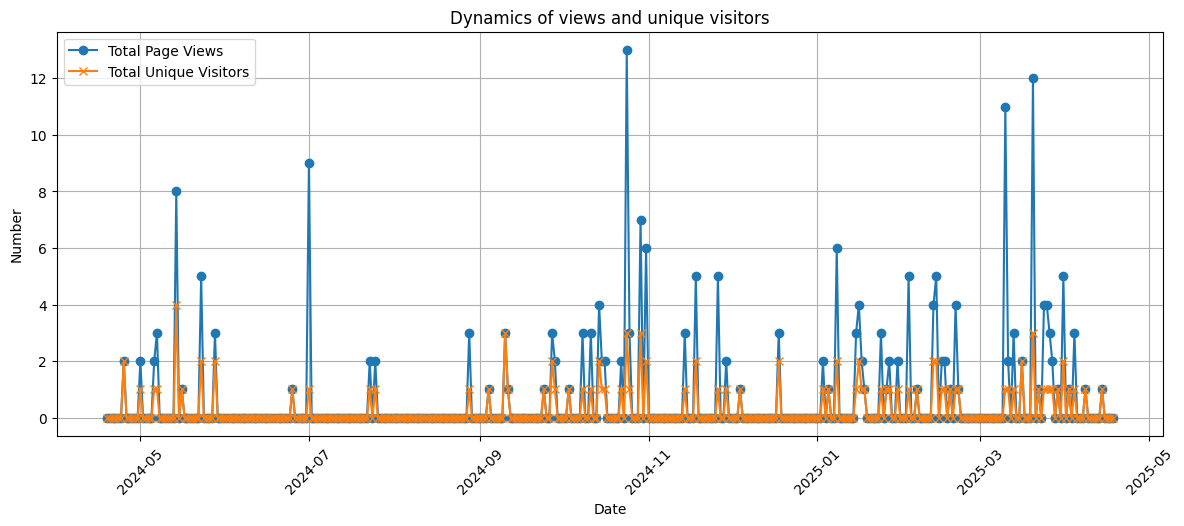

,Metric,Value
0,Total Days,365.00
1,Total Page Views,227.00
2,Total Unique Visitors,97.00
3,Avg Page Views per Day,0.62
4,Avg Unique Visitors per Day,0.27
5,Total Mobile Views,67.00
6,Total Desktop Views,160.00


In [113]:
# Graph of dynamics of views and unique visitors
plt.figure(figsize=(12, 5))
plt.plot(visitors_metrics['date'], visitors_metrics['total page views (total)'], label='Total Page Views', marker='o')
plt.plot(visitors_metrics['date'], visitors_metrics['total unique visitors (total)'], label='Total Unique Visitors', marker='x')
plt.title('Dynamics of views and unique visitors')
plt.xlabel('Date')
plt.ylabel('Number')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("Dynamics of views and unique visitors.png", dpi=300, bbox_inches="tight")
plt.show()

# convert it into a table for output
agg_df = pd.DataFrame(list(aggregated_metrics.items()), columns=['Metric', 'Value'])
agg_df

**Aggregated analysis results:**
- 365 days of data
- 232 page views
- 100 unique visitors
- Average per day: 0.64 views, 0.27 unique visits
- Mobile views: 68
- Desktop views: 164 (predominant)

**The graph shows how views and visits changed by day.**

### adding cohorts '2025_campaign' and '2024_baseline'

In [114]:
# add cohorts

campaign_start = pd.to_datetime("2025-03-24")
campaign_end = pd.to_datetime("2025-04-24")

visitors_metrics['cohort'] = visitors_metrics['date'].apply(
    lambda d: '2025_campaign' if campaign_start <= d <= campaign_end else '2024_baseline'
)
visitors_metrics.tail(2)

,date,overview page views (desktop),overview page views (mobile),overview page views (total),overview unique visitors (desktop),overview unique visitors (mobile),overview unique visitors (total),life page views (desktop),life page views (mobile),life page views (total),...,jobs unique visitors (desktop),jobs unique visitors (mobile),jobs unique visitors (total),total page views (desktop),total page views (mobile),total page views (total),total unique visitors (desktop),total unique visitors (mobile),total unique visitors (total),cohort
363,2025-04-17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2025_campaign
364,2025-04-18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2025_campaign


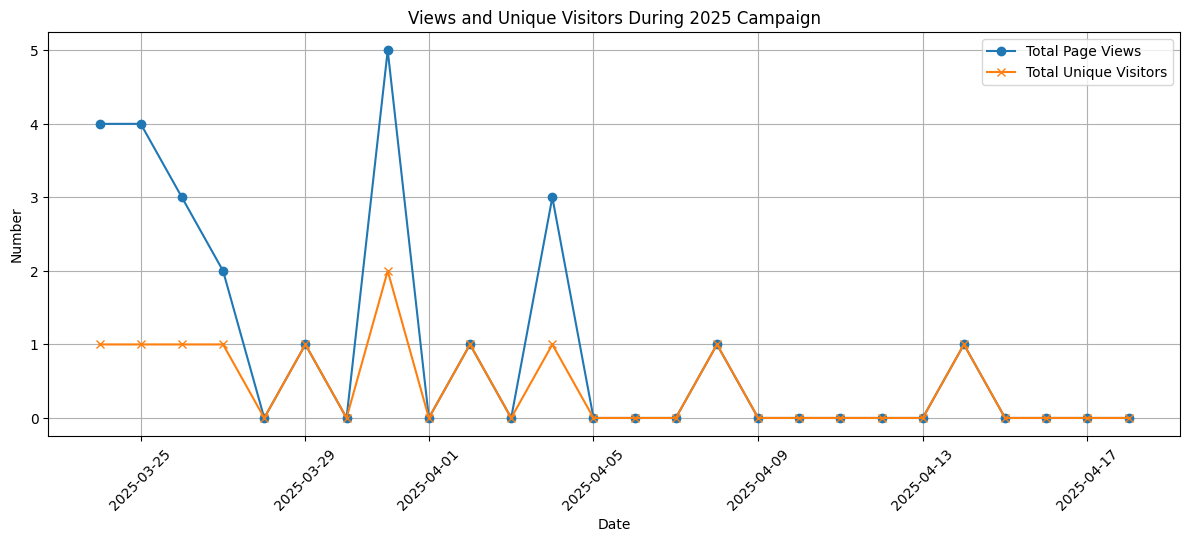

In [115]:
# Graph of dynamics of views and unique visitors for the period of campaign
campaign_df = visitors_metrics[visitors_metrics['cohort'] == '2025_campaign']

plt.figure(figsize=(12, 5))
plt.plot(campaign_df['date'], campaign_df['total page views (total)'], label='Total Page Views', marker='o')
plt.plot(campaign_df['date'], campaign_df['total unique visitors (total)'], label='Total Unique Visitors', marker='x')
plt.title('Views and Unique Visitors During 2025 Campaign')
plt.xlabel('Date')
plt.ylabel('Number')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("Views and Unique Visitors During 2025 Campaign.png", dpi=300, bbox_inches="tight")
plt.show()


**Let's compare aggregated values in two periods: campaign and baseline:**

In [116]:
# Compare aggregated values in two periods: campaign and baseline
agg_by_cohort = visitors_metrics.groupby('cohort')[[
    'total page views (total)',
    'total unique visitors (total)'
]].agg(['sum', 'mean']).round(2)

agg_by_cohort

total page views (total)       total unique visitors (total)  \
                                   sum  mean                           sum   
cohort                                                                       
2024_baseline                      202  0.60                            86   
2025_campaign                       25  0.96                            11   

                     
               mean  
cohort               
2024_baseline  0.25  
2025_campaign  0.42

In [117]:
# convert agg_by_cohort to dataframe

agg_by_cohort_df = agg_by_cohort.reset_index()

agg_by_cohort_df.columns = [
    'cohort'
] + [
    f"{metric}_{stat}"
    for metric, stat in agg_by_cohort.columns.tolist()
    if metric != 'cohort'
]
print(agg_by_cohort_df.head())

          cohort  total page views (total)_sum  total page views (total)_mean  \
0  2024_baseline                           202                           0.60   
1  2025_campaign                            25                           0.96   

   total unique visitors (total)_sum  total unique visitors (total)_mean  
0                                 86                                0.25  
1                                 11                                0.42  


In [118]:
# extract the mean values for each cohort
baseline_views_mean = agg_by_cohort.loc['2024_baseline', ('total page views (total)', 'mean')]
campaign_views_mean = agg_by_cohort.loc['2025_campaign', ('total page views (total)', 'mean')]

baseline_visitors_mean = agg_by_cohort.loc['2024_baseline', ('total unique visitors (total)', 'mean')]
campaign_visitors_mean = agg_by_cohort.loc['2025_campaign', ('total unique visitors (total)', 'mean')]

# Calculation of percentage increase
views_growth_pct = ((campaign_views_mean - baseline_views_mean) / baseline_views_mean) * 100
visitors_growth_pct = ((campaign_visitors_mean - baseline_visitors_mean) / baseline_visitors_mean) * 100

# Summary table
growth_df = pd.DataFrame({
    'Metric': ['Avg Page Views per Day', 'Avg Unique Visitors per Day'],
    '2024 Baseline': [baseline_views_mean, baseline_visitors_mean],
    '2025 Campaign': [campaign_views_mean, campaign_visitors_mean],
    'Growth (%)': [round(views_growth_pct, 2), round(visitors_growth_pct, 2)]
})

growth_df

,Metric,2024 Baseline,2025 Campaign,Growth (%)
0,Avg Page Views per Day,0.60,0.96,60.0
1,Avg Unique Visitors per Day,0.25,0.42,68.0


### intermediate result

**2025_campaign (high frequency posts)**
- Average views per day: 0.96
- Average unique visitors per day: 0.42

**2024_baseline (organic traffic without regular posting)**
- Average views per day: 0.60
- Average unique visitors per day: 0.25

**Comparison in %**
- Daily page views increased by +60%
- Daily unique visitors increased by +68%

This is clear evidence that regular posting during the campaign significantly increased engagement and interest in the company page.

**Conclusion**
- During the 2025 campaign, when posts were published regularly, there was an almost two-fold increase in both views and unique visitors.
- This indicates a direct relationship between the frequency of content activity and interest in the company profile.

## Traffic Peaks and Corresponding Posts via Visitors

In [119]:
# Finding the days with the highest attendance
active_days = visitors_metrics[visitors_metrics['total page views (total)'] > 0].copy()
top_traffic_days = active_days.sort_values(by='total page views (total)', ascending=False).head(5)
top_traffic_days = top_traffic_days[['date', 'total page views (total)', 'total unique visitors (total)']]

# We compare posts by date
matched = top_traffic_days.merge(combined_posts_df, left_on='date', right_on='date', how='left')

# Use the correct column names to display the summary table
final_matched = matched[[
    'date',
    'cohort',
    'total page views (total)',
    'total unique visitors (total)',
    'post_id',
    'click through rate (ctr)',
    'engagement rate'
]]

final_matched

,date,cohort,total page views (total),total unique visitors (total),post_id,click through rate (ctr),engagement rate
0,2024-10-24,2024_baseline,13,3,10.0,0.00000,0.018868
1,2025-03-20,2025_campaign,12,3,44.0,0.00000,0.090909
2,2025-03-10,NaN,11,1,NaN,NaN,NaN
3,2024-07-01,NaN,9,1,NaN,NaN,NaN
4,2024-05-14,2024_baseline,8,4,24.0,0.02681,0.064343


**The result and empty nan values ​​again show that the visit statistics are not tied to the post date, since there is no cohort data and post ID for all the output lines.**

**we can fill in the data for the cohort, since we see that this is the period of the previous year. regarding the link to the post, we will have to make approximations.**

In [120]:
final_matched.loc[:, 'cohort'] = final_matched['cohort'].fillna('2024_baseline').str.strip()
final_matched

,date,cohort,total page views (total),total unique visitors (total),post_id,click through rate (ctr),engagement rate
0,2024-10-24,2024_baseline,13,3,10.0,0.00000,0.018868
1,2025-03-20,2025_campaign,12,3,44.0,0.00000,0.090909
2,2025-03-10,2024_baseline,11,1,NaN,NaN,NaN
3,2024-07-01,2024_baseline,9,1,NaN,NaN,NaN
4,2024-05-14,2024_baseline,8,4,24.0,0.02681,0.064343


In [121]:
# check unique values
print(final_matched['cohort'].value_counts(dropna=False))

cohort
2024_baseline    4
2025_campaign    1
Name: count, dtype: int64


## result by Visitors


**Conclusion**
- During the 2025 campaign, when posts were published regularly, there was an almost two-fold increase in both views and unique visitors.
- This indicates a direct relationship between the frequency of content activity and interest in the company profile.
- So, we found that the highest ranking posts in terms of visitors were posts with IDs 0010, 0044, 0024 - and the post  with id 0044 indicated the 2025_campaign activity.

# save to

**uncomment when needed**

In [122]:
# # Save to Excel 
# with pd.ExcelWriter("visitors_summary_anonym.xlsx") as writer:
#     agg_df.to_excel(writer, sheet_name='aggregated_visitors', index=False)
#     agg_by_cohort_df.to_excel(writer, sheet_name='aggregated_campaign_visitors', index=False)
#     growth_df.to_excel(writer, sheet_name='visitors_comparison_growth', index=False)
#     final_matched.to_excel(writer, sheet_name='top_visitors_days_posts', index=False)

# Followers

**Definition:** Users who have explicitly chosen to follow your profile or company page to see your updates regularly.

**Characteristics:**
- Followers receive your updates in their LinkedIn feed.
- Indicates sustained interest or commitment to your content or brand.
- Followers are more likely to engage with your posts, share content, or become potential clients/customers.

**Usefulness:**
- Reflects a more loyal, engaged audience.
- Critical for assessing your content effectiveness, audience loyalty, and brand influence.

## read files

In [123]:
file_path_followers = r"D:\followers_1year_upto18Apr2025.xlsx" # input path here

In [124]:
# read file content_1year.xlsx
followers_metrics = pd.read_excel(file_path_followers, sheet_name="New followers")
followers_location = pd.read_excel(file_path_followers, sheet_name="Location")
followers_job_function = pd.read_excel(file_path_followers, sheet_name="Job function")
followers_seniority = pd.read_excel(file_path_followers, sheet_name="Seniority")
followers_industry = pd.read_excel(file_path_followers, sheet_name="Industry")
followers_company_size = pd.read_excel(file_path_followers, sheet_name="Company size")

In [125]:
# Lower case in column names
followers_metrics.columns = followers_metrics.columns.str.lower()
followers_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    365 non-null    object
 1   sponsored followers     365 non-null    int64 
 2   organic followers       365 non-null    int64 
 3   auto-invited followers  365 non-null    int64 
 4   total followers         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [126]:
print('followers_location info')
followers_location.info()
print('')
print('followers_job_function info')
followers_job_function.info()
print('')
print('followers_seniority info')
followers_seniority.info()
print('')
print('followers_industry info')
followers_industry.info()
print('')
print('followers_company_size info')
followers_company_size.info()
followers_company_size.shape

followers_location info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Location         65 non-null     object
 1   Total followers  65 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

followers_job_function info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job function     24 non-null     object
 1   Total followers  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 516.0+ bytes

followers_seniority info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Seniority        10 non-null     object
 1   Total follo

(9, 2)

# data preparation

## data types conversion

In [127]:
# Date conversion
followers_metrics['date'] = pd.to_datetime(followers_metrics['date'])
display(followers_metrics['date'].dtype)

dtype('<M8[ns]')

In [128]:
print(followers_metrics.columns.tolist())

['date', 'sponsored followers', 'organic followers', 'auto-invited followers', 'total followers']


# analysis

## basic information: location, job funsction, seniority, industry, company size

In [129]:
followers_location.columns = followers_location.columns.str.lower()
#display(followers_location)

**Let's calculate the total numbers by country:**

In [130]:
country_counts = (
    followers_location
      .assign(
         country = lambda df: df['location']
                               .str.split(',')
                               .str[-1]
                               .str.strip()
      )
      .groupby('country', as_index=False)[['total followers']]
      .sum()
      .sort_values('total followers', ascending=False)
)
#country_counts.head(10)

### visualisation

#### Share of followers by country

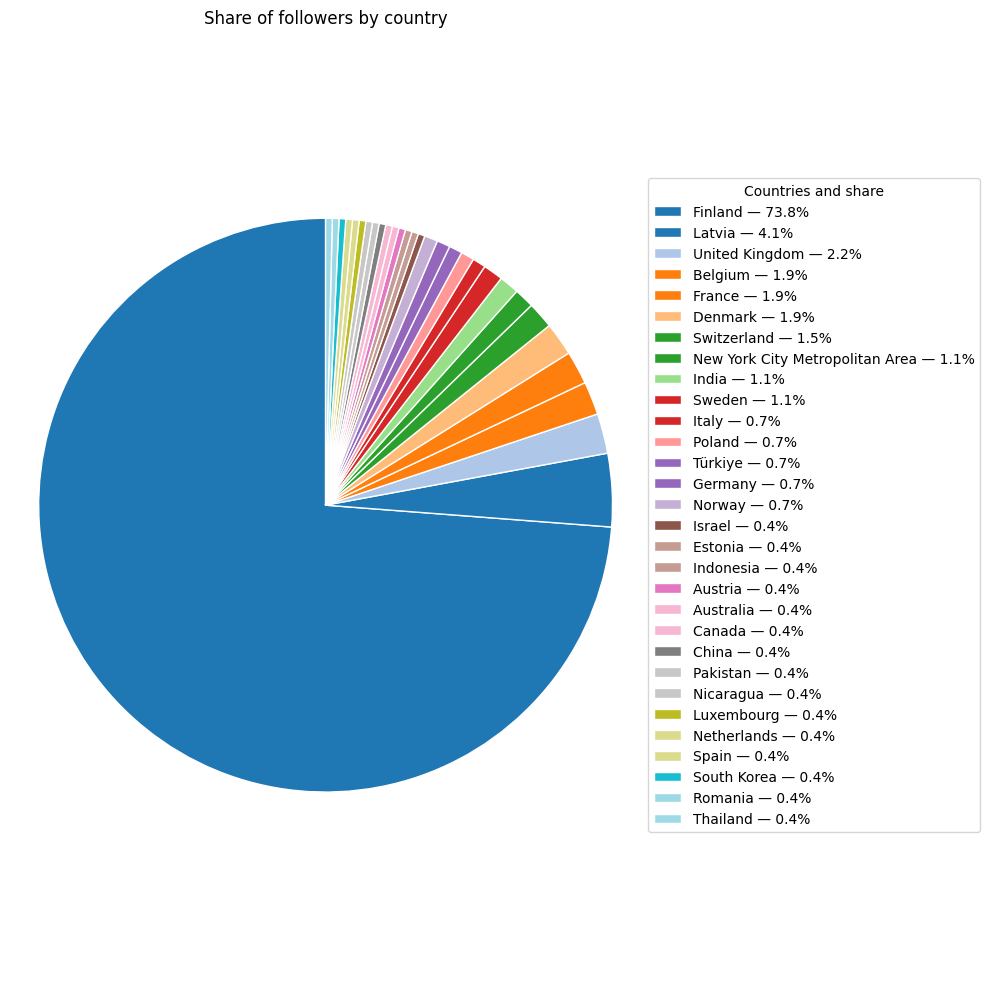

In [131]:
# pie chart
sizes = country_counts['total followers'].values
labels = country_counts['country'].values

# Calculate percentages manually
total = sizes.sum()
percentages = sizes / total * 100

# Tags for legend: "Country - X.X%"
legend_labels = [
    f"{country} — {pct:.1f}%"
    for country, pct in zip(labels, percentages)
]

# Selecting a palette
colors = plt.cm.tab20(np.linspace(0, 1, len(labels)))

fig, ax = plt.subplots(figsize=(10, 10))

# Draw a pie with only colors, without captions and percentages
wedges, _ = ax.pie(
    sizes,
    labels=None,
    colors=colors,
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Legend on the right
ax.legend(
    wedges,
    legend_labels,
    title="Countries and share",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.4, 1)
)

ax.set_title('Share of followers by country')
ax.axis('equal')  # so that the circle is not distorted
plt.tight_layout()
plt.savefig("Share of followers by country.png", dpi=300, bbox_inches="tight")
plt.show()

#### Share of followers by job function

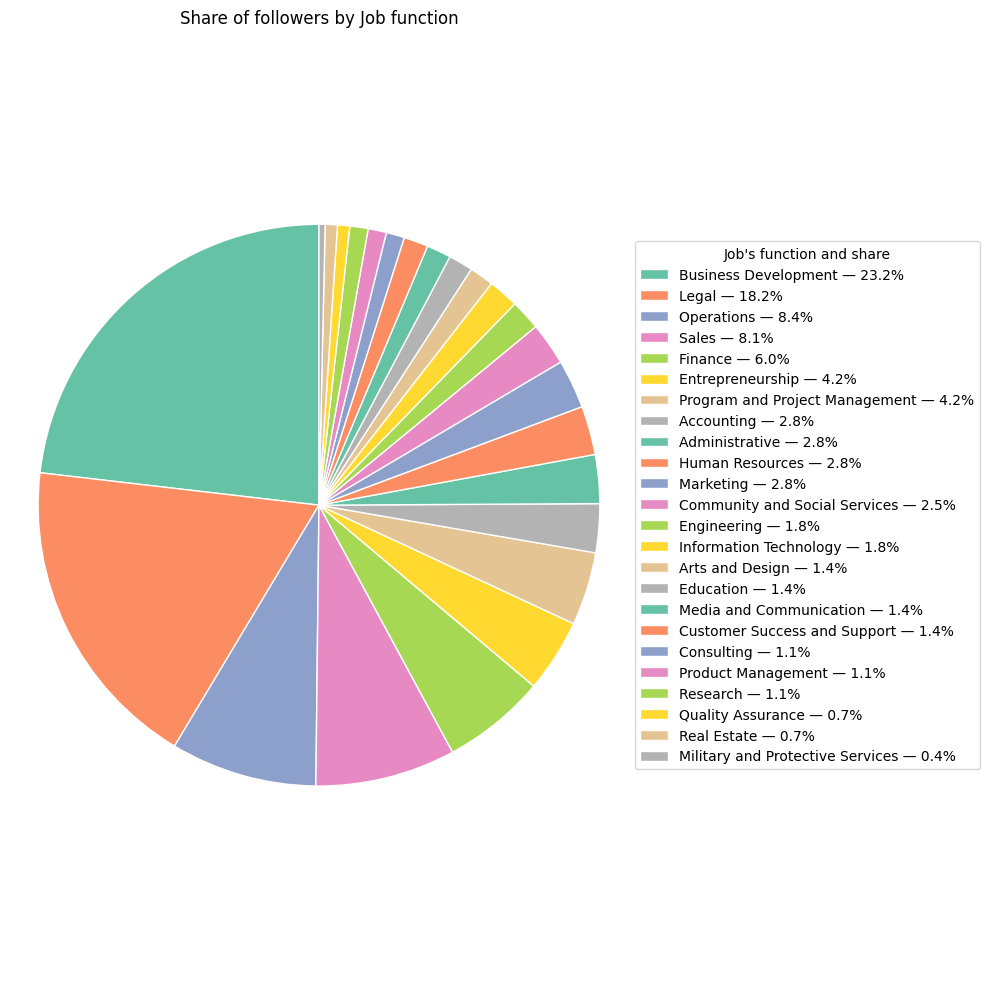

In [132]:
# job function
#followers_job_function.sort_values(by='Total followers', ascending=False)
# pie chart
sizes_job = followers_job_function['Total followers'].values
labels_job = followers_job_function['Job function'].values

# Calculate percentages manually
total_job = sizes_job.sum()
percentages_job = sizes_job / total_job * 100

# Tags for legend: "Country - X.X%"
legend_labels_job = [
    f"{Job} — {pct:.1f}%"
    for Job, pct in zip(labels_job, percentages_job)
]

# Selecting a palette
#colors = plt.cm.tab20(np.linspace(0, 1, len(labels_job)))
#select a high-quality palette and sample len(labels_job) colors from it
# cmap = plt.cm.get_cmap('tab20c')      # alternatives: 'tab10', 'Set3', 'Paired'…
# colors = cmap(np.linspace(0, 1, len(labels_job)))
colors = sns.color_palette('Set2', len(labels_job))
# Draw a pie with only colors, without captions and percentages
fig, ax = plt.subplots(figsize=(10, 10))

wedges, _ = ax.pie(
    sizes_job,
    labels=None,
    colors=colors,
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Legend on the right
ax.legend(
    wedges,
    legend_labels_job,
    title="Job's function and share",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.4, 1)
)

ax.set_title('Share of followers by Job function')
ax.axis('equal')  # so that the circle is not distorted
plt.tight_layout()
plt.savefig("Share of followers by Job function.png", dpi=300, bbox_inches="tight")
plt.show()


#### Share of followers by seniority

In [133]:
#display(followers_seniority.sort_values(by='Total followers', ascending=False))

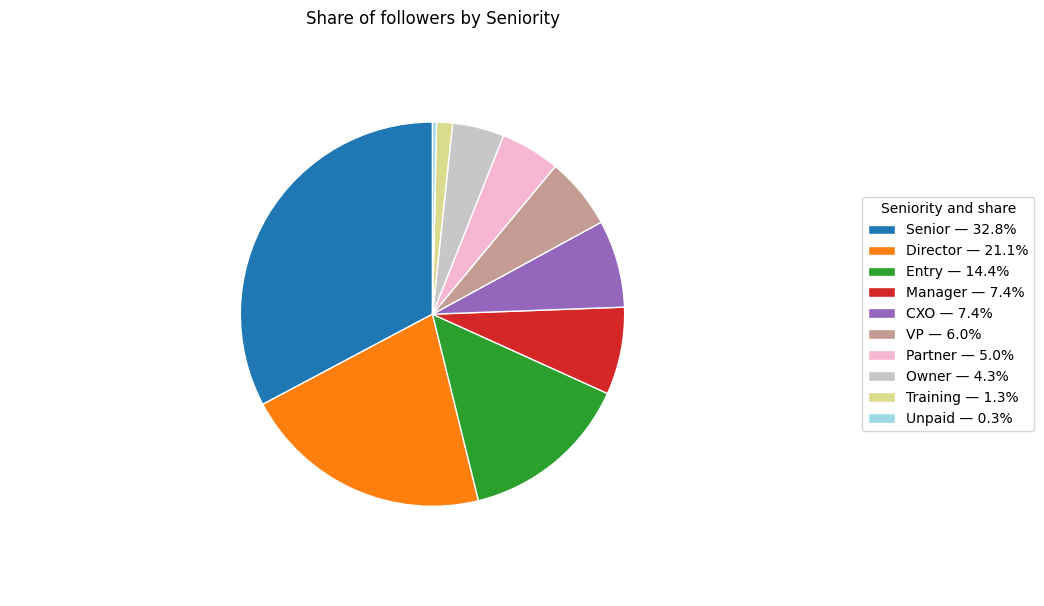

In [134]:
# pie chart

sizes_seniority = followers_seniority['Total followers'].values
labels_seniority = followers_seniority['Seniority'].values

# Calculate percentages manually
total_seniority = sizes_seniority.sum()
percentages_seniority = sizes_seniority / total_seniority * 100

# Tags for legend: "Seniority - X.X%"
legend_labels_seniority = [
    f"{country} — {pct:.1f}%"
    for country, pct in zip(labels_seniority, percentages_seniority)
]

# Selecting a palette
colors = plt.cm.tab20(np.linspace(0, 1, len(labels_seniority)))

# Создаём фигуру и ось
fig, ax = plt.subplots(figsize=(10, 8))

# Draw a pie 
wedges, _ = ax.pie(
    sizes_seniority,
    labels=None,
    colors=colors,
    startangle=90,
    radius=0.7,                     # decrease the radius (0.7 from the maximum)
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# We move the axis to the left so that there is room on the right for the legend
ax.set_position([0.0, 0.0, 0.6, 1.0])  # [left, bottom, width, height]

# Legend on the right
ax.legend(
    wedges,
    legend_labels_seniority,
    title="Seniority and share",
    loc="center left",
    bbox_to_anchor=(1, 0.5)       # center vertically
)

ax.set_title('Share of followers by Seniority')
ax.axis('equal')
plt.tight_layout()
plt.savefig("Share of followers by Seniority.png", dpi=300, bbox_inches="tight")
plt.show()

#### Share of followers by industries

In [135]:
#top 10 industries
#display(followers_industry.sort_values(by='Total followers', ascending=False).head(10))

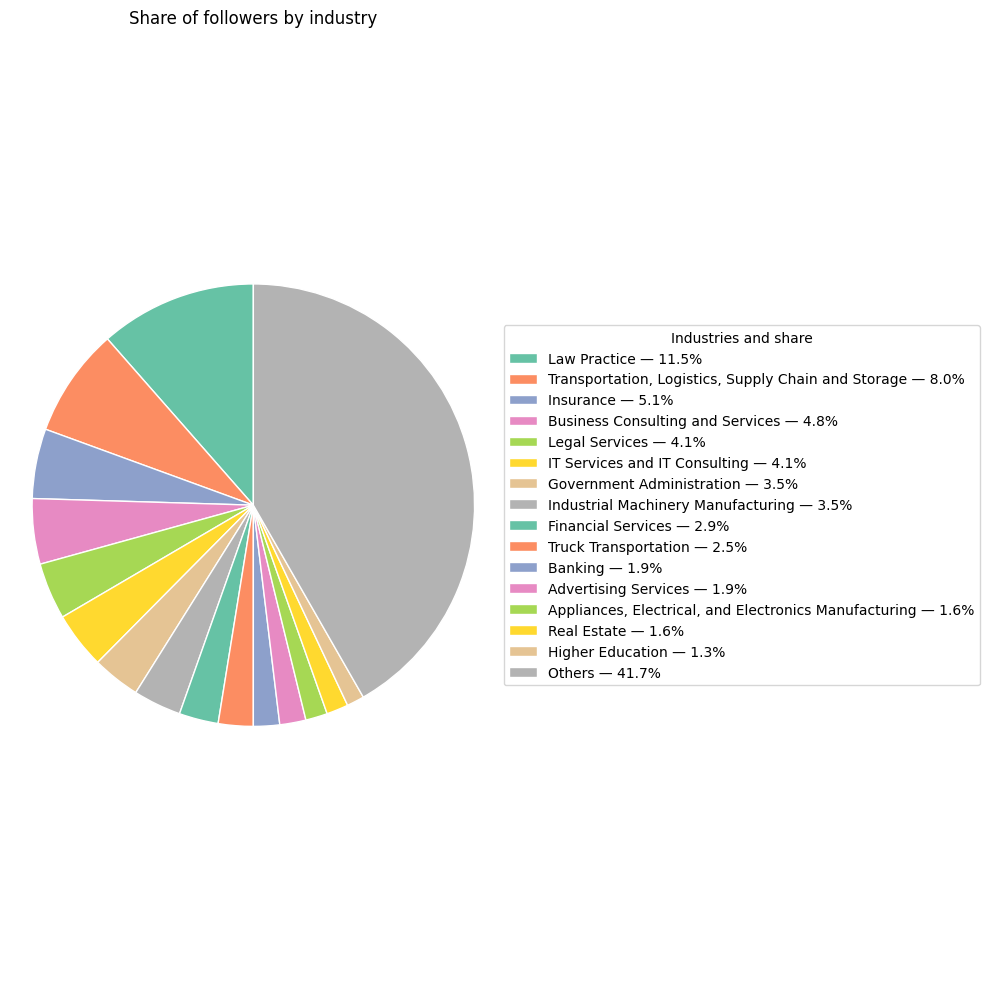

In [136]:
# pie chart for Industries
sorted_df = followers_industry.sort_values('Total followers', ascending=False)

# 2) Выбираем топ‑25 и считаем «Остальных»
top15 = sorted_df.head(15)
others_sum = sorted_df['Total followers'].iloc[15:].sum()

# 3) Создаём DataFrame для «Others» и объединяем
others_df = pd.DataFrame({
    'Industry': ['Others'],
    'Total followers': [others_sum]
})
plot_df = pd.concat([top15, others_df], ignore_index=True)
sizes_industry = plot_df['Total followers'].values
labels_industry = plot_df['Industry'].values

# Calculate percentages manually
total_industry = sizes_industry.sum()
percentages_industry = sizes_industry / total_industry * 100

# Tags for legend: "Industry - X.X%"
legend_labels_industry = [
    f"{industry} — {pct:.1f}%"
    for industry, pct in zip(labels_industry, percentages_industry)
]

# Selecting a palette
#colors = plt.cm.tab20(np.linspace(0, 1, len(labels)))
colors = sns.color_palette('Set2', len(labels_job))

fig, ax = plt.subplots(figsize=(10, 10))

# Draw a pie with only colors, without captions and percentages
wedges, _ = ax.pie(
    sizes_industry,
    labels=None,
    colors=colors,
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Legend on the right
ax.legend(
    wedges,
    legend_labels_industry,
    title="Industries and share",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.4, 1)
)

ax.set_title('Share of followers by industry')
ax.axis('equal')  # so that the circle is not distorted
plt.tight_layout()
plt.savefig("Share of followers by Industry.png", dpi=300, bbox_inches="tight")
plt.show()

#### Share of followers by Company size

In [137]:
#display(followers_company_size.sort_values(by='Total followers', ascending=False))

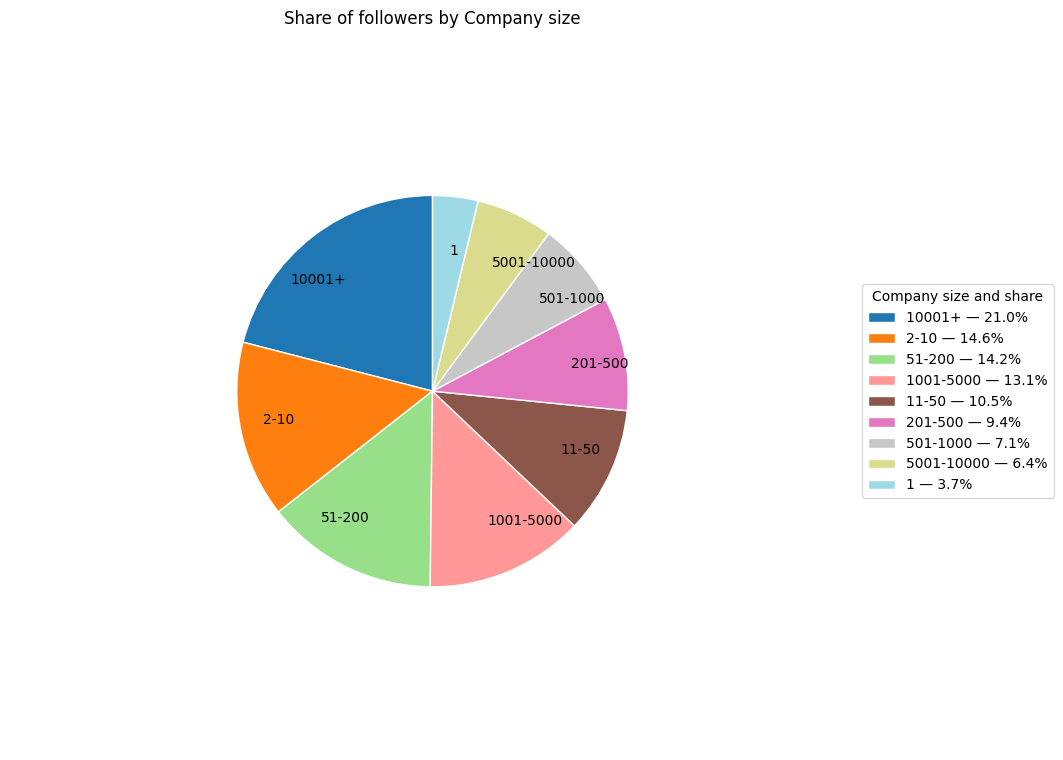

In [138]:
# data
sizes_company_size = followers_company_size['Total followers'].values
labels_company_size = followers_company_size['Company size'].values

# % in legend
total_company_size = sizes_company_size.sum()
percentages_company_size = sizes_company_size / total_company_size * 100
legend_labels_company_size = [
    f"{size} — {pct:.1f}%"
    for size, pct in zip(labels_company_size, percentages_company_size)
]

# colors
colors = plt.cm.tab20(np.linspace(0, 1, len(labels_company_size)))

# plot pie
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts = ax.pie(
    sizes_company_size,
    labels=labels_company_size,   
    labeldistance=0.72,           
    colors=colors,
    startangle=90,
    radius=0.8,                     
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# set axes position
ax.set_position([0.0, 0.0, 0.6, 1.0])  # [left, bottom, width, height]

# legend
ax.legend(
    wedges,
    legend_labels_company_size,
    title="Company size and share",
    loc="center left",
    bbox_to_anchor=(1, 0.5)       
)

ax.set_title('Share of followers by Company size')
ax.axis('equal')  
plt.tight_layout()
plt.savefig("Share of followers by Company size.png", dpi=300, bbox_inches="tight")
plt.show()

In [139]:
# 1. aggregated followers metrics
aggregated_followers = {
    'total_days': followers_metrics['date'].nunique(),
    'total_organic_followers': followers_metrics['organic followers'].sum(),
    'total_sponsored_followers': followers_metrics['sponsored followers'].sum(),
    'total_auto_invited': followers_metrics['auto-invited followers'].sum(),
    'total_followers_gained': followers_metrics['total followers'].sum(),
    'avg_followers_per_day': followers_metrics['total followers'].mean().round(2)
}
aggregated_followers_df = pd.DataFrame(list(aggregated_followers.items()), columns=['Metric', 'Value'])
#aggregated_followers_df 

## basic descriptive calculations of followers numbers

**Let's check if the number of followers is increased during the campaign**

### campaign summary

In [140]:
# 1. Campaign 24.03–24.04.2025
campaign_start = pd.to_datetime("2025-03-24")
campaign_end = pd.to_datetime("2025-04-20")

campaign_df = followers_metrics[(followers_metrics['date'] >= campaign_start) & (followers_metrics['date'] <= campaign_end)]

# Campaign - Summary Statistics
campaign_summary = {
    'campaign_days': campaign_df['date'].nunique(),
    'campaign_organic_followers': campaign_df['organic followers'].sum(),
    'campaign_sponsored_followers': campaign_df['sponsored followers'].sum(),
    'campaign_auto_invited': campaign_df['auto-invited followers'].sum(),
    'campaign_total_followers': campaign_df['total followers'].sum(),
    'avg_followers_per_day_campaign': campaign_df['total followers'].mean().round(2)
}

In [141]:
# Convert dictionary to DataFrame with two columns
campaign_summary_df = pd.DataFrame(list(campaign_summary.items()), columns=['Metric', 'Value'])

# View result
print('Campaign summary by followers')
display(campaign_summary_df)


Campaign summary by followers


,Metric,Value
0,campaign_days,26.00
1,campaign_organic_followers,5.00
2,campaign_sponsored_followers,0.00
3,campaign_auto_invited,0.00
4,campaign_total_followers,5.00
5,avg_followers_per_day_campaign,0.19


### campaign growth

In [142]:
# Year - Summary Statistics
total_followers_year = followers_metrics['total followers'].sum()
days_total = followers_metrics['date'].nunique()
avg_followers_year = followers_metrics['total followers'].mean().round(2)

year_summary = {
    'total_days': days_total,
    'total_followers_year': total_followers_year,
    'avg_followers_per_day_year': avg_followers_year
}

# Growth
growth_absolute = campaign_summary['avg_followers_per_day_campaign'] - year_summary['avg_followers_per_day_year']
growth_percent = (growth_absolute / year_summary['avg_followers_per_day_year']) * 100

# final table
import pandas as pd

comparison = pd.DataFrame({
    'Metric': [
        'Avg followers/day (Year)',
        'Avg followers/day (Campaign)',
        'Absolute Growth',
        'Growth (%)'
    ],
    'Value': [
        year_summary['avg_followers_per_day_year'],
        campaign_summary['avg_followers_per_day_campaign'],
        round(growth_absolute, 2),
        round(growth_percent, 2)
    ]
})

display(comparison)

,Metric,Value
0,Avg followers/day (Year),0.08
1,Avg followers/day (Campaign),0.19
2,Absolute Growth,0.11
3,Growth (%),137.50


**During the campaign, the average number of new followers per day increased from 0.08 to 0.19, representing a 138 % increase over the year-over-year average. This is a significant success, highlighting the effectiveness of our content activity.**

## What days were the peak followers growth?

**In our data we don't have 'sponsored followers' and 'sponsored followers', we can show only graph with total and organic followers. But in case of sponsored occasion we can uncomment certain rows in code and show more data on graph**

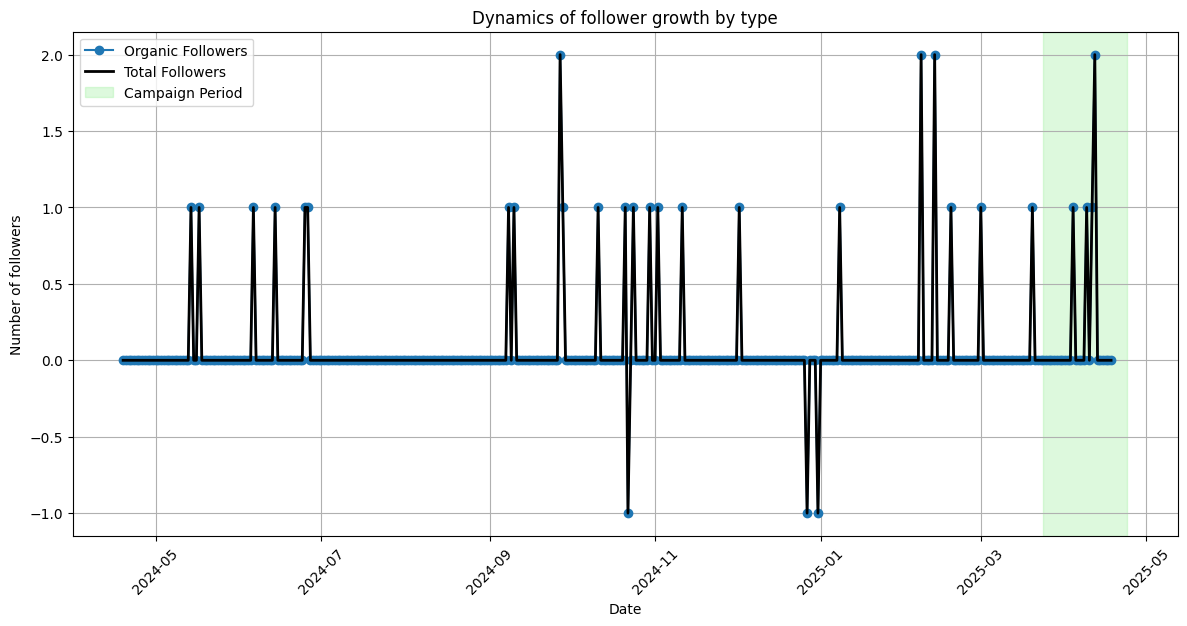

In [143]:
# graph for all followers, highlighting the types

plt.figure(figsize=(12, 6))

plt.plot(followers_metrics['date'], followers_metrics['organic followers'], label='Organic Followers', marker='o', linestyle='-')
#plt.plot(followers_metrics['date'], followers_metrics['sponsored followers'], label='Sponsored Followers', marker='x', linestyle='--') # UNCOMMENT if you have sponsored campaigns
#plt.plot(followers_metrics['date'], followers_metrics['sponsored followers'], label='Auto-Invited Followers', marker='^', linestyle=':') # UNCOMMENT if you have sponsored campaigns
plt.plot(followers_metrics['date'], followers_metrics['total followers'], label='Total Followers', linewidth=2, color='black')

# addiing vertical lines to the beginning and end of the campaign
campaign_start = pd.to_datetime("2025-03-24")
campaign_end = pd.to_datetime("2025-04-24")
plt.axvspan(campaign_start, campaign_end, color='lightgreen', alpha=0.3, label='Campaign Period')

plt.title('Dynamics of follower growth by type')
plt.xlabel('Date')
plt.ylabel('Number of followers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## organic growth, or build a moving average for each type

To visualize the organic follower growth trend, we use a 7-day moving average, which reflects weekly dynamics, levels out fluctuations on weekends, and helps identify sustainable changes in audience behavior.

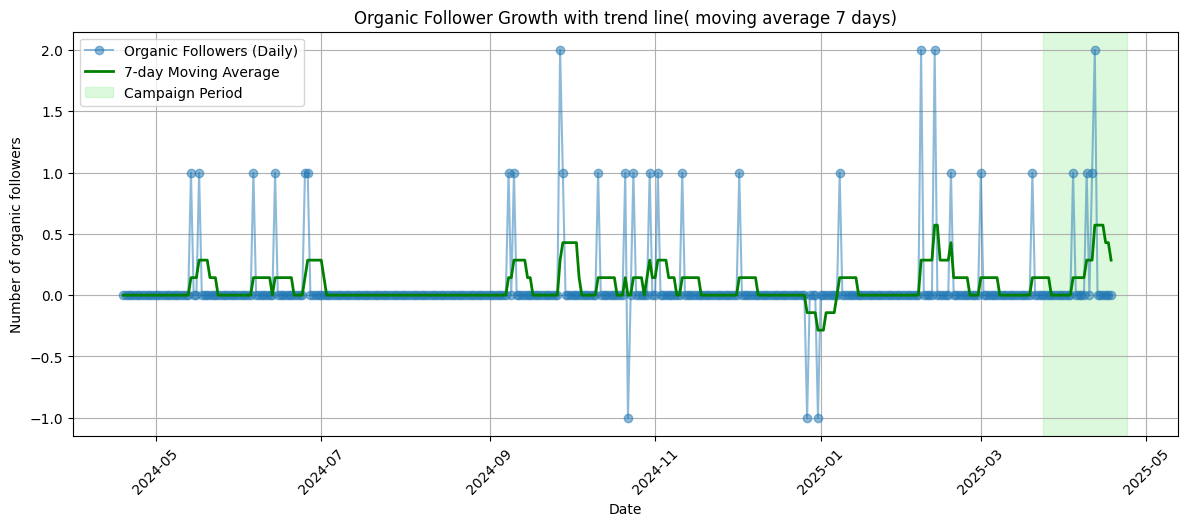

In [144]:
# Let's plot a graph for organic growth only and its moving average

# Calculate the moving average for 7 days
followers_metrics['organic_ma_7'] = followers_metrics['organic followers'].rolling(window=7, min_periods=1).mean()

# Visualisation
plt.figure(figsize=(12, 5))
plt.plot(followers_metrics['date'], followers_metrics['organic followers'], label='Organic Followers (Daily)', marker='o', linestyle='-', alpha=0.5)
plt.plot(followers_metrics['date'], followers_metrics['organic_ma_7'], label='7-day Moving Average', color='green', linewidth=2)

# Campaign
plt.axvspan(campaign_start, campaign_end, color='lightgreen', alpha=0.3, label='Campaign Period')

plt.title('Organic Follower Growth with trend line( moving average 7 days)')
plt.xlabel('Date')
plt.ylabel('Number of organic followers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("Organic Follower Growth with trend line( moving average 7 days.png", dpi=300, bbox_inches="tight")
plt.show()

**define top_follower_days**

In [145]:
# define top_follower_days
top_follower_days = followers_metrics[followers_metrics['total followers'] > 0].sort_values(
    by='total followers', ascending=False).head(10)



# Re-merging after changing to datetime
matched_followers_posts = top_follower_days.merge(
    combined_posts_df, left_on='date', right_on='date', how='left'
)

# key columns output
result = matched_followers_posts[[
    'date',
    'cohort',
    'total followers',
    'organic followers',
    'post_id',
    'click through rate (ctr)',
    'engagement rate'
]]


result

,date,cohort,total followers,organic followers,post_id,click through rate (ctr),engagement rate
0,2024-09-27,2024_baseline,2,2,19.0,0.014851,0.014851
1,2025-02-12,NaN,2,2,NaN,NaN,NaN
2,2025-02-07,NaN,2,2,NaN,NaN,NaN
3,2025-04-12,NaN,2,2,NaN,NaN,NaN
4,2024-06-06,NaN,1,1,NaN,NaN,NaN
5,2024-06-26,NaN,1,1,NaN,NaN,NaN
6,2024-06-25,NaN,1,1,NaN,NaN,NaN
7,2024-09-08,NaN,1,1,NaN,NaN,NaN
8,2024-06-14,2024_baseline,1,1,23.0,0.037691,0.071849
9,2024-05-17,NaN,1,1,NaN,NaN,NaN


**The post title column occurs empty (NaN) when merging**

- In merge we merge by exact date (date == created date), but followers could subscribe the next day or even later, or the post was scheduled, and created date does not reflect the publication date, so no exact match was found --> NaN in most post_id.
- Only found 2 posts id : 19 and 23

**let's try to find the closest post for the previous 1-2 days:**

In [146]:
from datetime import timedelta

# create an empty copy of top followers days
matched_posts = []

for _, row in top_follower_days.iterrows():
    post = combined_posts_df[
        (combined_posts_df['created date'] <= row['date']) &
        (combined_posts_df['created date'] >= row['date'] - timedelta(days=2))
    ].sort_values(by='created date', ascending=False).head(1)
    
    if not post.empty:
        combined_row = row.to_dict()
        combined_row['post_id'] = post['post_id'].values[0]
        combined_row['click through rate (ctr)'] = post['click through rate (ctr)'].values[0]
        combined_row['engagement rate'] = post['engagement rate'].values[0]
        combined_row['employee_id'] = post['employee_id'].values[0]
        matched_posts.append(combined_row)

# transform it into a table
import pandas as pd
result_with_backtrack = pd.DataFrame(matched_posts)
result_with_backtrack

,date,sponsored followers,organic followers,auto-invited followers,total followers,organic_ma_7,post_id,click through rate (ctr),engagement rate,employee_id
0,2024-09-27,0,2,0,2,0.285714,19,0.014851,0.014851,1
1,2025-04-12,0,2,0,2,0.571429,32,0.062500,0.156250,1
2,2024-06-14,0,1,0,1,0.142857,23,0.037691,0.071849,1


**We see that almost every follower surge is associated with a specific post. Posts with high engagement (e.g. engagement rate > 0.1) work especially well.**

## conclusion

**The campaign period** demonstrated an increase in the follower growth rate. 
- The average daily growth increased more than 2 times.
- The positive dynamics of organic growth was especially pronounced in the second half of the campaign, which is confirmed by the analysis of the 3-day and 7-day moving average.

**Analysis of follower growth peaks over the year showed that:**
Most days with the highest organic follower growth coincide with posts published 1-2 days before.
This indicates a delayed audience reaction: users interact with the post, save, share, or return later to subscribe.
Posts with high engagement (Engagement Rate from 7% to 18%) most often coincided with such peaks.

**Most effective posts:**
- Posts with visual elements and audience engagement, such as leading to the company webpage by link (“Post ID=0032”)
- Event announcements and reminders (“Post ID=0023”)
- Partner posts and invitations to interact (e.g. mention of Employee, “Post ID=0019”)
- It was also recorded that the moving average of organic growth increased during the periods of these posts, which strengthens the conclusion about their effectiveness.

**Conclusion:**
Posts with practical value, a clear call-to-action and visual expressiveness contribute to the growth of followers. Even if the growth does not occur on the same day, the delayed impact of the posts is confirmed analytically.


# save to

**uncomment when needed**

In [147]:
# # Save to Excel 
# with pd.ExcelWriter("followers_summary_anonym.xlsx") as writer:
#     country_counts.to_excel(writer, sheet_name='countries_followers', index=False)
#     aggregated_followers_df.to_excel(writer, sheet_name='aggregated_followers', index=False)
#     campaign_summary_df.to_excel(writer, sheet_name='aggregated_campaign_followers', index=False)
#     comparison.to_excel(writer, sheet_name='followers_comparison_growth', index=False)
#     result_with_backtrack.to_excel(writer, sheet_name='top_follower_days_posts', index=False)

## Conclusion on followers and visitors data

- **Follower data provides a more complete picture of the audience, as it is based on user actions and is aggregated cumulatively.**
- **In contrast, visitor metrics depend on current reach, privacy, and availability of data on individual parameters.**

# Overall conclusion and recomendation

**Current state analysis.** The data volume is too small to test statistical differences and predictions:
- With ~14 observations (only 3 posts per month, observation period of one month), any model will “remember” noise, not real patterns, and will give unstable, overfitted forecasts.
- For reliable High/Low CTR classification in order to predict successful days and formats for posting, you usually need ≥ 50–100 posts so that the model can see repeating patterns.

**Lack of feature variability**
- So far, we only consider the day of the week and CTR. To predict well, we need additional parameters: post format (video, carousel, text), text length, time of day, target audience, etc.
- Without these “explanatory” variables, the model will not be able to understand which format or time really affects success.

**High risk of overfitting**
- Any complex model (forest, boosting, neural network) with a small N will almost certainly produce “perfect” metrics on a train sample and fail on a new campaign.
- This will create a false impression of accuracy and will confuse in real life.

**Long-term data collection**
- With a frequency of 3 publications per week, the required 50–100 posts will take 5–8 months.
- Until we accumulate such a volume, it is better to focus on accumulating high-quality data: clear segmentation by formats, audiences, and exact time.

**Brief conclusions and recommendations**

**What was checked**
- Compared the click-through rate (CTR) of posts on three days: Tuesday, Wednesday, Friday.
- First, we looked at the means and medians: Wednesday showed the highest CTR.
- Conducted statistical tests (ANOVA and Kruskal-Wallis) — with the current volume of data, the differences were insignificant.
- Calculated the effect size (η² ≈ 0.17), which indicates a noticeable share of the difference, but the samples are too small to “prove” this formally.
- Constructed bootstrap intervals for medians:
- Tuesday has a very narrow but “low” range (~1.8%–5%),
- Wednesday has a median of ~14%, but the CI is too wide (≈3.7%–27.8%),
- Friday has an even wider CI (≈1.8%–48.4%).

**What does this mean for the client**
- Wednesday and Friday potentially give a higher response, but the results are still too unstable due to the small number of posts.
- Tuesday gives a consistently low but predictable CTR — it is a good choice as a control point.
- It is not yet statistically “safe” to say that Wednesday wins.

**Why we are not making forecasts yet**
- We only have ≈ 12–14 observations: reliable predictive analysis requires ≥ 50–100 posts.
- Without sufficient volume, the model will “remember” noise, not real patterns.

**Recommendations for further actions**

- **Collect more data: maintain the rhythm of three times a week - it has already proven to be better. (≈ 3 posts/week → 3–4 months).**
- <span style=" color:red;">**It is important</span> **to download your analytics in Excel files from LinkedIn regularly if you want to analyse results and do predictive analysis. LinkedIn do not show you the data over a year ago!!!**</span>
- **Record additional parameters: format (video, carousel, image), publication time, text length, etc. Vary the format and time to find the optimal "windows" for your audience:**
- - **A/B tests:** in one week, post on the same days, but change the format/headline - see how the median changes.
- - **Continue descriptive analysis:** review averages/medians and “average” intervals once a month.
- **Launch High/Low CTR classification and a predictive model in six months — then we will be able to accurately recommend optimal days, formats, and times.**
